In [4]:
import os
import PIL
import pathlib
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
import re
import pandas as pd
import shutil
import zipfile
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from keras import backend as K
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from tensorflow.keras.callbacks import LearningRateScheduler

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random
import zipfile


In [5]:
data_dir = pathlib.Path('/Users/erfan/Documents/Datasets/brain_tumor_dataset').with_suffix('')
data_dir = (list(data_dir.glob('*/*')))

# excluding .DS_Store
images = []
for dir in data_dir:
    if re.search(pattern=r'.jpg|.jpeg|.png', string=str(dir).split('/')[-1], flags=re.IGNORECASE) != None :
        images.append(dir)

random.shuffle(images)
len(images)

253

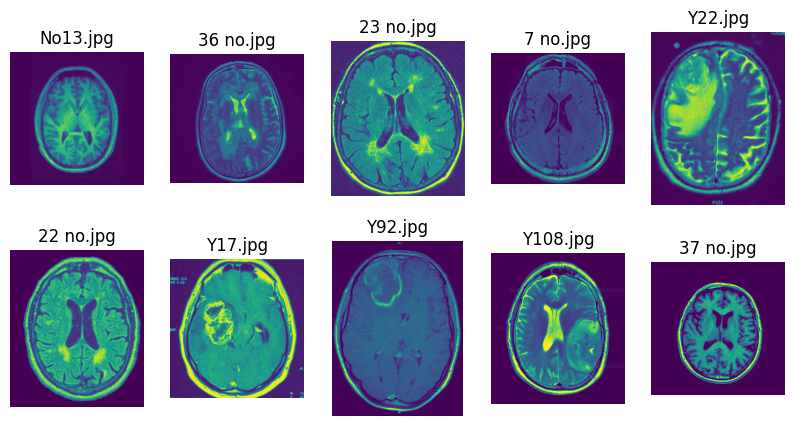

In [6]:
# Demonstration
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(PIL.Image.open(images[i]).convert('L'))
    plt.title(str(images[i]).split("/")[-1])
    plt.axis('off')


In [7]:
dimensions = []
for image in images:
  with PIL.Image.open(image) as img:
    dimensions.append(list(img.size))

dimensions = np.array(dimensions)
dimensions.shape

(253, 2)

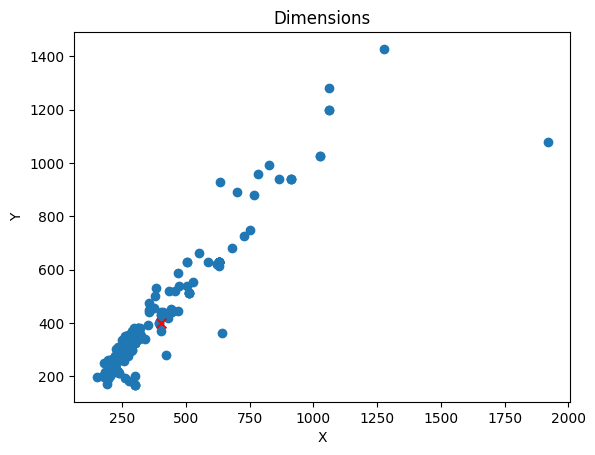

In [8]:
# Scatter dimentions
x = dimensions[:, 0]
y = dimensions[:, 1]
target_width = 400
target_height = 400
plt.scatter(x, y)
plt.scatter(target_width, target_height, color='red', marker='x', s=50, label='Specific Point')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dimensions')
plt.show()

In [9]:
def add_padding(images):
  padded_img, labels = [], []

  for image in images:
    with PIL.Image.open(image) as img:
      img_width, img_height = img.size

      width_ratio = target_width / img_width
      height_ratio = target_height / img_height

      ratio = min(width_ratio, height_ratio)

      new_width = int(img_width * ratio)
      new_height = int(img_height * ratio)

      resized_img = img.resize((new_width, new_height), PIL.Image.NEAREST)
      letterbox_img = PIL.Image.new('L', (target_width, target_height))

      left_offset = (target_width - new_width) // 2
      top_offset = (target_height - new_height) // 2

      letterbox_img.paste(resized_img, (left_offset, top_offset))
      padded_img.append((np.array(letterbox_img.convert('L'))))

      if len(re.findall(".*y.*|.*Y.*", str(image).split("/")[-1])) != 0:
        labels.append(1) #YES
      else:
        labels.append(0) #NO
  padded_img = np.reshape(padded_img, (-1, 400, 400))
  labels = np.array(labels)
  return padded_img, labels

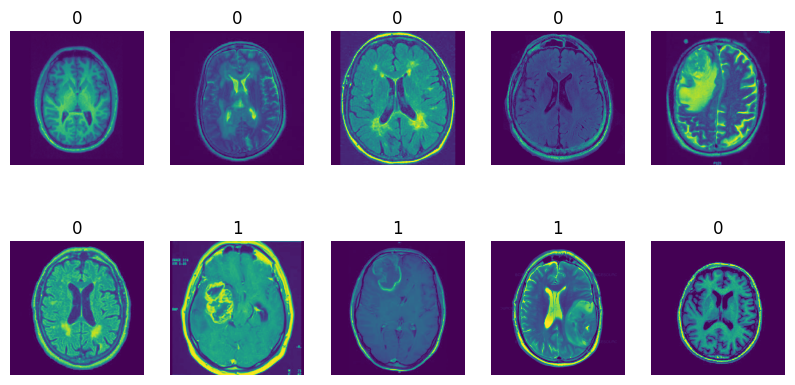

In [10]:
padded_img, labels = add_padding(images)
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(padded_img[i])
    plt.title(labels[i])
    plt.axis('off')

In [11]:
X_train, X_test, y_train, y_test = train_test_split(padded_img, labels, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [12]:
print('X_train: \n',X_train)

X_train: 
 [[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [13]:
print('y_train: \n',y_train)

y_train: 
 [0 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1
 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 0
 1 1 1 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 1
 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 1 0 1
 0 0 0 0 1 0 0 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1]


In [14]:
def res_block(x, filters):
  fx = layers.Conv2D(filters, (3,3), padding='same', strides=(1,1), activation='relu')(x)
  fx = layers.BatchNormalization()(fx)
  fx = layers.Conv2D(filters, (3,3), padding='same', strides=(1,1))(fx)
  fx = layers.BatchNormalization()(fx)
  out = layers.Add()([x, fx])
  out = layers.Activation('relu')(out)
  #out = layers.BatchNormalization()(out)
  return out

Model: "Model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_69 (InputLayer)       [(None, 400, 400, 1)]        0         []                            
                                                                                                  
 conv2d_616 (Conv2D)         (None, 400, 400, 8)          80        ['input_69[0][0]']            
                                                                                                  
 max_pooling2d_295 (MaxPool  (None, 200, 200, 8)          0         ['conv2d_616[0][0]']          
 ing2D)                                                                                           
                                                                                                  
 conv2d_617 (Conv2D)         (None, 200, 200, 16)         1168      ['max_pooling2d_295[0][0

2024-04-16 00:59:42.060956: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


35/35 [==============================] - ETA: 0s - loss: 73.2280 - accuracy: 0.6744

2024-04-16 00:59:45.912395: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


35/35 [==============================] - 5s 96ms/step - loss: 73.2280 - accuracy: 0.6744 - val_loss: 6.6618 - val_accuracy: 0.8108
Epoch 2/30
35/35 [==============================] - 1s 30ms/step - loss: 4.7834 - accuracy: 0.7442 - val_loss: 4.8155 - val_accuracy: 0.7838
Epoch 3/30
35/35 [==============================] - 1s 20ms/step - loss: 3.3946 - accuracy: 0.8023 - val_loss: 4.4106 - val_accuracy: 0.8108
Epoch 4/30
35/35 [==============================] - 1s 19ms/step - loss: 5.0592 - accuracy: 0.8023 - val_loss: 10.7225 - val_accuracy: 0.5405
Epoch 5/30
35/35 [==============================] - 1s 20ms/step - loss: 4.1262 - accuracy: 0.8140 - val_loss: 9.9807 - val_accuracy: 0.6216
Epoch 6/30
35/35 [==============================] - 1s 21ms/step - loss: 1.8187 - accuracy: 0.8663 - val_loss: 4.4137 - val_accuracy: 0.7027
Epoch 7/30
35/35 [==============================] - 1s 19ms/step - loss: 4.2265 - accuracy: 0.7442 - val_loss: 12.9009 - val_accuracy: 0.8108
Epoch 8/30
35/35 [===

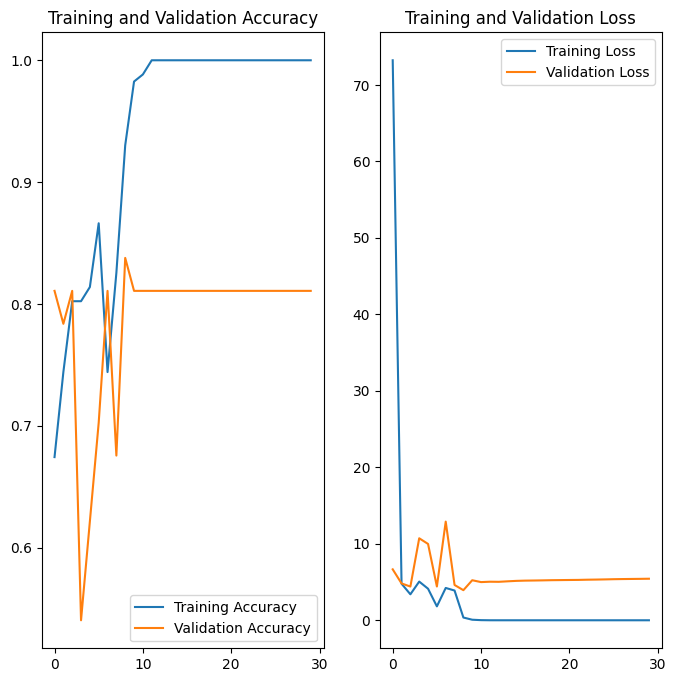

2024-04-16 01:00:07.736986: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 202ms/step
Overall Accuracy: 0.7297297297297297
Precision: 0.7727272727272727
Recall: 0.7727272727272727
F1-Score: 0.7727272727272727


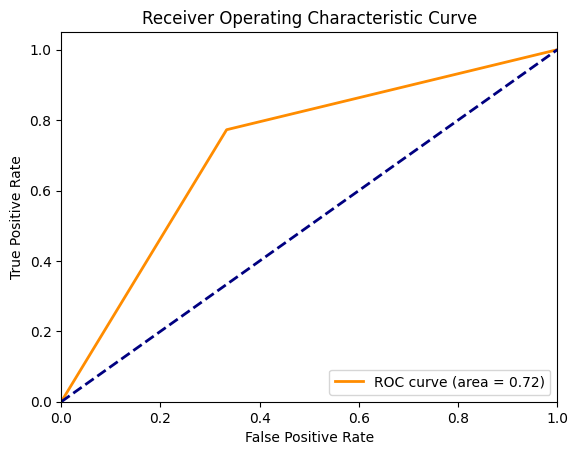

Epoch 1/30


2024-04-16 01:00:08.600011: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


35/35 [==============================] - ETA: 0s - loss: 205.4685 - accuracy: 0.6802

2024-04-16 01:00:11.794781: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


35/35 [==============================] - 4s 83ms/step - loss: 205.4685 - accuracy: 0.6802 - val_loss: 28.8454 - val_accuracy: 0.6757
Epoch 2/30
35/35 [==============================] - 1s 30ms/step - loss: 14.4502 - accuracy: 0.6860 - val_loss: 10.7922 - val_accuracy: 0.6216
Epoch 3/30
35/35 [==============================] - 1s 35ms/step - loss: 5.6346 - accuracy: 0.7849 - val_loss: 8.6087 - val_accuracy: 0.8378
Epoch 4/30
35/35 [==============================] - 1s 21ms/step - loss: 1.0842 - accuracy: 0.8895 - val_loss: 5.0498 - val_accuracy: 0.7297
Epoch 5/30
35/35 [==============================] - 1s 20ms/step - loss: 0.3932 - accuracy: 0.9709 - val_loss: 5.6893 - val_accuracy: 0.7568
Epoch 6/30
35/35 [==============================] - 1s 21ms/step - loss: 0.0486 - accuracy: 0.9884 - val_loss: 4.9034 - val_accuracy: 0.7568
Epoch 7/30
35/35 [==============================] - 1s 22ms/step - loss: 0.0970 - accuracy: 0.9767 - val_loss: 6.9414 - val_accuracy: 0.7838
Epoch 8/30
35/35 [=

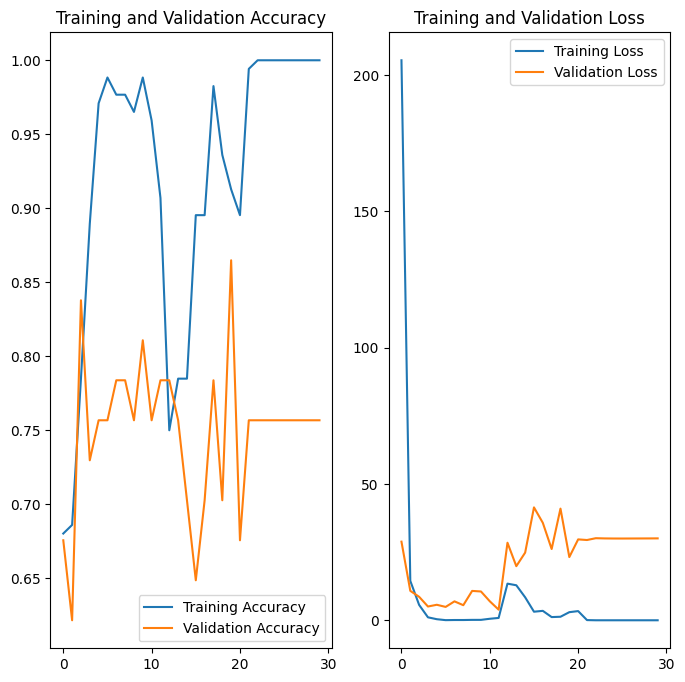

1/2 [==============>...............] - ETA: 0s

2024-04-16 01:00:33.272344: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 170ms/step
Overall Accuracy: 0.7837837837837838
Precision: 0.85
Recall: 0.7727272727272727
F1-Score: 0.8095238095238095


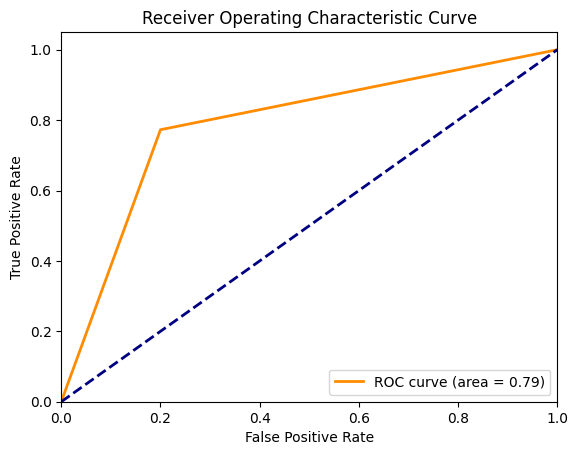

Epoch 1/30


2024-04-16 01:00:34.028187: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


35/35 [==============================] - ETA: 0s - loss: 189.2066 - accuracy: 0.5349

2024-04-16 01:00:37.326002: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


35/35 [==============================] - 4s 93ms/step - loss: 189.2066 - accuracy: 0.5349 - val_loss: 4.7380 - val_accuracy: 0.7297
Epoch 2/30
35/35 [==============================] - 1s 27ms/step - loss: 1.7541 - accuracy: 0.7733 - val_loss: 1.3246 - val_accuracy: 0.7838
Epoch 3/30
35/35 [==============================] - 1s 26ms/step - loss: 0.3211 - accuracy: 0.8895 - val_loss: 1.5042 - val_accuracy: 0.5946
Epoch 4/30
35/35 [==============================] - 1s 23ms/step - loss: 0.0595 - accuracy: 0.9826 - val_loss: 1.6777 - val_accuracy: 0.7297
Epoch 5/30
35/35 [==============================] - 1s 24ms/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 1.6463 - val_accuracy: 0.7027
Epoch 6/30
35/35 [==============================] - 1s 19ms/step - loss: 0.0095 - accuracy: 1.0000 - val_loss: 1.9525 - val_accuracy: 0.7027
Epoch 7/30
35/35 [==============================] - 1s 20ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 2.2948 - val_accuracy: 0.7838
Epoch 8/30
35/35 [====

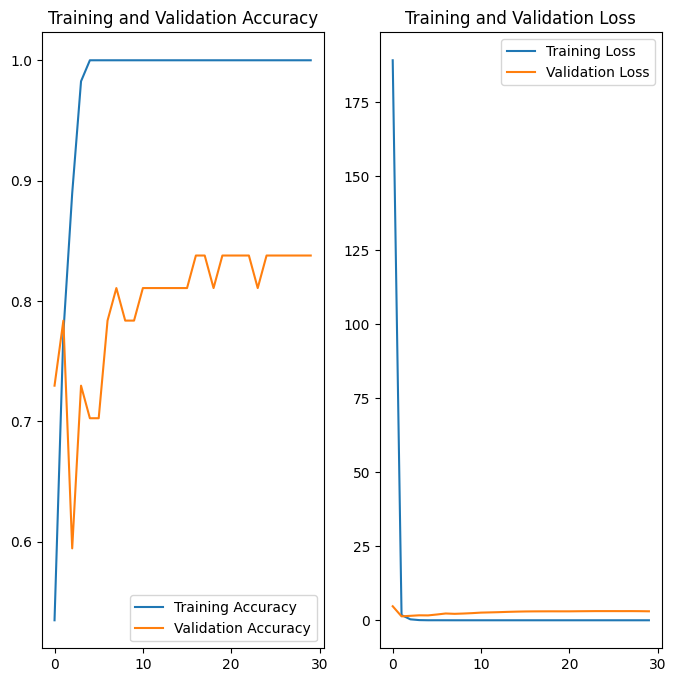

1/2 [==============>...............] - ETA: 0s

2024-04-16 01:00:59.281589: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 160ms/step
Overall Accuracy: 0.7837837837837838
Precision: 0.7692307692307693
Recall: 0.9090909090909091
F1-Score: 0.8333333333333333


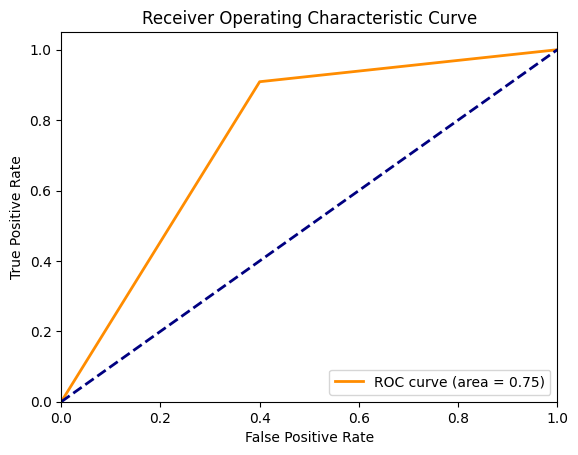

Epoch 1/30


2024-04-16 01:00:59.993174: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


35/35 [==============================] - ETA: 0s - loss: 41.6288 - accuracy: 0.6802

2024-04-16 01:01:03.359433: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


35/35 [==============================] - 4s 89ms/step - loss: 41.6288 - accuracy: 0.6802 - val_loss: 12.7299 - val_accuracy: 0.6757
Epoch 2/30
35/35 [==============================] - 1s 30ms/step - loss: 3.6355 - accuracy: 0.8314 - val_loss: 8.3102 - val_accuracy: 0.6216
Epoch 3/30
35/35 [==============================] - 1s 21ms/step - loss: 1.2930 - accuracy: 0.8256 - val_loss: 6.9853 - val_accuracy: 0.7568
Epoch 4/30
35/35 [==============================] - 1s 31ms/step - loss: 1.0371 - accuracy: 0.9012 - val_loss: 6.3680 - val_accuracy: 0.8378
Epoch 5/30
35/35 [==============================] - 1s 21ms/step - loss: 0.2094 - accuracy: 0.9826 - val_loss: 6.2405 - val_accuracy: 0.7838
Epoch 6/30
35/35 [==============================] - 1s 34ms/step - loss: 0.1178 - accuracy: 0.9826 - val_loss: 7.7260 - val_accuracy: 0.7027
Epoch 7/30
35/35 [==============================] - 1s 20ms/step - loss: 0.4566 - accuracy: 0.9651 - val_loss: 6.1269 - val_accuracy: 0.7838
Epoch 8/30
35/35 [====

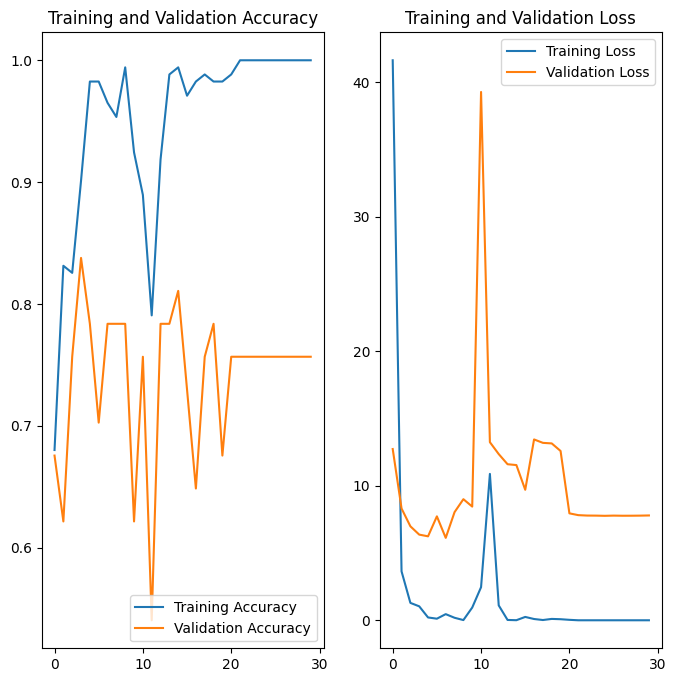

1/2 [==============>...............] - ETA: 0s

2024-04-16 01:01:25.683170: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 188ms/step
Overall Accuracy: 0.8108108108108109
Precision: 0.8947368421052632
Recall: 0.7727272727272727
F1-Score: 0.8292682926829269


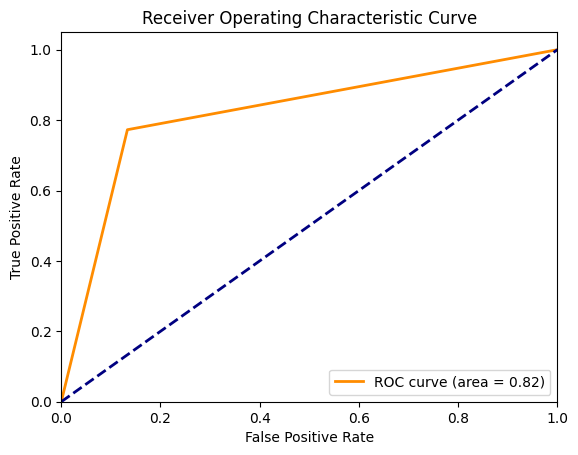

Epoch 1/30


2024-04-16 01:01:26.430152: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


35/35 [==============================] - ETA: 0s - loss: 147.1571 - accuracy: 0.5756

2024-04-16 01:01:29.976564: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


35/35 [==============================] - 5s 96ms/step - loss: 147.1571 - accuracy: 0.5756 - val_loss: 5.3000 - val_accuracy: 0.5946
Epoch 2/30
35/35 [==============================] - 1s 24ms/step - loss: 1.6370 - accuracy: 0.7733 - val_loss: 2.0002 - val_accuracy: 0.7297
Epoch 3/30
35/35 [==============================] - 1s 22ms/step - loss: 0.7159 - accuracy: 0.8605 - val_loss: 1.8552 - val_accuracy: 0.7297
Epoch 4/30
35/35 [==============================] - 1s 25ms/step - loss: 0.2063 - accuracy: 0.9244 - val_loss: 1.6723 - val_accuracy: 0.7838
Epoch 5/30
35/35 [==============================] - 1s 21ms/step - loss: 0.1168 - accuracy: 0.9593 - val_loss: 1.8883 - val_accuracy: 0.7568
Epoch 6/30
35/35 [==============================] - 1s 27ms/step - loss: 0.0776 - accuracy: 0.9593 - val_loss: 3.6491 - val_accuracy: 0.5405
Epoch 7/30
35/35 [==============================] - 1s 21ms/step - loss: 2.0748 - accuracy: 0.8081 - val_loss: 2.9765 - val_accuracy: 0.8649
Epoch 8/30
35/35 [====

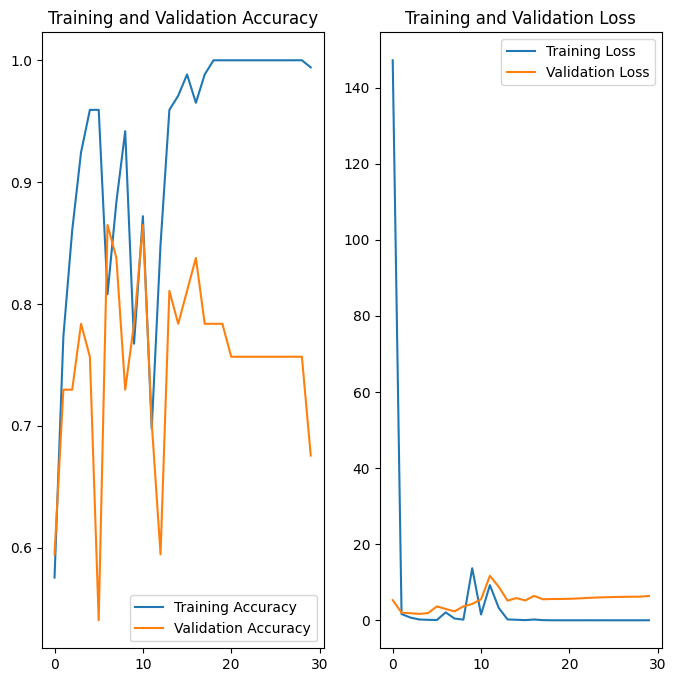

1/2 [==============>...............] - ETA: 0s

2024-04-16 01:01:51.758747: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 179ms/step
Overall Accuracy: 0.6486486486486487
Precision: 0.7647058823529411
Recall: 0.5909090909090909
F1-Score: 0.6666666666666667


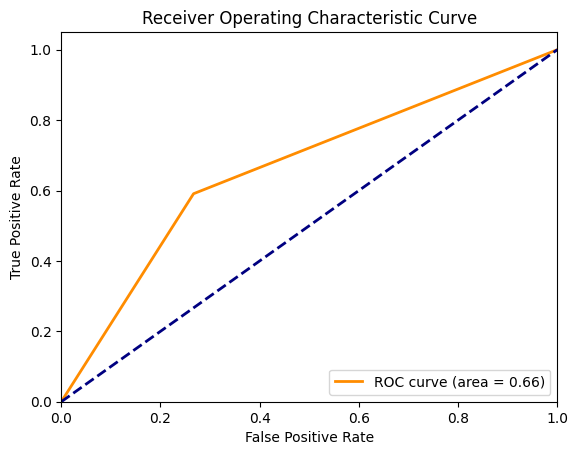

In [72]:
for i in range(5):
    # MODELING
    x = layers.Input(shape=(target_height, target_width, 1)) #input_shape = (height, width, channel)
    y = layers.DepthwiseConv2D(3, strides=(1,1), padding='valid', depth_multiplier=1)(x)

    y = layers.Conv2D(8, (3,3), padding='same')(x)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = layers.Conv2D(16, (3,3), padding='same')(y)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = layers.Conv2D(32, (3,3), padding='same')(y)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block(y, 32)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = layers.Flatten()(y)
    y = layers.Dense(100, activation='relu')(y) 
    y = layers.Dense(1, activation='sigmoid')(y)

    model_1 = tf.keras.Model(x,y)
    model_1._name = 'Model_1'
    
    if i == 0:
        model_1.summary()

    # COMPILING
    model_1.compile(optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
                    loss = 'binary_crossentropy',
                    metrics = 'accuracy')
    
    # TRAINING
    epochs = 30
    history = model_1.fit(x = X_train, y = y_train,
                          batch_size=5,
                          epochs = epochs,
                          validation_data = (X_val, y_val))

    # SHOWING RESULTS
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

    # PREDICTING
    pred_prob = model_1.predict(X_test)
    y_pred = np.where(pred_prob > 0.5, 1, 0)

    # Compute overall accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Overall Accuracy:", accuracy)

    # Compute precision
    precision = precision_score(y_test, y_pred)
    print("Precision:", precision)

    # Compute recall
    recall = recall_score(y_test, y_pred)
    print("Recall:", recall)

    # Compute F1-score
    f1 = f1_score(y_test, y_pred)
    print("F1-Score:", f1)

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()
    del model_1
    #del history


Model: "Model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_74 (InputLayer)       [(None, 400, 400, 1)]        0         []                            
                                                                                                  
 conv2d_641 (Conv2D)         (None, 400, 400, 8)          80        ['input_74[0][0]']            
                                                                                                  
 max_pooling2d_315 (MaxPool  (None, 200, 200, 8)          0         ['conv2d_641[0][0]']          
 ing2D)                                                                                           
                                                                                                  
 conv2d_642 (Conv2D)         (None, 200, 200, 16)         1168      ['max_pooling2d_315[0][0

2024-04-16 01:04:56.036355: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 139.5571 - accuracy: 0.5085

2024-04-16 01:04:59.579223: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 5s 87ms/step - loss: 139.5571 - accuracy: 0.5085 - val_loss: 8.7438 - val_accuracy: 0.7632
Epoch 2/30
36/36 [==============================] - 1s 23ms/step - loss: 12.4487 - accuracy: 0.7006 - val_loss: 3.0642 - val_accuracy: 0.8421
Epoch 3/30
36/36 [==============================] - 1s 24ms/step - loss: 5.3985 - accuracy: 0.7119 - val_loss: 2.2879 - val_accuracy: 0.8684
Epoch 4/30
36/36 [==============================] - 1s 24ms/step - loss: 5.5420 - accuracy: 0.7514 - val_loss: 6.3485 - val_accuracy: 0.6316
Epoch 5/30
36/36 [==============================] - 1s 24ms/step - loss: 2.3919 - accuracy: 0.8588 - val_loss: 1.9627 - val_accuracy: 0.7895
Epoch 6/30
36/36 [==============================] - 1s 19ms/step - loss: 1.8596 - accuracy: 0.8362 - val_loss: 0.9468 - val_accuracy: 0.8947
Epoch 7/30
36/36 [==============================] - 1s 32ms/step - loss: 2.5484 - accuracy: 0.8079 - val_loss: 10.6138 - val_accuracy: 0.5526
Epoch 8/30
36/36 [==

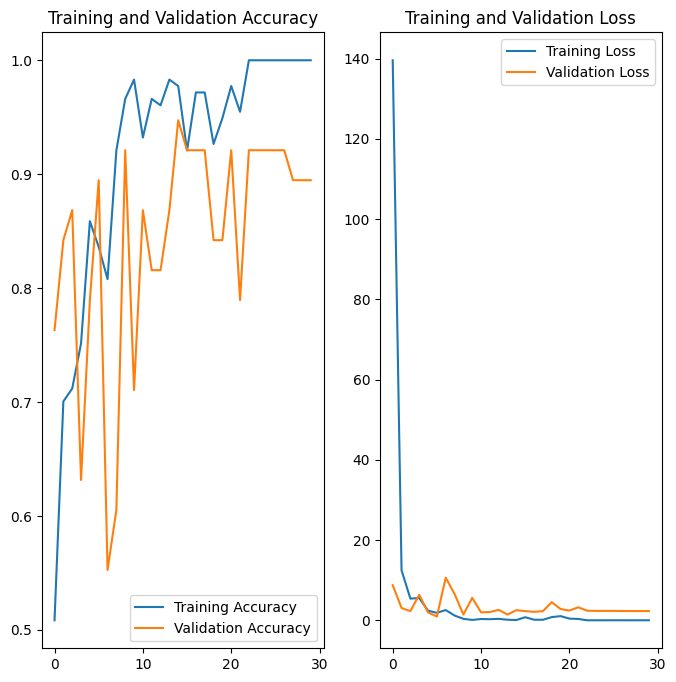

2024-04-16 01:05:23.165351: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 145ms/step
Overall Accuracy: 0.7894736842105263
Precision: 0.8235294117647058
Recall: 0.7368421052631579
F1-Score: 0.7777777777777778


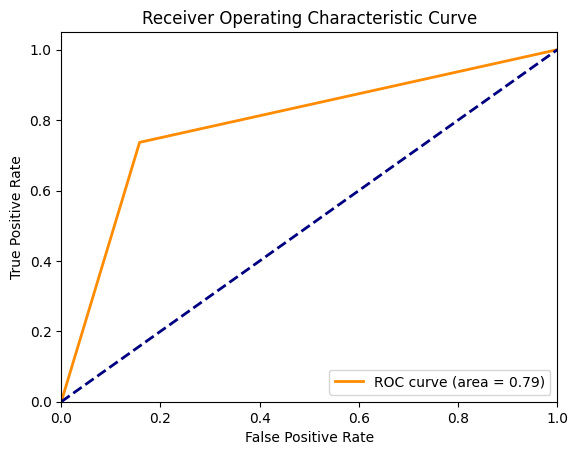

Epoch 1/30


2024-04-16 01:05:24.016173: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 46.7850 - accuracy: 0.5932

2024-04-16 01:05:28.405456: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 6s 112ms/step - loss: 46.7850 - accuracy: 0.5932 - val_loss: 1.3768 - val_accuracy: 0.7632
Epoch 2/30
36/36 [==============================] - 1s 29ms/step - loss: 0.9806 - accuracy: 0.7627 - val_loss: 0.5520 - val_accuracy: 0.8947
Epoch 3/30
36/36 [==============================] - 1s 29ms/step - loss: 0.5073 - accuracy: 0.8249 - val_loss: 0.4477 - val_accuracy: 0.8947
Epoch 4/30
36/36 [==============================] - 1s 28ms/step - loss: 0.4041 - accuracy: 0.8814 - val_loss: 0.6885 - val_accuracy: 0.7895
Epoch 5/30
36/36 [==============================] - 1s 23ms/step - loss: 0.2975 - accuracy: 0.9096 - val_loss: 0.9134 - val_accuracy: 0.8421
Epoch 6/30
36/36 [==============================] - 1s 26ms/step - loss: 0.5758 - accuracy: 0.8870 - val_loss: 0.8227 - val_accuracy: 0.9211
Epoch 7/30
36/36 [==============================] - 1s 20ms/step - loss: 0.7714 - accuracy: 0.9040 - val_loss: 0.6849 - val_accuracy: 0.8421
Epoch 8/30
36/36 [====

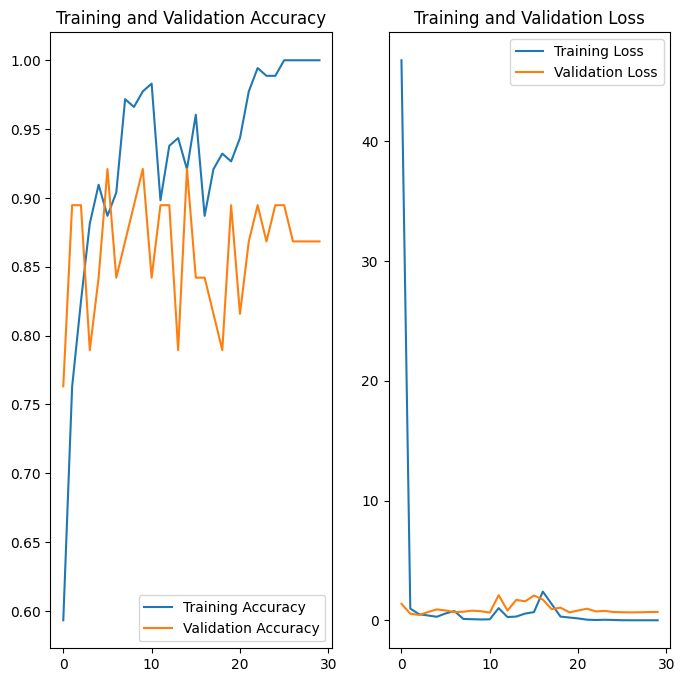

1/2 [==============>...............] - ETA: 0s

2024-04-16 01:05:51.806835: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 340ms/step
Overall Accuracy: 0.7894736842105263
Precision: 0.7894736842105263
Recall: 0.7894736842105263
F1-Score: 0.7894736842105263


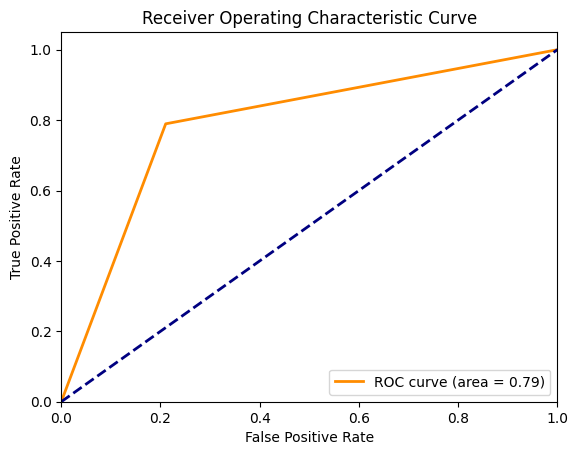

Epoch 1/30


2024-04-16 01:05:53.858140: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 100.6200 - accuracy: 0.5763

2024-04-16 01:05:58.835932: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 8s 122ms/step - loss: 100.6200 - accuracy: 0.5763 - val_loss: 4.8993 - val_accuracy: 0.8947
Epoch 2/30
36/36 [==============================] - 2s 43ms/step - loss: 2.3553 - accuracy: 0.8136 - val_loss: 0.5782 - val_accuracy: 0.8684
Epoch 3/30
36/36 [==============================] - 1s 25ms/step - loss: 0.2006 - accuracy: 0.9379 - val_loss: 0.4427 - val_accuracy: 0.8947
Epoch 4/30
36/36 [==============================] - 1s 26ms/step - loss: 0.2869 - accuracy: 0.9322 - val_loss: 0.3721 - val_accuracy: 0.9211
Epoch 5/30
36/36 [==============================] - 1s 22ms/step - loss: 0.0628 - accuracy: 0.9718 - val_loss: 0.4498 - val_accuracy: 0.9211
Epoch 6/30
36/36 [==============================] - 1s 22ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 0.4823 - val_accuracy: 0.8684
Epoch 7/30
36/36 [==============================] - 1s 19ms/step - loss: 0.0107 - accuracy: 0.9944 - val_loss: 0.6143 - val_accuracy: 0.8421
Epoch 8/30
36/36 [===

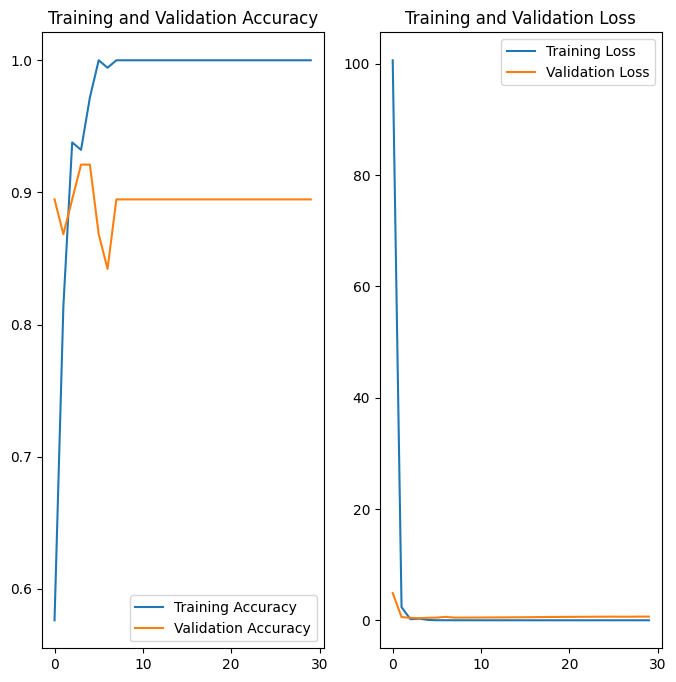

2024-04-16 01:06:22.096820: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 262ms/step
Overall Accuracy: 0.7368421052631579
Precision: 0.7368421052631579
Recall: 0.7368421052631579
F1-Score: 0.7368421052631579


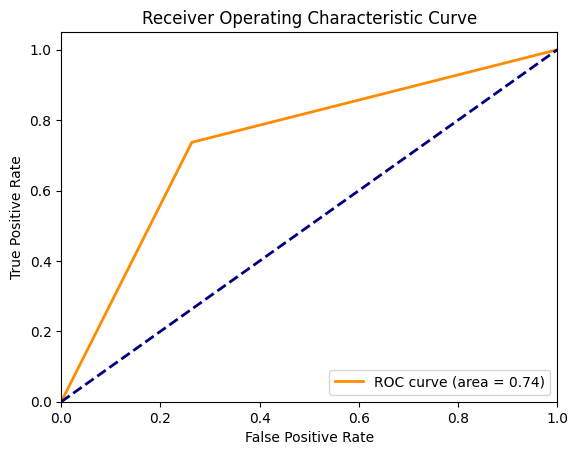

Epoch 1/30


2024-04-16 01:06:23.073945: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 24.6331 - accuracy: 0.6610

2024-04-16 01:06:27.603510: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 6s 112ms/step - loss: 24.6331 - accuracy: 0.6610 - val_loss: 1.8096 - val_accuracy: 0.5789
Epoch 2/30
36/36 [==============================] - 1s 29ms/step - loss: 2.8563 - accuracy: 0.7401 - val_loss: 1.8640 - val_accuracy: 0.7632
Epoch 3/30
36/36 [==============================] - 1s 29ms/step - loss: 1.3140 - accuracy: 0.8362 - val_loss: 4.8295 - val_accuracy: 0.7105
Epoch 4/30
36/36 [==============================] - 1s 23ms/step - loss: 10.5320 - accuracy: 0.7232 - val_loss: 2.3858 - val_accuracy: 0.7368
Epoch 5/30
36/36 [==============================] - 1s 19ms/step - loss: 2.3676 - accuracy: 0.7853 - val_loss: 1.0824 - val_accuracy: 0.8421
Epoch 6/30
36/36 [==============================] - 1s 19ms/step - loss: 1.5608 - accuracy: 0.8418 - val_loss: 1.3212 - val_accuracy: 0.8421
Epoch 7/30
36/36 [==============================] - 1s 21ms/step - loss: 0.5715 - accuracy: 0.8644 - val_loss: 0.9110 - val_accuracy: 0.8947
Epoch 8/30
36/36 [===

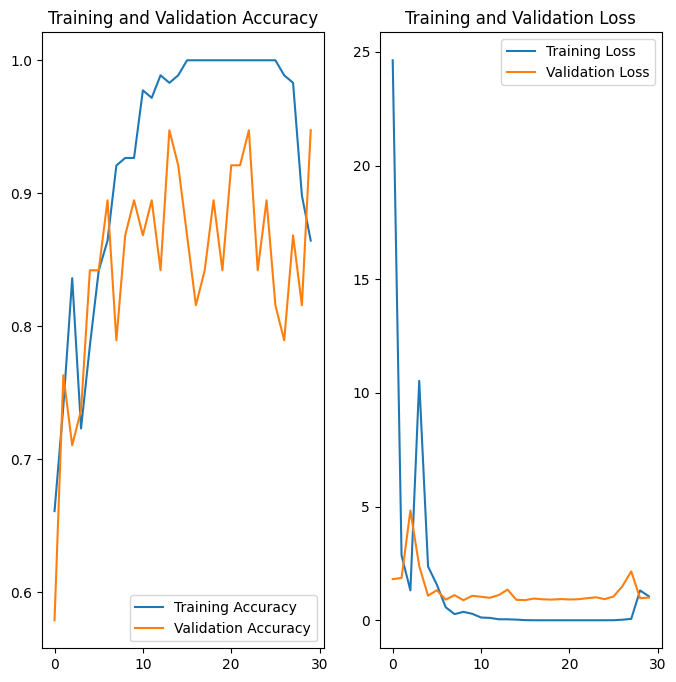

2024-04-16 01:06:51.014203: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 253ms/step
Overall Accuracy: 0.8157894736842105
Precision: 0.8333333333333334
Recall: 0.7894736842105263
F1-Score: 0.8108108108108109


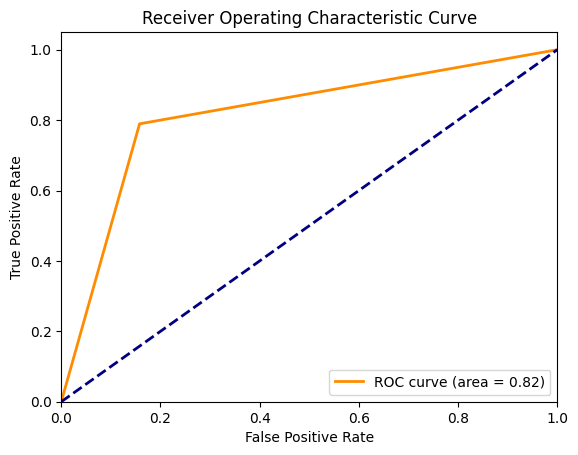

Epoch 1/30


2024-04-16 01:06:52.010531: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 56.4858 - accuracy: 0.6441

2024-04-16 01:06:56.188105: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 5s 100ms/step - loss: 56.4858 - accuracy: 0.6441 - val_loss: 4.8225 - val_accuracy: 0.8421
Epoch 2/30
36/36 [==============================] - 1s 24ms/step - loss: 13.5384 - accuracy: 0.7175 - val_loss: 14.1885 - val_accuracy: 0.5526
Epoch 3/30
36/36 [==============================] - 1s 28ms/step - loss: 5.1148 - accuracy: 0.7966 - val_loss: 4.3807 - val_accuracy: 0.8421
Epoch 4/30
36/36 [==============================] - 1s 27ms/step - loss: 1.1220 - accuracy: 0.9266 - val_loss: 4.6239 - val_accuracy: 0.8158
Epoch 5/30
36/36 [==============================] - 1s 26ms/step - loss: 2.0343 - accuracy: 0.9040 - val_loss: 7.5396 - val_accuracy: 0.7105
Epoch 6/30
36/36 [==============================] - 1s 22ms/step - loss: 7.4252 - accuracy: 0.8531 - val_loss: 7.2906 - val_accuracy: 0.7632
Epoch 7/30
36/36 [==============================] - 1s 21ms/step - loss: 9.0448 - accuracy: 0.8136 - val_loss: 4.8334 - val_accuracy: 0.8158
Epoch 8/30
36/36 [==

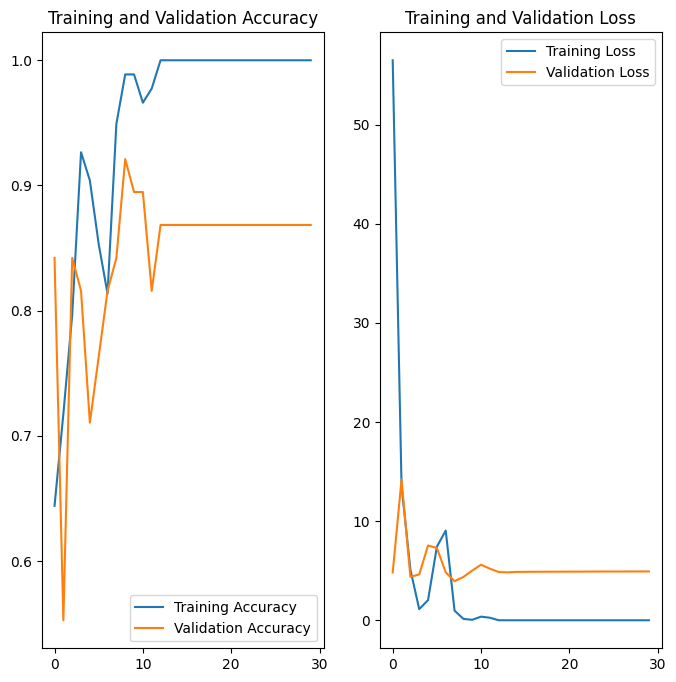

2024-04-16 01:07:19.757550: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 197ms/step
Overall Accuracy: 0.7631578947368421
Precision: 0.8125
Recall: 0.6842105263157895
F1-Score: 0.742857142857143


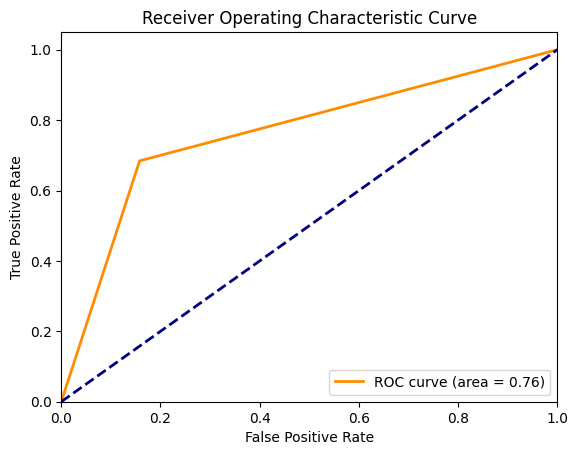

In [79]:
for i in range(5):
    # MODELING
    x = layers.Input(shape=(target_height, target_width, 1)) #input_shape = (height, width, channel)
    y = layers.DepthwiseConv2D(3, strides=(1,1), padding='valid', depth_multiplier=1)(x)

    y = layers.Conv2D(8, (3,3), padding='same')(x)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = layers.Conv2D(16, (3,3), padding='same')(y)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = layers.Conv2D(32, (3,3), padding='same')(y)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block(y, 32)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = layers.Flatten()(y)
    y = layers.Dense(50, activation='relu')(y)
    y = layers.Dense(1, activation='sigmoid')(y)

    model_2 = tf.keras.Model(x,y)
    model_2._name = 'Model_2'
    
    if i == 0:
        model_2.summary()

    # COMPILING
    model_2.compile(optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
                    loss = 'binary_crossentropy',
                    metrics = 'accuracy')
    
    # TRAINING
    epochs = 30
    history = model_2.fit(x = X_train, y = y_train,
                          batch_size=5,
                          epochs = epochs,
                          validation_data = (X_val, y_val))

    # SHOWING RESULTS
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

    # PREDICTING
    pred_prob = model_2.predict(X_test)
    y_pred = np.where(pred_prob > 0.5, 1, 0)

    # Compute overall accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Overall Accuracy:", accuracy)

    # Compute precision
    precision = precision_score(y_test, y_pred)
    print("Precision:", precision)

    # Compute recall
    recall = recall_score(y_test, y_pred)
    print("Recall:", recall)

    # Compute F1-score
    f1 = f1_score(y_test, y_pred)
    print("F1-Score:", f1)

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()
    #del model_2
    #del history


In [43]:
def res_block_adj(x, ch_in, ch_out):
  fx = layers.Conv2D(ch_in/2, (1,1), padding='same', strides=(1,1), activation='relu')(x)
  fx = layers.Conv2D(ch_in/2, (3,3), padding='same', strides=(1,1), activation='relu')(fx)
  fx = layers.Conv2D(ch_out, (1,1), padding='same', strides=(1,1))(fx)

  skip_connection = layers.Conv2D(ch_out, (1,1), padding='same', strides=(1,1))(x)

  out = layers.Add()([skip_connection, fx])
  out = layers.Activation('relu')(out)
  return out

Model: "Model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_48 (InputLayer)       [(None, 400, 400, 1)]        0         []                            
                                                                                                  
 conv2d_251 (Conv2D)         (None, 400, 400, 8)          208       ['input_48[0][0]']            
                                                                                                  
 max_pooling2d_188 (MaxPool  (None, 200, 200, 8)          0         ['conv2d_251[0][0]']          
 ing2D)                                                                                           
                                                                                                  
 conv2d_252 (Conv2D)         (None, 200, 200, 4)          36        ['max_pooling2d_188[0][0

2024-04-16 00:04:02.688399: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 23.0547 - accuracy: 0.6554

2024-04-16 00:04:08.254745: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 7s 102ms/step - loss: 23.0547 - accuracy: 0.6554 - val_loss: 5.7052 - val_accuracy: 0.6316
Epoch 2/30
36/36 [==============================] - 1s 35ms/step - loss: 4.2532 - accuracy: 0.7571 - val_loss: 4.6320 - val_accuracy: 0.7895
Epoch 3/30
36/36 [==============================] - 1s 26ms/step - loss: 4.0536 - accuracy: 0.7458 - val_loss: 5.8812 - val_accuracy: 0.6579
Epoch 4/30
36/36 [==============================] - 1s 33ms/step - loss: 4.5031 - accuracy: 0.7627 - val_loss: 8.2999 - val_accuracy: 0.6316
Epoch 5/30
36/36 [==============================] - 1s 37ms/step - loss: 5.1370 - accuracy: 0.8079 - val_loss: 10.3632 - val_accuracy: 0.6316
Epoch 6/30
36/36 [==============================] - 1s 23ms/step - loss: 2.2343 - accuracy: 0.8362 - val_loss: 6.9994 - val_accuracy: 0.7105
Epoch 7/30
36/36 [==============================] - 1s 27ms/step - loss: 0.8003 - accuracy: 0.9040 - val_loss: 7.7323 - val_accuracy: 0.7368
Epoch 8/30
36/36 [===

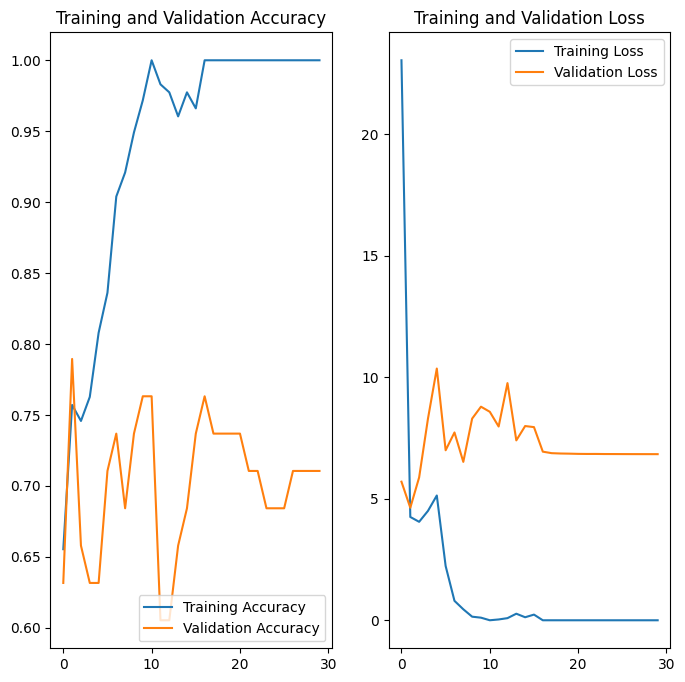

2024-04-16 00:04:35.124291: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 195ms/step
Overall Accuracy: 0.7368421052631579
Precision: 0.7307692307692307
Recall: 0.8636363636363636
F1-Score: 0.7916666666666666


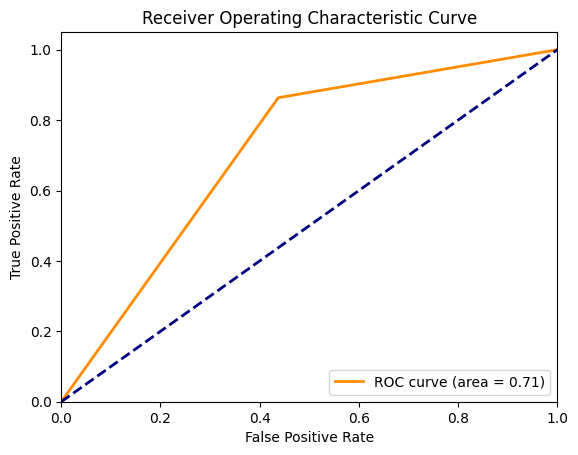

Epoch 1/30


2024-04-16 00:04:36.155356: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 120.4403 - accuracy: 0.5932

2024-04-16 00:04:39.536666: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 5s 100ms/step - loss: 120.4403 - accuracy: 0.5932 - val_loss: 28.0540 - val_accuracy: 0.6316
Epoch 2/30
36/36 [==============================] - 1s 30ms/step - loss: 22.0410 - accuracy: 0.6949 - val_loss: 17.8268 - val_accuracy: 0.5789
Epoch 3/30
36/36 [==============================] - 1s 25ms/step - loss: 7.7995 - accuracy: 0.7232 - val_loss: 5.9597 - val_accuracy: 0.7368
Epoch 4/30
36/36 [==============================] - 1s 24ms/step - loss: 3.3519 - accuracy: 0.8079 - val_loss: 4.1741 - val_accuracy: 0.7895
Epoch 5/30
36/36 [==============================] - 1s 25ms/step - loss: 1.3292 - accuracy: 0.8531 - val_loss: 4.8320 - val_accuracy: 0.8158
Epoch 6/30
36/36 [==============================] - 1s 28ms/step - loss: 0.6217 - accuracy: 0.9096 - val_loss: 3.8883 - val_accuracy: 0.7895
Epoch 7/30
36/36 [==============================] - 1s 25ms/step - loss: 0.2201 - accuracy: 0.9605 - val_loss: 3.8483 - val_accuracy: 0.7895
Epoch 8/30
36/36 [

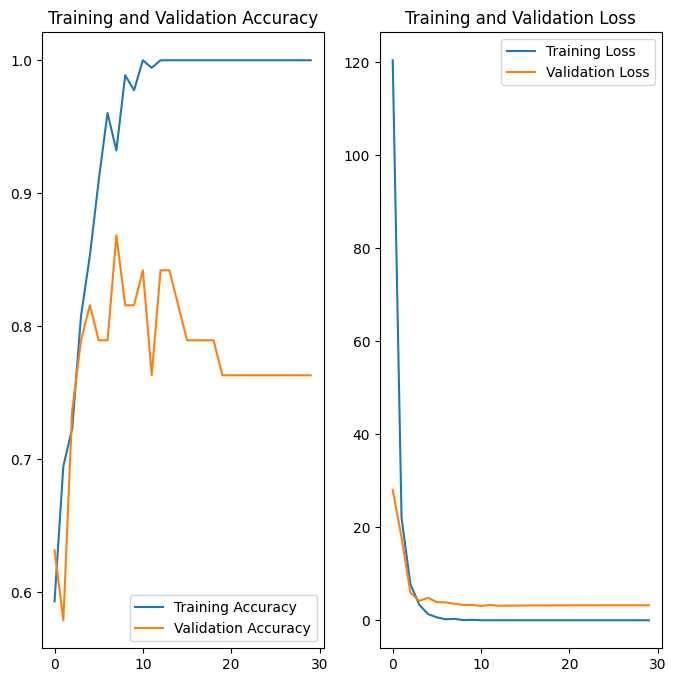

2024-04-16 00:05:05.606555: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 117ms/step
Overall Accuracy: 0.7894736842105263
Precision: 0.75
Recall: 0.9545454545454546
F1-Score: 0.84


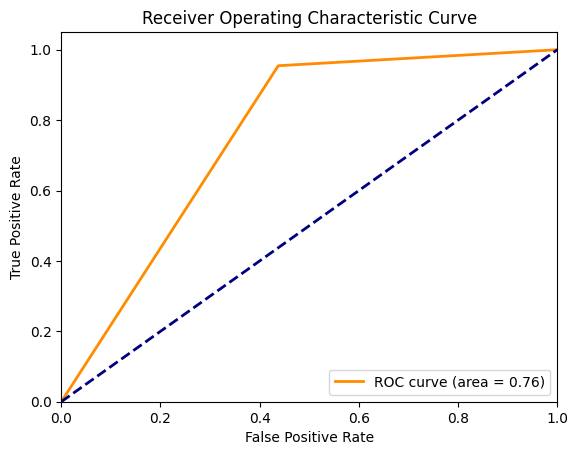

Epoch 1/30


2024-04-16 00:05:06.545333: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 78.9177 - accuracy: 0.5763

2024-04-16 00:05:11.039558: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 6s 110ms/step - loss: 78.9177 - accuracy: 0.5763 - val_loss: 6.8642 - val_accuracy: 0.7105
Epoch 2/30
36/36 [==============================] - 1s 29ms/step - loss: 4.0415 - accuracy: 0.7006 - val_loss: 3.9406 - val_accuracy: 0.7632
Epoch 3/30
36/36 [==============================] - 1s 33ms/step - loss: 1.8418 - accuracy: 0.7966 - val_loss: 3.7649 - val_accuracy: 0.6579
Epoch 4/30
36/36 [==============================] - 1s 26ms/step - loss: 1.3655 - accuracy: 0.8531 - val_loss: 2.9655 - val_accuracy: 0.8158
Epoch 5/30
36/36 [==============================] - 1s 41ms/step - loss: 0.4490 - accuracy: 0.9096 - val_loss: 2.1494 - val_accuracy: 0.8158
Epoch 6/30
36/36 [==============================] - 1s 23ms/step - loss: 0.2179 - accuracy: 0.9379 - val_loss: 2.2558 - val_accuracy: 0.8158
Epoch 7/30
36/36 [==============================] - 1s 23ms/step - loss: 0.0456 - accuracy: 0.9887 - val_loss: 2.2163 - val_accuracy: 0.8158
Epoch 8/30
36/36 [====

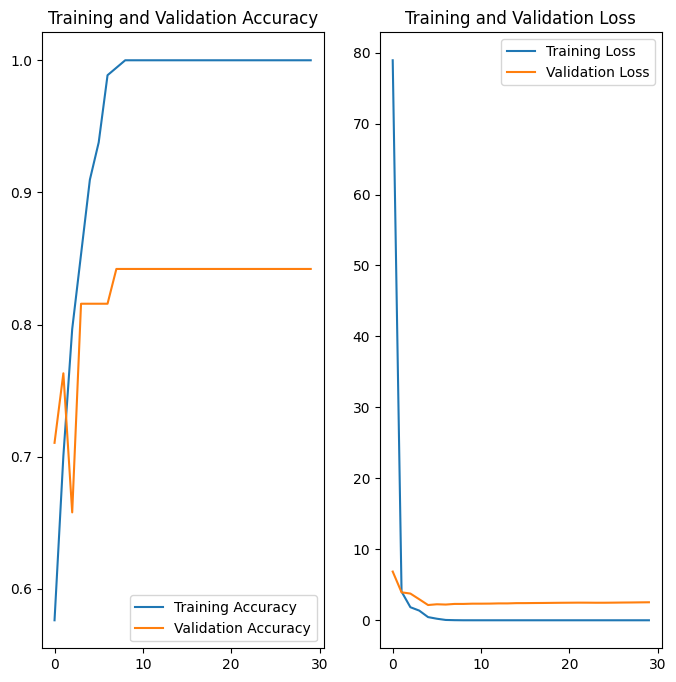

2024-04-16 00:05:38.460208: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 203ms/step
Overall Accuracy: 0.7631578947368421
Precision: 0.7241379310344828
Recall: 0.9545454545454546
F1-Score: 0.823529411764706


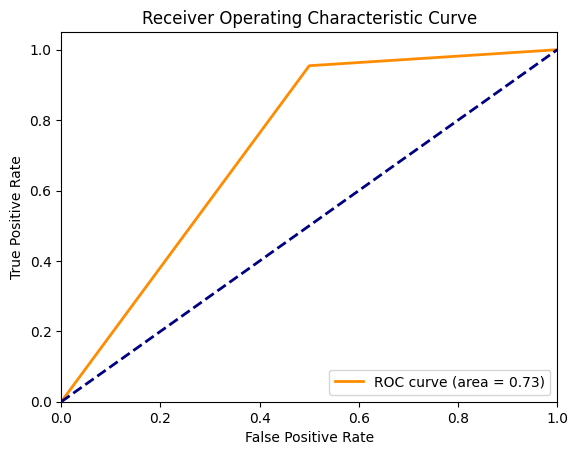

Epoch 1/30


2024-04-16 00:05:39.519165: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 43.3168 - accuracy: 0.6102

2024-04-16 00:05:43.767502: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 6s 104ms/step - loss: 43.3168 - accuracy: 0.6102 - val_loss: 13.6513 - val_accuracy: 0.8158
Epoch 2/30
36/36 [==============================] - 1s 32ms/step - loss: 4.5260 - accuracy: 0.7345 - val_loss: 3.3119 - val_accuracy: 0.7105
Epoch 3/30
36/36 [==============================] - 1s 29ms/step - loss: 0.7780 - accuracy: 0.8701 - val_loss: 2.7438 - val_accuracy: 0.7895
Epoch 4/30
36/36 [==============================] - 1s 34ms/step - loss: 0.0512 - accuracy: 0.9774 - val_loss: 1.8402 - val_accuracy: 0.7895
Epoch 5/30
36/36 [==============================] - 1s 28ms/step - loss: 0.0192 - accuracy: 0.9944 - val_loss: 1.9529 - val_accuracy: 0.7632
Epoch 6/30
36/36 [==============================] - 1s 27ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 1.9830 - val_accuracy: 0.7632
Epoch 7/30
36/36 [==============================] - 1s 28ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 1.9491 - val_accuracy: 0.7895
Epoch 8/30
36/36 [===

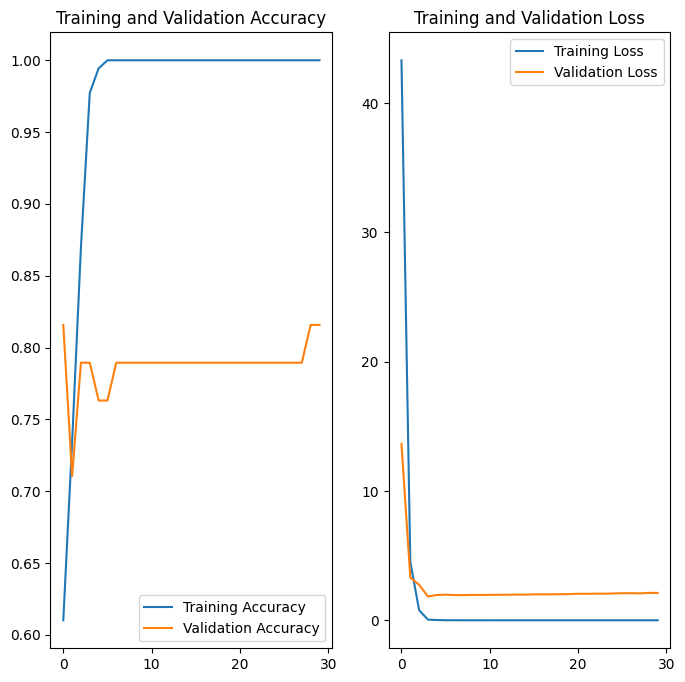

2024-04-16 00:06:12.663357: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 281ms/step
Overall Accuracy: 0.7368421052631579
Precision: 0.7142857142857143
Recall: 0.9090909090909091
F1-Score: 0.8


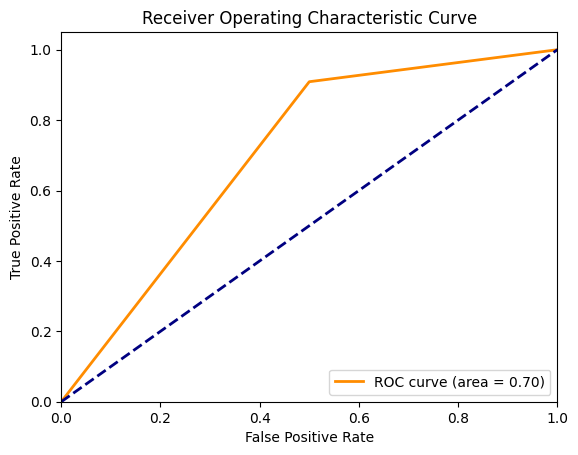

Epoch 1/30


2024-04-16 00:06:13.743891: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 152.0848 - accuracy: 0.5424

2024-04-16 00:06:18.624700: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 6s 125ms/step - loss: 152.0848 - accuracy: 0.5424 - val_loss: 60.1091 - val_accuracy: 0.7105
Epoch 2/30
36/36 [==============================] - 1s 28ms/step - loss: 16.4988 - accuracy: 0.7288 - val_loss: 10.1938 - val_accuracy: 0.7632
Epoch 3/30
36/36 [==============================] - 1s 30ms/step - loss: 3.2027 - accuracy: 0.7910 - val_loss: 5.7803 - val_accuracy: 0.7632
Epoch 4/30
36/36 [==============================] - 1s 29ms/step - loss: 0.5240 - accuracy: 0.9435 - val_loss: 5.3597 - val_accuracy: 0.7632
Epoch 5/30
36/36 [==============================] - 1s 23ms/step - loss: 0.3802 - accuracy: 0.9548 - val_loss: 5.9026 - val_accuracy: 0.7895
Epoch 6/30
36/36 [==============================] - 1s 25ms/step - loss: 0.0933 - accuracy: 0.9718 - val_loss: 5.0541 - val_accuracy: 0.7895
Epoch 7/30
36/36 [==============================] - 1s 33ms/step - loss: 0.8318 - accuracy: 0.9153 - val_loss: 5.0942 - val_accuracy: 0.8421
Epoch 8/30
36/36 [

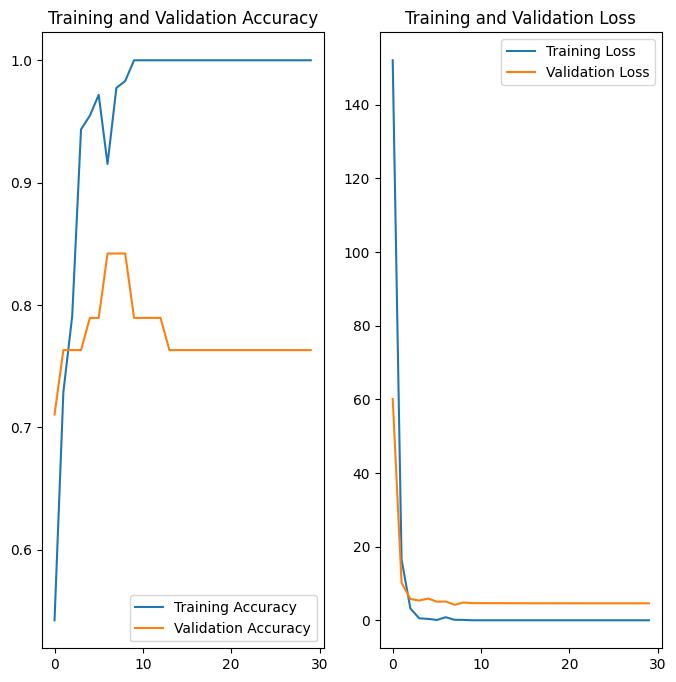

2024-04-16 00:06:46.713960: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 355ms/step
Overall Accuracy: 0.7105263157894737
Precision: 0.7619047619047619
Recall: 0.7272727272727273
F1-Score: 0.7441860465116279


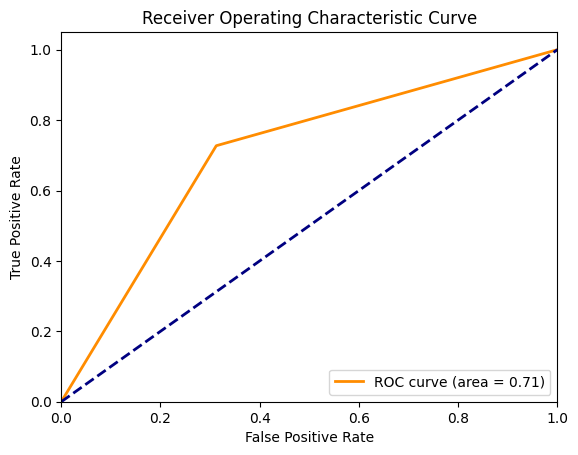

In [55]:
for i in range(5):
    # MODELING
    x = layers.Input(shape=(target_height, target_width, 1)) #input_shape = (height, width, channel)
    y = layers.DepthwiseConv2D(kernel_size=(3,3), strides=(1,1), padding='valid', depth_multiplier=1)(x)
    y = layers.Conv2D(8, (5,5), padding='same')(x)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block_adj(y, 8, 16)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block_adj(y, 16, 32)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block_adj(y, 32, 64)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)    

    y = layers.Flatten()(y)
    y = layers.Dense(50, activation='relu')(y)
    y = layers.Dense(1, activation='sigmoid')(y)

    model_3 = tf.keras.Model(x,y)
    model_3._name = 'Model_3'
    
    if i == 0:
        model_3.summary()

    # COMPILING
    model_3.compile(optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
                    loss = 'binary_crossentropy',
                    metrics = 'accuracy')
    
    # TRAINING
    epochs = 30
    history = model_3.fit(x = X_train, y = y_train,
                          batch_size=5,
                          epochs = epochs,
                          validation_data = (X_val, y_val))

    # SHOWING RESULTS
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

    # PREDICTING
    pred_prob = model_3.predict(X_test)
    y_pred = np.where(pred_prob > 0.5, 1, 0)

    # Compute overall accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Overall Accuracy:", accuracy)

    # Compute precision
    precision = precision_score(y_test, y_pred)
    print("Precision:", precision)

    # Compute recall
    recall = recall_score(y_test, y_pred)
    print("Recall:", recall)

    # Compute F1-score
    f1 = f1_score(y_test, y_pred)
    print("F1-Score:", f1)

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()
    #del model_3
    #del history


Model: "Model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_59 (InputLayer)       [(None, 400, 400, 1)]        0         []                            
                                                                                                  
 conv2d_406 (Conv2D)         (None, 400, 400, 8)          208       ['input_59[0][0]']            
                                                                                                  
 max_pooling2d_235 (MaxPool  (None, 200, 200, 8)          0         ['conv2d_406[0][0]']          
 ing2D)                                                                                           
                                                                                                  
 conv2d_407 (Conv2D)         (None, 200, 200, 4)          36        ['max_pooling2d_235[0][0

2024-04-16 00:34:22.138055: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 21.4923 - accuracy: 0.4520

2024-04-16 00:34:29.304177: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 9s 175ms/step - loss: 21.4923 - accuracy: 0.4520 - val_loss: 0.9801 - val_accuracy: 0.5263
Epoch 2/30
36/36 [==============================] - 1s 35ms/step - loss: 0.5650 - accuracy: 0.7119 - val_loss: 0.5944 - val_accuracy: 0.6053
Epoch 3/30
36/36 [==============================] - 1s 40ms/step - loss: 0.5097 - accuracy: 0.7514 - val_loss: 0.6469 - val_accuracy: 0.6842
Epoch 4/30
36/36 [==============================] - 1s 37ms/step - loss: 0.4441 - accuracy: 0.7853 - val_loss: 0.6248 - val_accuracy: 0.7368
Epoch 5/30
36/36 [==============================] - 1s 35ms/step - loss: 0.3355 - accuracy: 0.8588 - val_loss: 0.7187 - val_accuracy: 0.6579
Epoch 6/30
36/36 [==============================] - 1s 29ms/step - loss: 0.3298 - accuracy: 0.8475 - val_loss: 0.5950 - val_accuracy: 0.7105
Epoch 7/30
36/36 [==============================] - 1s 29ms/step - loss: 0.2304 - accuracy: 0.8983 - val_loss: 0.6465 - val_accuracy: 0.7895
Epoch 8/30
36/36 [====

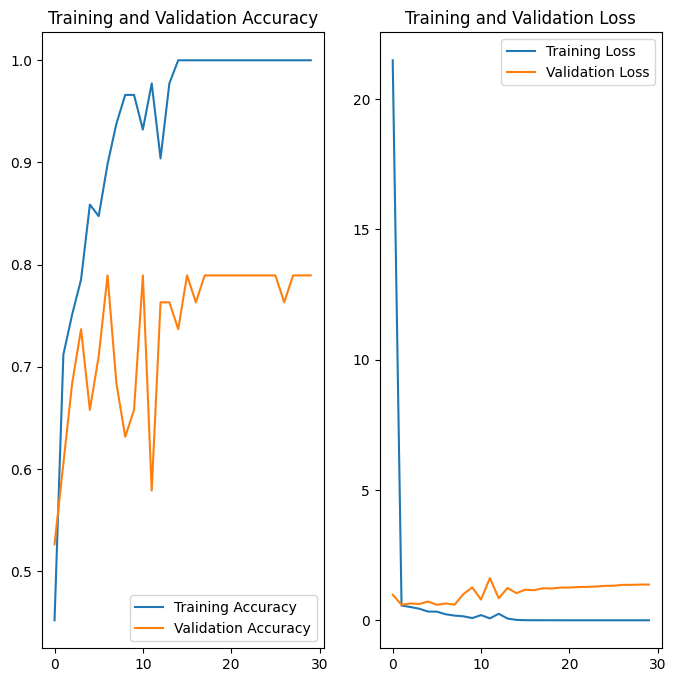

2024-04-16 00:35:00.711390: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 520ms/step
Overall Accuracy: 0.7631578947368421
Precision: 0.76
Recall: 0.8636363636363636
F1-Score: 0.8085106382978724


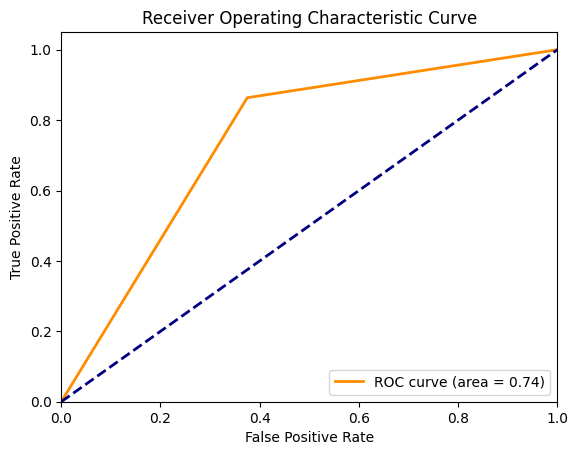

Epoch 1/30


2024-04-16 00:35:02.607043: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 14.0662 - accuracy: 0.5989

2024-04-16 00:35:09.529367: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 9s 176ms/step - loss: 14.0662 - accuracy: 0.5989 - val_loss: 1.8873 - val_accuracy: 0.7368
Epoch 2/30
36/36 [==============================] - 1s 32ms/step - loss: 1.3936 - accuracy: 0.7401 - val_loss: 1.0694 - val_accuracy: 0.6842
Epoch 3/30
36/36 [==============================] - 1s 36ms/step - loss: 1.0133 - accuracy: 0.7062 - val_loss: 0.9867 - val_accuracy: 0.6579
Epoch 4/30
36/36 [==============================] - 1s 41ms/step - loss: 0.7952 - accuracy: 0.7175 - val_loss: 2.1119 - val_accuracy: 0.7105
Epoch 5/30
36/36 [==============================] - 1s 34ms/step - loss: 0.6907 - accuracy: 0.7797 - val_loss: 0.9479 - val_accuracy: 0.7368
Epoch 6/30
36/36 [==============================] - 1s 40ms/step - loss: 0.2927 - accuracy: 0.8588 - val_loss: 0.6550 - val_accuracy: 0.7105
Epoch 7/30
36/36 [==============================] - 1s 27ms/step - loss: 0.2192 - accuracy: 0.8983 - val_loss: 0.7766 - val_accuracy: 0.7895
Epoch 8/30
36/36 [====

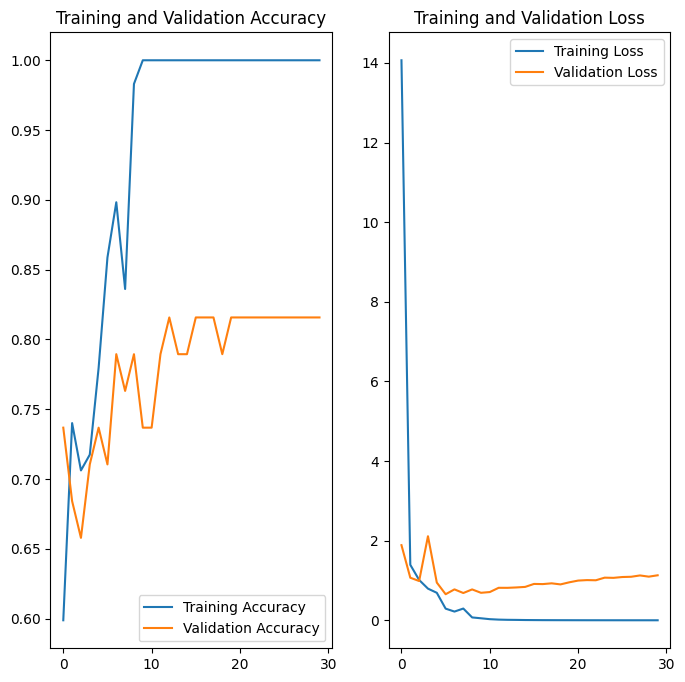

2024-04-16 00:35:41.782689: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 523ms/step
Overall Accuracy: 0.7368421052631579
Precision: 0.75
Recall: 0.8181818181818182
F1-Score: 0.7826086956521738


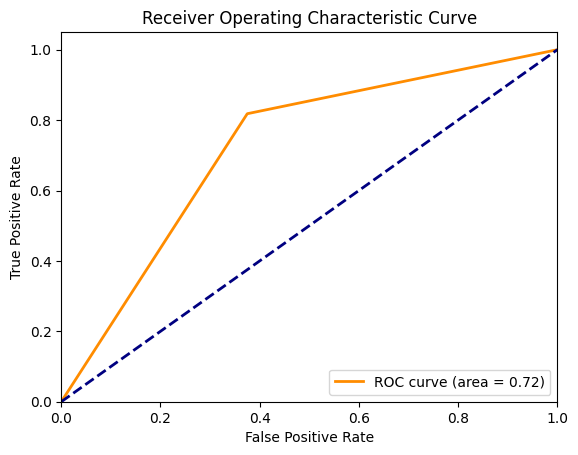

Epoch 1/30


2024-04-16 00:35:43.652758: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 9.4295 - accuracy: 0.5593

2024-04-16 00:35:50.800624: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 9s 176ms/step - loss: 9.4295 - accuracy: 0.5593 - val_loss: 1.5251 - val_accuracy: 0.7105
Epoch 2/30
36/36 [==============================] - 2s 48ms/step - loss: 0.7876 - accuracy: 0.5989 - val_loss: 0.7075 - val_accuracy: 0.7105
Epoch 3/30
36/36 [==============================] - 2s 45ms/step - loss: 1.0347 - accuracy: 0.7062 - val_loss: 0.8220 - val_accuracy: 0.6842
Epoch 4/30
36/36 [==============================] - 2s 46ms/step - loss: 0.5545 - accuracy: 0.7853 - val_loss: 0.6364 - val_accuracy: 0.7368
Epoch 5/30
36/36 [==============================] - 1s 33ms/step - loss: 0.4845 - accuracy: 0.7797 - val_loss: 0.6264 - val_accuracy: 0.7632
Epoch 6/30
36/36 [==============================] - 1s 31ms/step - loss: 0.5178 - accuracy: 0.7740 - val_loss: 0.9842 - val_accuracy: 0.7105
Epoch 7/30
36/36 [==============================] - 1s 30ms/step - loss: 0.4814 - accuracy: 0.7966 - val_loss: 0.7038 - val_accuracy: 0.7368
Epoch 8/30
36/36 [=====

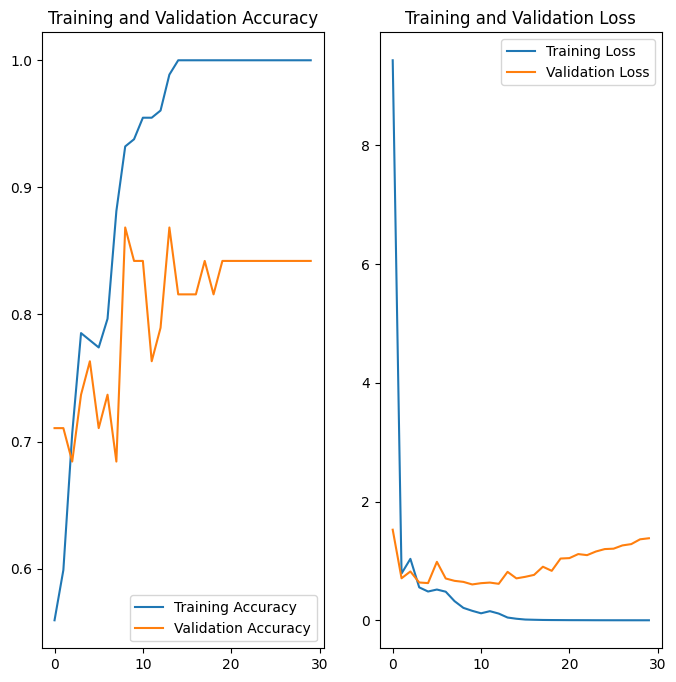

2024-04-16 00:36:22.981526: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 568ms/step
Overall Accuracy: 0.7368421052631579
Precision: 0.75
Recall: 0.8181818181818182
F1-Score: 0.7826086956521738


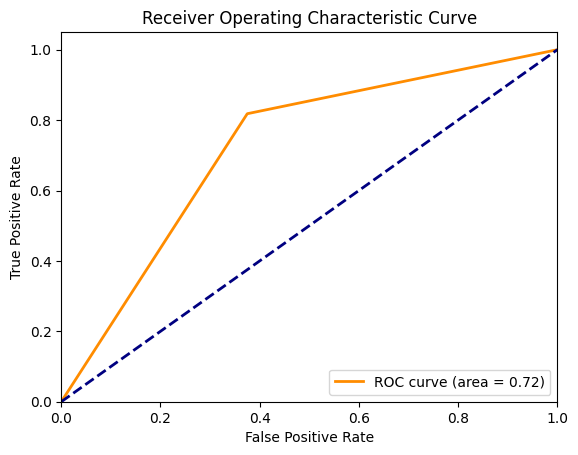

Epoch 1/30


2024-04-16 00:36:24.500395: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 8.9480 - accuracy: 0.5593

2024-04-16 00:36:31.873246: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 10s 181ms/step - loss: 8.9480 - accuracy: 0.5593 - val_loss: 0.9738 - val_accuracy: 0.7368
Epoch 2/30
36/36 [==============================] - 1s 37ms/step - loss: 0.6664 - accuracy: 0.7232 - val_loss: 0.7589 - val_accuracy: 0.5263
Epoch 3/30
36/36 [==============================] - 1s 31ms/step - loss: 0.5702 - accuracy: 0.6949 - val_loss: 0.7076 - val_accuracy: 0.7632
Epoch 4/30
36/36 [==============================] - 2s 42ms/step - loss: 0.5991 - accuracy: 0.7062 - val_loss: 0.6112 - val_accuracy: 0.6842
Epoch 5/30
36/36 [==============================] - 1s 27ms/step - loss: 0.4977 - accuracy: 0.7401 - val_loss: 0.6818 - val_accuracy: 0.6053
Epoch 6/30
36/36 [==============================] - 1s 32ms/step - loss: 0.4995 - accuracy: 0.7288 - val_loss: 0.6353 - val_accuracy: 0.6316
Epoch 7/30
36/36 [==============================] - 1s 40ms/step - loss: 0.4871 - accuracy: 0.7401 - val_loss: 0.7114 - val_accuracy: 0.6053
Epoch 8/30
36/36 [====

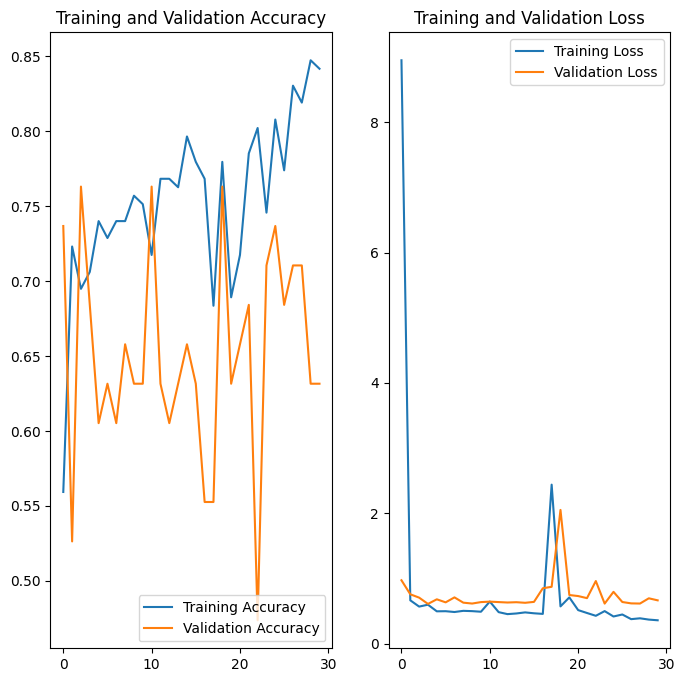

2024-04-16 00:37:04.175250: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 529ms/step
Overall Accuracy: 0.7368421052631579
Precision: 0.7142857142857143
Recall: 0.9090909090909091
F1-Score: 0.8


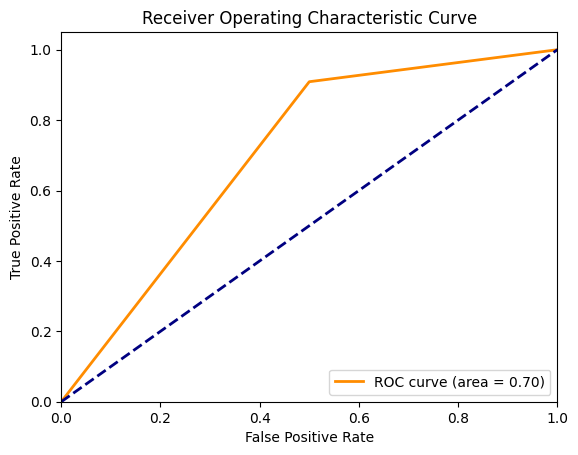

Epoch 1/30


2024-04-16 00:37:05.916429: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 11.8994 - accuracy: 0.5480

2024-04-16 00:37:12.988421: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 9s 167ms/step - loss: 11.8994 - accuracy: 0.5480 - val_loss: 1.0299 - val_accuracy: 0.7105
Epoch 2/30
36/36 [==============================] - 2s 56ms/step - loss: 0.9934 - accuracy: 0.7119 - val_loss: 1.9897 - val_accuracy: 0.4737
Epoch 3/30
36/36 [==============================] - 2s 46ms/step - loss: 0.8054 - accuracy: 0.7006 - val_loss: 0.8271 - val_accuracy: 0.7895
Epoch 4/30
36/36 [==============================] - 1s 26ms/step - loss: 0.4864 - accuracy: 0.7514 - val_loss: 0.7479 - val_accuracy: 0.7368
Epoch 5/30
36/36 [==============================] - 1s 26ms/step - loss: 0.5122 - accuracy: 0.7740 - val_loss: 0.6850 - val_accuracy: 0.8158
Epoch 6/30
36/36 [==============================] - 1s 30ms/step - loss: 0.4511 - accuracy: 0.8079 - val_loss: 0.8091 - val_accuracy: 0.7632
Epoch 7/30
36/36 [==============================] - 1s 36ms/step - loss: 0.2897 - accuracy: 0.8644 - val_loss: 0.6413 - val_accuracy: 0.7632
Epoch 8/30
36/36 [====

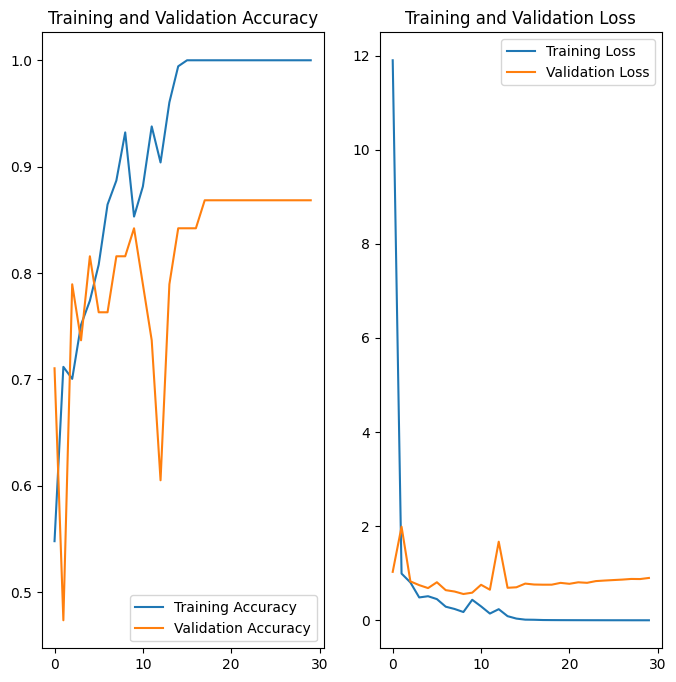

2024-04-16 00:37:45.905883: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 279ms/step
Overall Accuracy: 0.7894736842105263
Precision: 0.7916666666666666
Recall: 0.8636363636363636
F1-Score: 0.8260869565217391


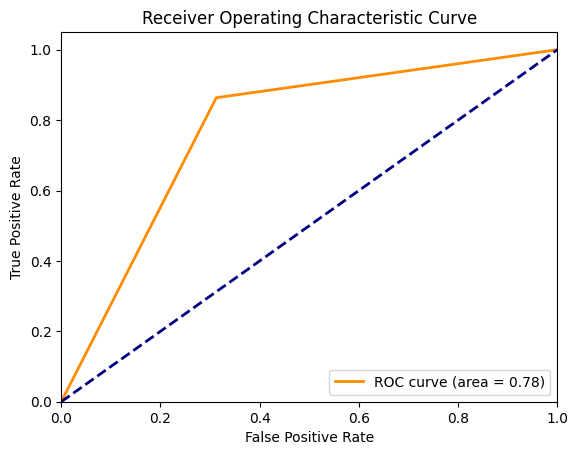

In [63]:
for i in range(5):
    # MODELING
    x = layers.Input(shape=(target_height, target_width, 1)) #input_shape = (height, width, channel)
    y = layers.DepthwiseConv2D(kernel_size=(3,3), strides=(1,1), padding='valid', depth_multiplier=1)(x)
    y = layers.Conv2D(8, (5,5), padding='same')(x)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block_adj(y, 8, 16)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block_adj(y, 16, 32)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block_adj(y, 32, 64)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block_adj(y, 64, 128)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block_adj(y, 128, 256)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = layers.Flatten()(y)
    y = layers.Dense(50, activation='relu')(y)
    y = layers.Dense(1, activation='sigmoid')(y)

    model_4 = tf.keras.Model(x,y)
    model_4._name = 'Model_4'
    
    if i == 0:
        model_4.summary()

    # COMPILING
    model_4.compile(optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
                    loss = 'binary_crossentropy',
                    metrics = 'accuracy')
    
    # TRAINING
    epochs = 30
    history = model_4.fit(x = X_train, y = y_train,
                          batch_size=5,
                          epochs = epochs,
                          validation_data = (X_val, y_val))

    # SHOWING RESULTS
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

    # PREDICTING
    pred_prob = model_4.predict(X_test)
    y_pred = np.where(pred_prob > 0.5, 1, 0)

    # Compute overall accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Overall Accuracy:", accuracy)

    # Compute precision
    precision = precision_score(y_test, y_pred)
    print("Precision:", precision)

    # Compute recall
    recall = recall_score(y_test, y_pred)
    print("Recall:", recall)

    # Compute F1-score
    f1 = f1_score(y_test, y_pred)
    print("F1-Score:", f1)

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()
    #del model_4
    #del history


Model: "Model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_64 (InputLayer)       [(None, 400, 400, 1)]        0         []                            
                                                                                                  
 conv2d_511 (Conv2D)         (None, 400, 400, 8)          208       ['input_64[0][0]']            
                                                                                                  
 max_pooling2d_265 (MaxPool  (None, 200, 200, 8)          0         ['conv2d_511[0][0]']          
 ing2D)                                                                                           
                                                                                                  
 conv2d_512 (Conv2D)         (None, 200, 200, 4)          36        ['max_pooling2d_265[0][0

2024-04-16 00:42:55.094063: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 13.1052 - accuracy: 0.5932

2024-04-16 00:43:02.031216: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 9s 170ms/step - loss: 13.1052 - accuracy: 0.5932 - val_loss: 0.6095 - val_accuracy: 0.7368
Epoch 2/30
36/36 [==============================] - 2s 45ms/step - loss: 0.5166 - accuracy: 0.7401 - val_loss: 0.6422 - val_accuracy: 0.7368
Epoch 3/30
36/36 [==============================] - 1s 36ms/step - loss: 0.4146 - accuracy: 0.8192 - val_loss: 0.5668 - val_accuracy: 0.7368
Epoch 4/30
36/36 [==============================] - 1s 33ms/step - loss: 0.2853 - accuracy: 0.9096 - val_loss: 0.7492 - val_accuracy: 0.6053
Epoch 5/30
36/36 [==============================] - 1s 27ms/step - loss: 0.2479 - accuracy: 0.9040 - val_loss: 0.4310 - val_accuracy: 0.8421
Epoch 6/30
36/36 [==============================] - 1s 29ms/step - loss: 0.1310 - accuracy: 0.9605 - val_loss: 0.6086 - val_accuracy: 0.7632
Epoch 7/30
36/36 [==============================] - 1s 32ms/step - loss: 0.0672 - accuracy: 0.9831 - val_loss: 0.5045 - val_accuracy: 0.8684
Epoch 8/30
36/36 [====

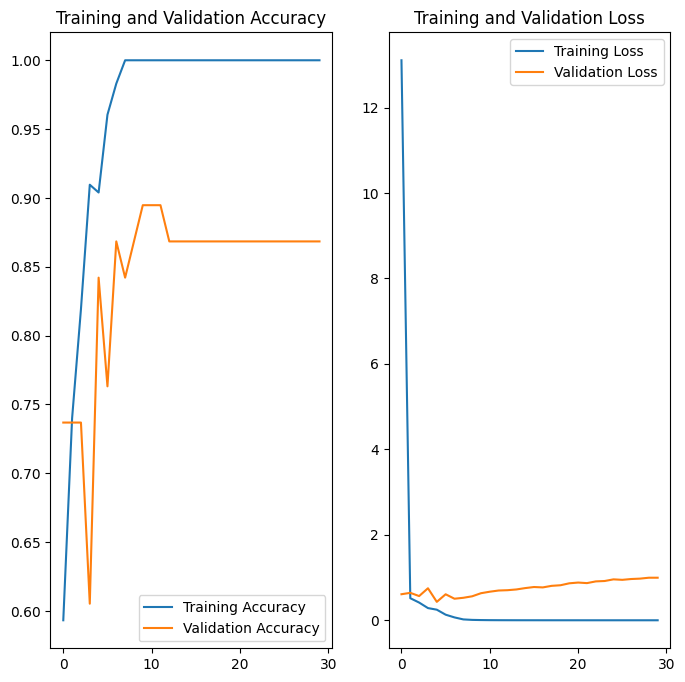

2024-04-16 00:43:33.866708: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 536ms/step
Overall Accuracy: 0.7368421052631579
Precision: 0.7727272727272727
Recall: 0.7727272727272727
F1-Score: 0.7727272727272727


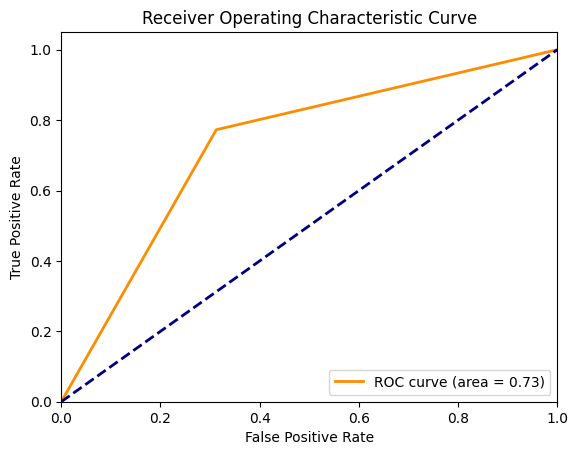

Epoch 1/30


2024-04-16 00:43:35.356219: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 17.0254 - accuracy: 0.5593

2024-04-16 00:43:42.783864: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 10s 178ms/step - loss: 17.0254 - accuracy: 0.5593 - val_loss: 1.6904 - val_accuracy: 0.7368
Epoch 2/30
36/36 [==============================] - 1s 39ms/step - loss: 1.6431 - accuracy: 0.7062 - val_loss: 1.0398 - val_accuracy: 0.7632
Epoch 3/30
36/36 [==============================] - 1s 26ms/step - loss: 0.8060 - accuracy: 0.7062 - val_loss: 0.8349 - val_accuracy: 0.7895
Epoch 4/30
36/36 [==============================] - 1s 40ms/step - loss: 0.6581 - accuracy: 0.7345 - val_loss: 0.7296 - val_accuracy: 0.7895
Epoch 5/30
36/36 [==============================] - 1s 31ms/step - loss: 0.4569 - accuracy: 0.8023 - val_loss: 1.0110 - val_accuracy: 0.4737
Epoch 6/30
36/36 [==============================] - 1s 35ms/step - loss: 0.9329 - accuracy: 0.6836 - val_loss: 0.7208 - val_accuracy: 0.7632
Epoch 7/30
36/36 [==============================] - 2s 42ms/step - loss: 0.3974 - accuracy: 0.8136 - val_loss: 0.8684 - val_accuracy: 0.7895
Epoch 8/30
36/36 [===

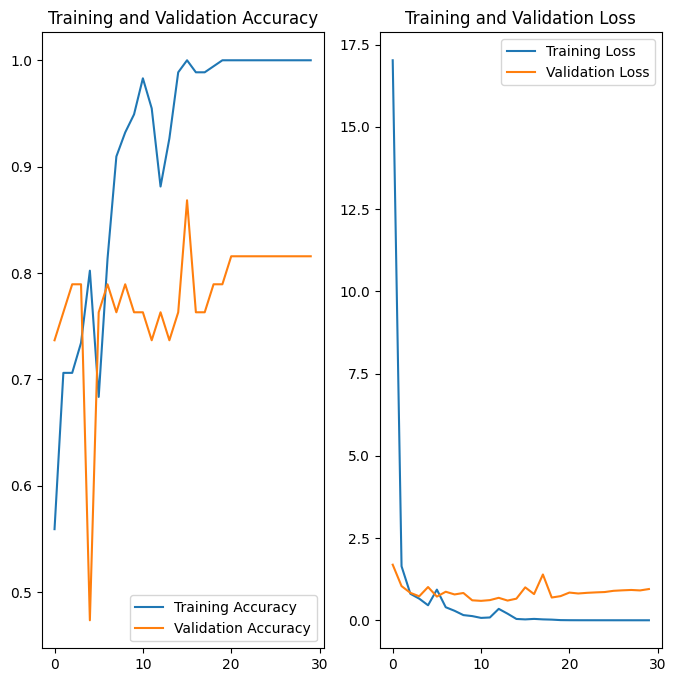

2024-04-16 00:44:14.692460: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 528ms/step
Overall Accuracy: 0.6842105263157895
Precision: 0.7083333333333334
Recall: 0.7727272727272727
F1-Score: 0.7391304347826088


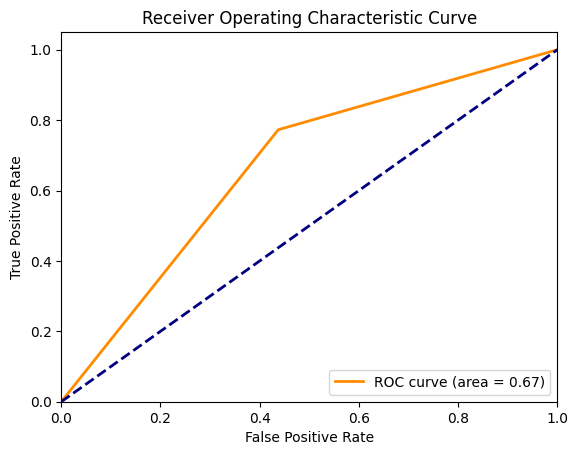

Epoch 1/30


2024-04-16 00:44:16.503373: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 15.6162 - accuracy: 0.5367

2024-04-16 00:44:22.741218: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 8s 156ms/step - loss: 15.6162 - accuracy: 0.5367 - val_loss: 0.5995 - val_accuracy: 0.6579
Epoch 2/30
36/36 [==============================] - 1s 34ms/step - loss: 0.4828 - accuracy: 0.7684 - val_loss: 0.5971 - val_accuracy: 0.7632
Epoch 3/30
36/36 [==============================] - 1s 35ms/step - loss: 0.4352 - accuracy: 0.8249 - val_loss: 0.5841 - val_accuracy: 0.7368
Epoch 4/30
36/36 [==============================] - 1s 40ms/step - loss: 0.3500 - accuracy: 0.8475 - val_loss: 0.6449 - val_accuracy: 0.6053
Epoch 5/30
36/36 [==============================] - 1s 35ms/step - loss: 0.3015 - accuracy: 0.8814 - val_loss: 0.5781 - val_accuracy: 0.6842
Epoch 6/30
36/36 [==============================] - 2s 50ms/step - loss: 0.1902 - accuracy: 0.9548 - val_loss: 0.3995 - val_accuracy: 0.8421
Epoch 7/30
36/36 [==============================] - 1s 26ms/step - loss: 0.1117 - accuracy: 0.9774 - val_loss: 0.3977 - val_accuracy: 0.7895
Epoch 8/30
36/36 [====

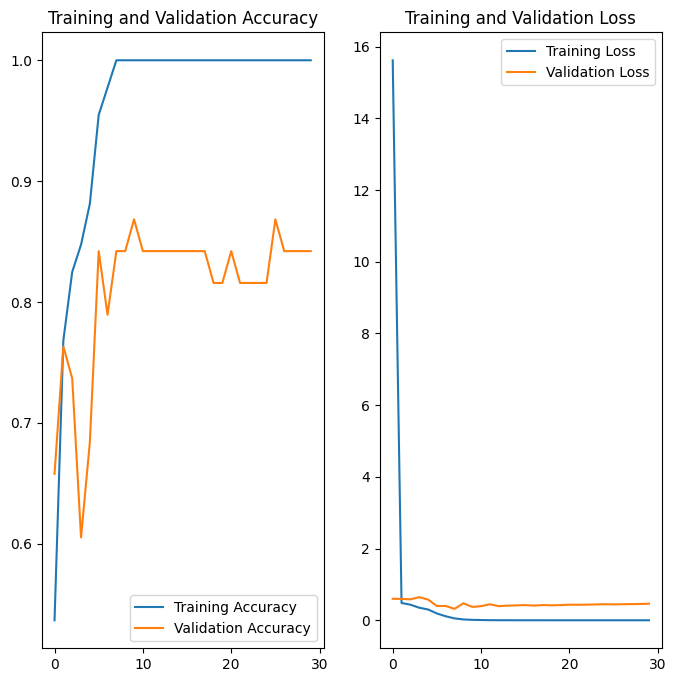

2024-04-16 00:44:55.132635: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 542ms/step
Overall Accuracy: 0.7105263157894737
Precision: 0.7391304347826086
Recall: 0.7727272727272727
F1-Score: 0.7555555555555555


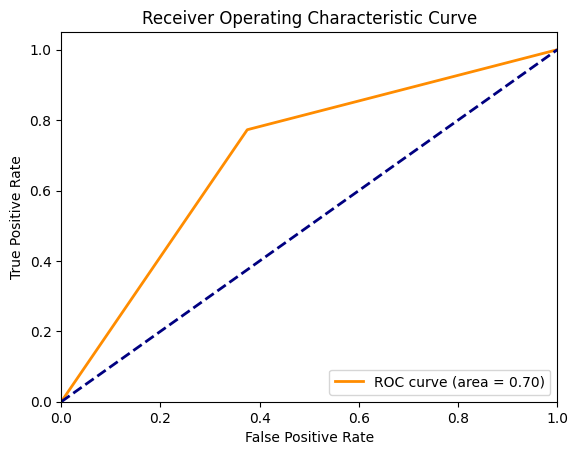

Epoch 1/30


2024-04-16 00:44:56.905263: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 9.9845 - accuracy: 0.6045 

2024-04-16 00:45:04.267349: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 10s 186ms/step - loss: 9.9845 - accuracy: 0.6045 - val_loss: 0.7357 - val_accuracy: 0.7632
Epoch 2/30
36/36 [==============================] - 1s 41ms/step - loss: 0.5070 - accuracy: 0.7571 - val_loss: 0.5425 - val_accuracy: 0.7368
Epoch 3/30
36/36 [==============================] - 1s 41ms/step - loss: 0.4403 - accuracy: 0.7910 - val_loss: 0.4769 - val_accuracy: 0.7895
Epoch 4/30
36/36 [==============================] - 1s 36ms/step - loss: 0.3985 - accuracy: 0.8305 - val_loss: 0.5137 - val_accuracy: 0.7632
Epoch 5/30
36/36 [==============================] - 1s 29ms/step - loss: 0.3444 - accuracy: 0.8757 - val_loss: 0.5893 - val_accuracy: 0.7632
Epoch 6/30
36/36 [==============================] - 2s 50ms/step - loss: 0.3499 - accuracy: 0.8362 - val_loss: 0.4858 - val_accuracy: 0.7895
Epoch 7/30
36/36 [==============================] - 1s 33ms/step - loss: 0.2742 - accuracy: 0.9040 - val_loss: 0.4680 - val_accuracy: 0.7895
Epoch 8/30
36/36 [====

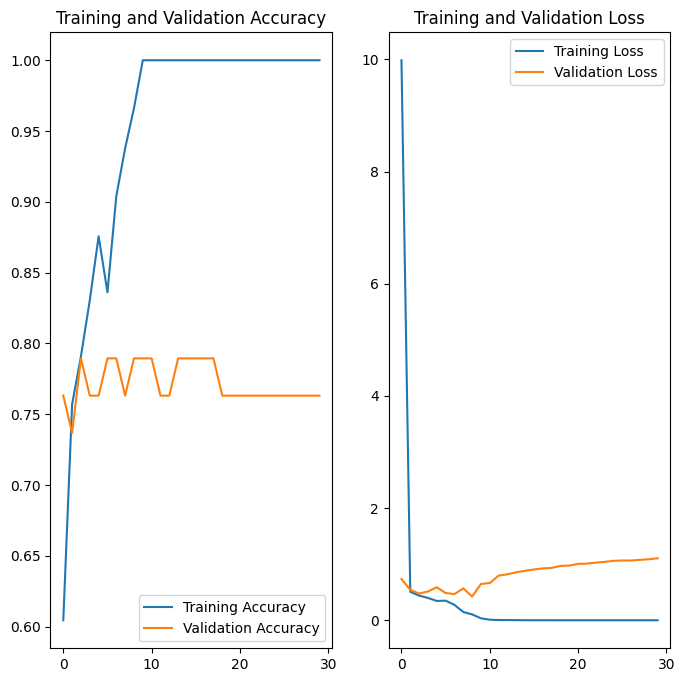

2024-04-16 00:45:36.679044: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 496ms/step
Overall Accuracy: 0.7631578947368421
Precision: 0.782608695652174
Recall: 0.8181818181818182
F1-Score: 0.8


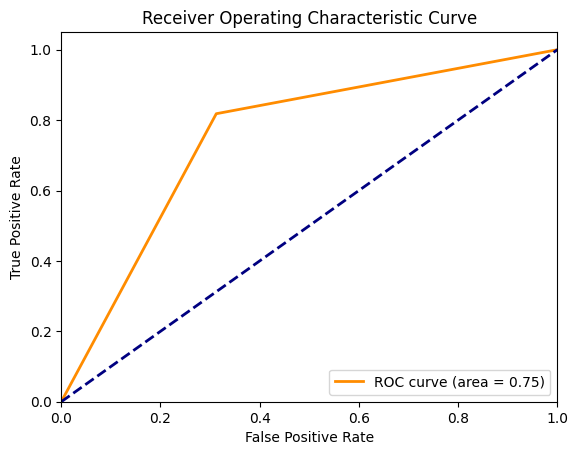

Epoch 1/30


2024-04-16 00:45:38.387225: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 26.7474 - accuracy: 0.6102

2024-04-16 00:45:45.713204: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 9s 180ms/step - loss: 26.7474 - accuracy: 0.6102 - val_loss: 6.3923 - val_accuracy: 0.5526
Epoch 2/30
36/36 [==============================] - 2s 65ms/step - loss: 5.4191 - accuracy: 0.6723 - val_loss: 3.5134 - val_accuracy: 0.7632
Epoch 3/30
36/36 [==============================] - 2s 48ms/step - loss: 2.4455 - accuracy: 0.7684 - val_loss: 2.6631 - val_accuracy: 0.7368
Epoch 4/30
36/36 [==============================] - 1s 31ms/step - loss: 1.3079 - accuracy: 0.7514 - val_loss: 1.7825 - val_accuracy: 0.7368
Epoch 5/30
36/36 [==============================] - 1s 36ms/step - loss: 0.4533 - accuracy: 0.8588 - val_loss: 2.5622 - val_accuracy: 0.6842
Epoch 6/30
36/36 [==============================] - 1s 34ms/step - loss: 0.7121 - accuracy: 0.8079 - val_loss: 2.4756 - val_accuracy: 0.6053
Epoch 7/30
36/36 [==============================] - 1s 28ms/step - loss: 0.2565 - accuracy: 0.8983 - val_loss: 1.0953 - val_accuracy: 0.7632
Epoch 8/30
36/36 [====

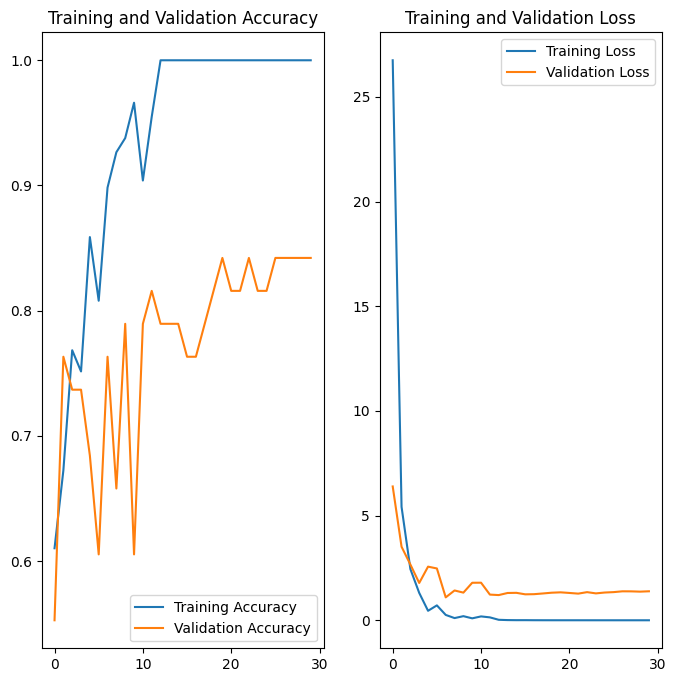

2024-04-16 00:46:18.260772: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 472ms/step
Overall Accuracy: 0.7631578947368421
Precision: 0.76
Recall: 0.8636363636363636
F1-Score: 0.8085106382978724


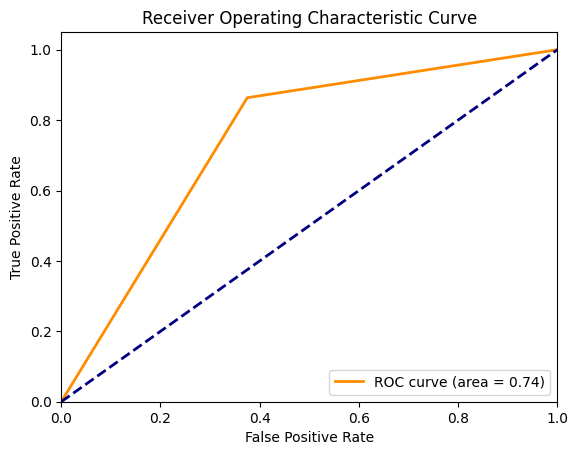

In [64]:
for i in range(5):
    # MODELING
    x = layers.Input(shape=(target_height, target_width, 1)) #input_shape = (height, width, channel)
    y = layers.DepthwiseConv2D(kernel_size=(3,3), strides=(1,1), padding='valid', depth_multiplier=1)(x)
    y = layers.Conv2D(8, (5,5), padding='same')(x)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block_adj(y, 8, 16)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block_adj(y, 16, 32)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block_adj(y, 32, 64)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block_adj(y, 64, 128)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block_adj(y, 128, 256)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = layers.Flatten()(y)
    y = layers.Dense(100, activation='relu')(y)
    y = layers.Dense(1, activation='sigmoid')(y)

    model_5 = tf.keras.Model(x,y)
    model_5._name = 'Model_5'
    
    if i == 0:
        model_5.summary()

    # COMPILING
    model_5.compile(optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
                    loss = 'binary_crossentropy',
                    metrics = 'accuracy')
    
    # TRAINING
    epochs = 30
    history = model_5.fit(x = X_train, y = y_train,
                          batch_size=5,
                          epochs = epochs,
                          validation_data = (X_val, y_val))

    # SHOWING RESULTS
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

    # PREDICTING
    pred_prob = model_5.predict(X_test)
    y_pred = np.where(pred_prob > 0.5, 1, 0)

    # Compute overall accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Overall Accuracy:", accuracy)

    # Compute precision
    precision = precision_score(y_test, y_pred)
    print("Precision:", precision)

    # Compute recall
    recall = recall_score(y_test, y_pred)
    print("Recall:", recall)

    # Compute F1-score
    f1 = f1_score(y_test, y_pred)
    print("F1-Score:", f1)

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()
    #del model_5
    #del history


Model: "Model_2_CD"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_85 (InputLayer)       [(None, 400, 400, 1)]        0         []                            
                                                                                                  
 conv2d_696 (Conv2D)         (None, 400, 400, 8)          80        ['input_85[0][0]']            
                                                                                                  
 max_pooling2d_359 (MaxPool  (None, 200, 200, 8)          0         ['conv2d_696[0][0]']          
 ing2D)                                                                                           
                                                                                                  
 conv2d_697 (Conv2D)         (None, 200, 200, 16)         1168      ['max_pooling2d_359[0

2024-04-16 01:29:17.220425: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 22.1047 - accuracy: 0.6723

2024-04-16 01:29:22.892823: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 7s 124ms/step - loss: 22.1047 - accuracy: 0.6723 - val_loss: 1.5983 - val_accuracy: 0.8158 - lr: 0.0010
Epoch 2/30
36/36 [==============================] - 1s 36ms/step - loss: 0.6345 - accuracy: 0.8079 - val_loss: 0.6776 - val_accuracy: 0.8421 - lr: 9.9726e-04
Epoch 3/30
36/36 [==============================] - 1s 28ms/step - loss: 0.2266 - accuracy: 0.8983 - val_loss: 0.4573 - val_accuracy: 0.8421 - lr: 9.8907e-04
Epoch 4/30
36/36 [==============================] - 1s 26ms/step - loss: 0.1177 - accuracy: 0.9661 - val_loss: 0.5230 - val_accuracy: 0.8421 - lr: 9.7553e-04
Epoch 5/30
36/36 [==============================] - 1s 23ms/step - loss: 0.1088 - accuracy: 0.9718 - val_loss: 0.6263 - val_accuracy: 0.7632 - lr: 9.5677e-04
Epoch 6/30
36/36 [==============================] - 1s 22ms/step - loss: 0.0225 - accuracy: 1.0000 - val_loss: 0.3474 - val_accuracy: 0.8684 - lr: 9.3301e-04
Epoch 7/30
36/36 [==============================] - 1s 19ms/step 

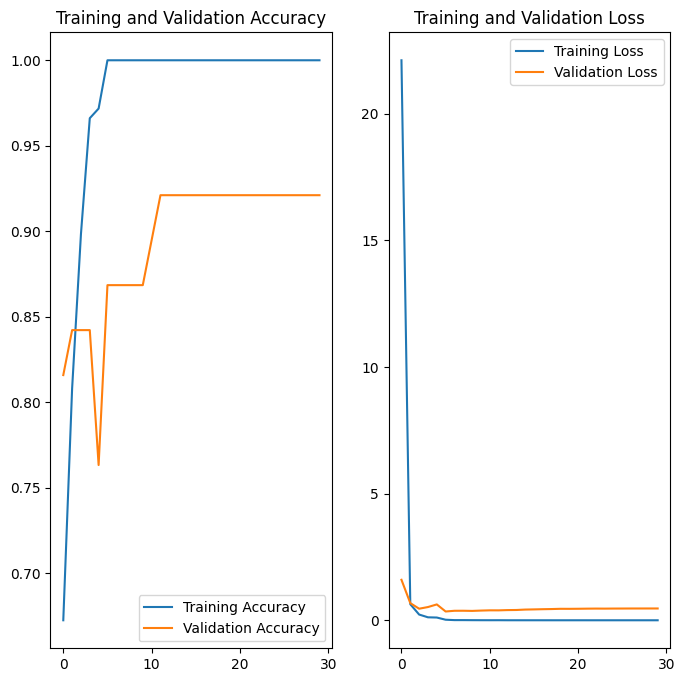

2024-04-16 01:29:46.912559: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 157ms/step
Overall Accuracy: 0.7894736842105263
Precision: 0.8235294117647058
Recall: 0.7368421052631579
F1-Score: 0.7777777777777778


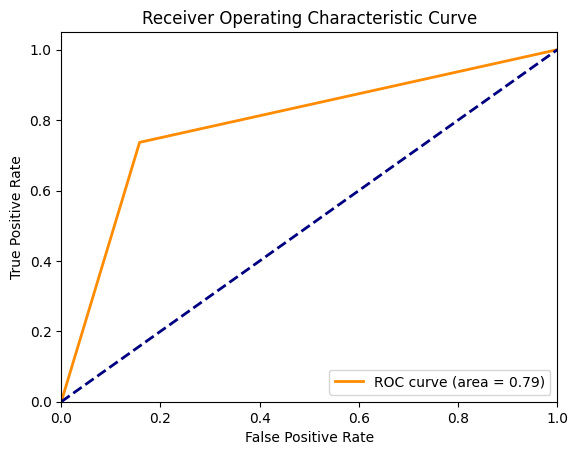

Epoch 1/30


2024-04-16 01:29:47.811433: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 360.0464 - accuracy: 0.4802

2024-04-16 01:29:52.875709: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 6s 122ms/step - loss: 360.0464 - accuracy: 0.4802 - val_loss: 139.9664 - val_accuracy: 0.5789 - lr: 0.0010
Epoch 2/30
36/36 [==============================] - 1s 35ms/step - loss: 80.5844 - accuracy: 0.6949 - val_loss: 43.0944 - val_accuracy: 0.8684 - lr: 9.9726e-04
Epoch 3/30
36/36 [==============================] - 1s 33ms/step - loss: 35.7898 - accuracy: 0.7684 - val_loss: 31.2180 - val_accuracy: 0.7368 - lr: 9.8907e-04
Epoch 4/30
36/36 [==============================] - 1s 22ms/step - loss: 29.5246 - accuracy: 0.7910 - val_loss: 15.5903 - val_accuracy: 0.7895 - lr: 9.7553e-04
Epoch 5/30
36/36 [==============================] - 1s 27ms/step - loss: 42.7663 - accuracy: 0.7514 - val_loss: 26.3415 - val_accuracy: 0.7895 - lr: 9.5677e-04
Epoch 6/30
36/36 [==============================] - 1s 23ms/step - loss: 24.9333 - accuracy: 0.8136 - val_loss: 29.0112 - val_accuracy: 0.8421 - lr: 9.3301e-04
Epoch 7/30
36/36 [==============================] - 

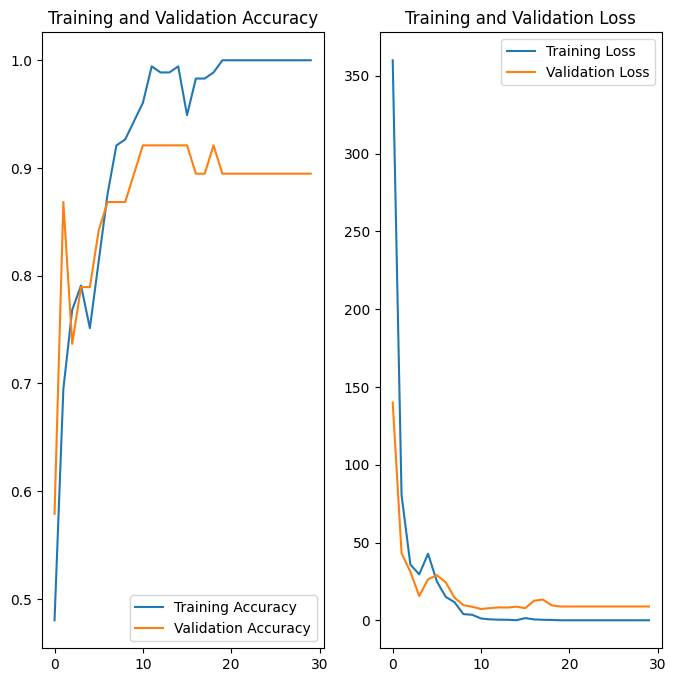

2024-04-16 01:30:17.818965: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 375ms/step
Overall Accuracy: 0.7368421052631579
Precision: 0.8461538461538461
Recall: 0.5789473684210527
F1-Score: 0.6875


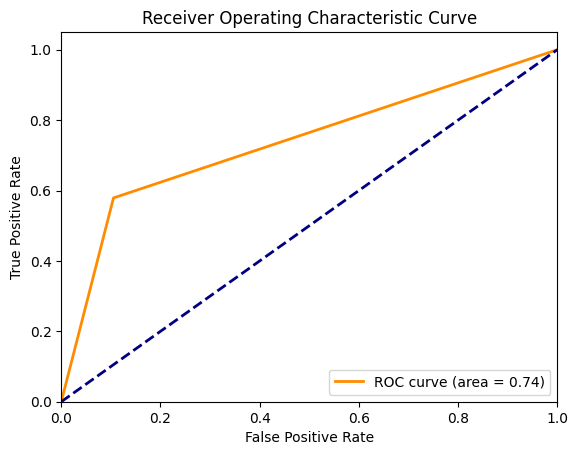

Epoch 1/30


2024-04-16 01:30:20.562693: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 98.7390 - accuracy: 0.5593

2024-04-16 01:30:26.716062: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 8s 149ms/step - loss: 98.7390 - accuracy: 0.5593 - val_loss: 2.5035 - val_accuracy: 0.7632 - lr: 0.0010
Epoch 2/30
36/36 [==============================] - 1s 31ms/step - loss: 3.4905 - accuracy: 0.5989 - val_loss: 1.0805 - val_accuracy: 0.7895 - lr: 9.9726e-04
Epoch 3/30
36/36 [==============================] - 1s 28ms/step - loss: 1.4054 - accuracy: 0.7288 - val_loss: 0.4650 - val_accuracy: 0.8684 - lr: 9.8907e-04
Epoch 4/30
36/36 [==============================] - 1s 25ms/step - loss: 0.8549 - accuracy: 0.7514 - val_loss: 1.2435 - val_accuracy: 0.7105 - lr: 9.7553e-04
Epoch 5/30
36/36 [==============================] - 1s 30ms/step - loss: 1.3091 - accuracy: 0.7345 - val_loss: 0.4790 - val_accuracy: 0.8158 - lr: 9.5677e-04
Epoch 6/30
36/36 [==============================] - 1s 20ms/step - loss: 0.6306 - accuracy: 0.7797 - val_loss: 0.5383 - val_accuracy: 0.7368 - lr: 9.3301e-04
Epoch 7/30
36/36 [==============================] - 1s 28ms/step 

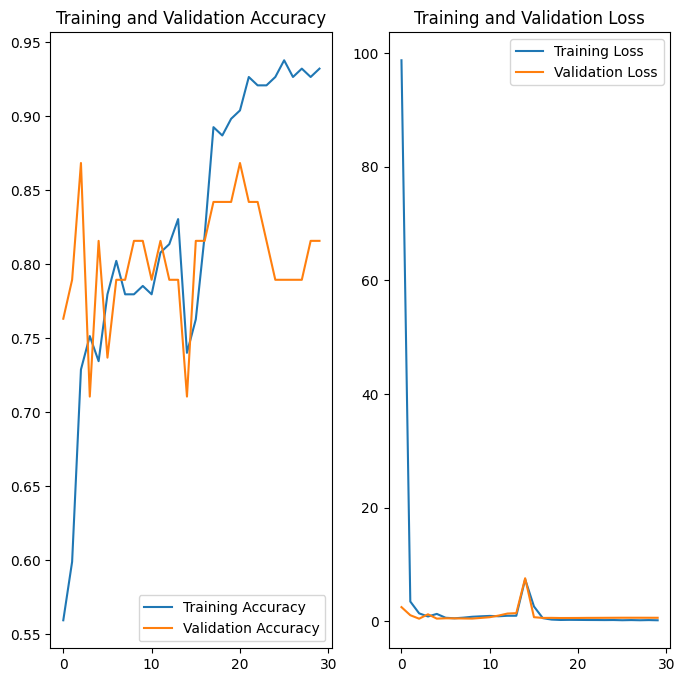

2024-04-16 01:30:51.641659: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 276ms/step
Overall Accuracy: 0.7105263157894737
Precision: 0.6818181818181818
Recall: 0.7894736842105263
F1-Score: 0.7317073170731707


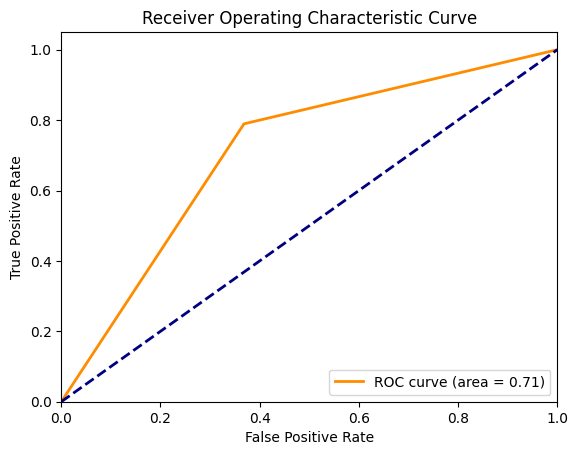

Epoch 1/30


2024-04-16 01:30:52.615530: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 139.2270 - accuracy: 0.5480

2024-04-16 01:30:58.298962: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 7s 143ms/step - loss: 139.2270 - accuracy: 0.5480 - val_loss: 20.6902 - val_accuracy: 0.3684 - lr: 0.0010
Epoch 2/30
36/36 [==============================] - 1s 37ms/step - loss: 5.9368 - accuracy: 0.6893 - val_loss: 4.4249 - val_accuracy: 0.7632 - lr: 9.9726e-04
Epoch 3/30
36/36 [==============================] - 1s 38ms/step - loss: 1.7568 - accuracy: 0.8305 - val_loss: 2.4714 - val_accuracy: 0.7368 - lr: 9.8907e-04
Epoch 4/30
36/36 [==============================] - 1s 27ms/step - loss: 1.6038 - accuracy: 0.8192 - val_loss: 7.8403 - val_accuracy: 0.6316 - lr: 9.7553e-04
Epoch 5/30
36/36 [==============================] - 1s 23ms/step - loss: 8.4625 - accuracy: 0.6949 - val_loss: 13.3434 - val_accuracy: 0.6053 - lr: 9.5677e-04
Epoch 6/30
36/36 [==============================] - 1s 27ms/step - loss: 3.0730 - accuracy: 0.8475 - val_loss: 4.6454 - val_accuracy: 0.7368 - lr: 9.3301e-04
Epoch 7/30
36/36 [==============================] - 1s 19ms/st

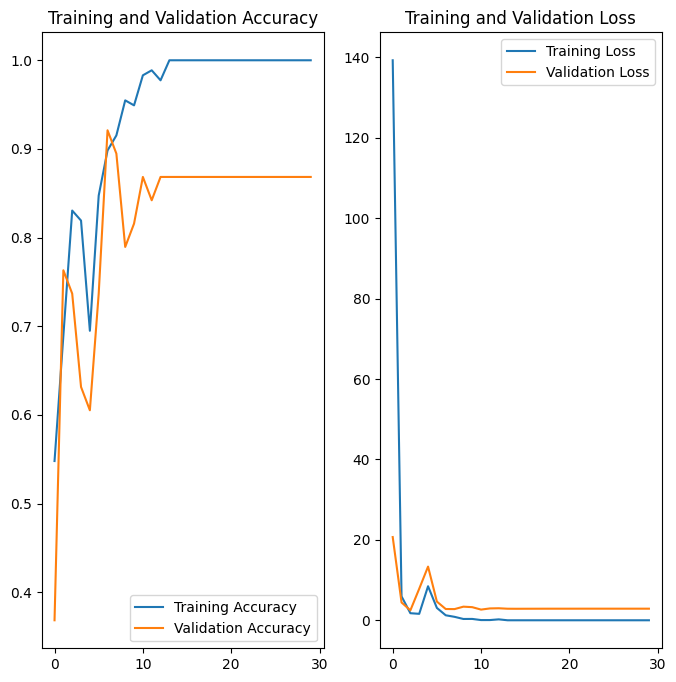

2024-04-16 01:31:23.067364: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 254ms/step
Overall Accuracy: 0.7105263157894737
Precision: 0.7222222222222222
Recall: 0.6842105263157895
F1-Score: 0.7027027027027027


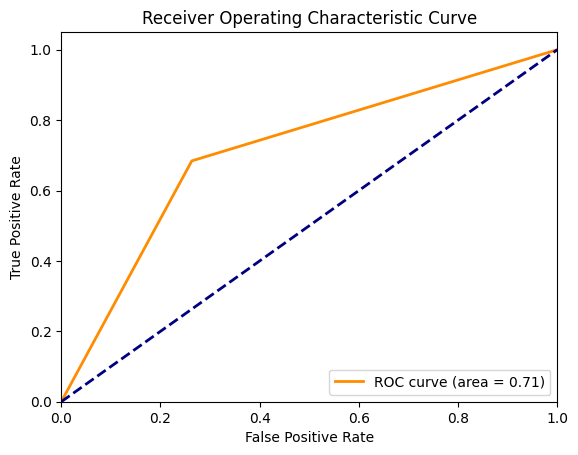

Epoch 1/30


2024-04-16 01:31:24.055507: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 148.3100 - accuracy: 0.5932

2024-04-16 01:31:29.930892: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 8s 154ms/step - loss: 148.3100 - accuracy: 0.5932 - val_loss: 3.8776 - val_accuracy: 0.8158 - lr: 0.0010
Epoch 2/30
36/36 [==============================] - 1s 40ms/step - loss: 2.4899 - accuracy: 0.7740 - val_loss: 0.8491 - val_accuracy: 0.7632 - lr: 9.9726e-04
Epoch 3/30
36/36 [==============================] - 1s 23ms/step - loss: 1.3595 - accuracy: 0.7458 - val_loss: 0.8866 - val_accuracy: 0.7368 - lr: 9.8907e-04
Epoch 4/30
36/36 [==============================] - 1s 28ms/step - loss: 0.9299 - accuracy: 0.7797 - val_loss: 0.8896 - val_accuracy: 0.7368 - lr: 9.7553e-04
Epoch 5/30
36/36 [==============================] - 1s 23ms/step - loss: 0.6669 - accuracy: 0.8362 - val_loss: 0.7652 - val_accuracy: 0.8684 - lr: 9.5677e-04
Epoch 6/30
36/36 [==============================] - 1s 27ms/step - loss: 0.3265 - accuracy: 0.8927 - val_loss: 0.7084 - val_accuracy: 0.8158 - lr: 9.3301e-04
Epoch 7/30
36/36 [==============================] - 1s 20ms/step

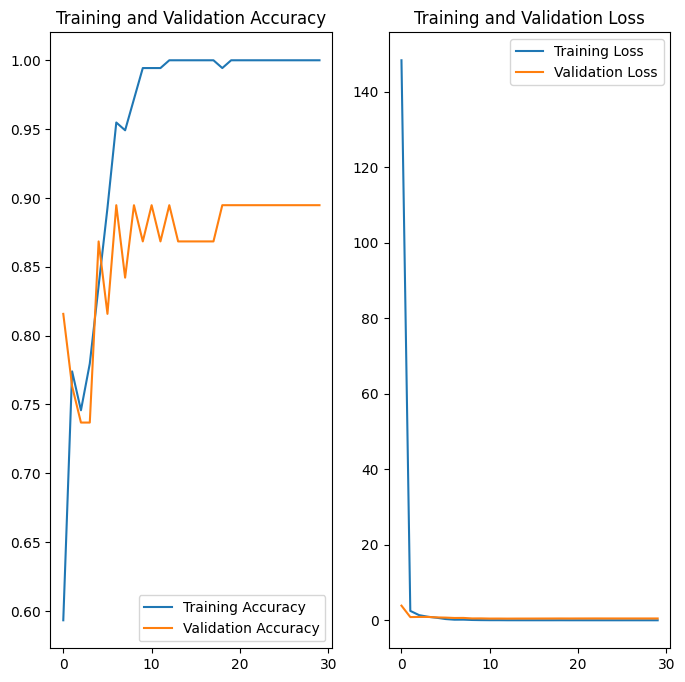

1/2 [==============>...............] - ETA: 0s

2024-04-16 01:31:55.004858: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 324ms/step
Overall Accuracy: 0.7894736842105263
Precision: 0.7894736842105263
Recall: 0.7894736842105263
F1-Score: 0.7894736842105263


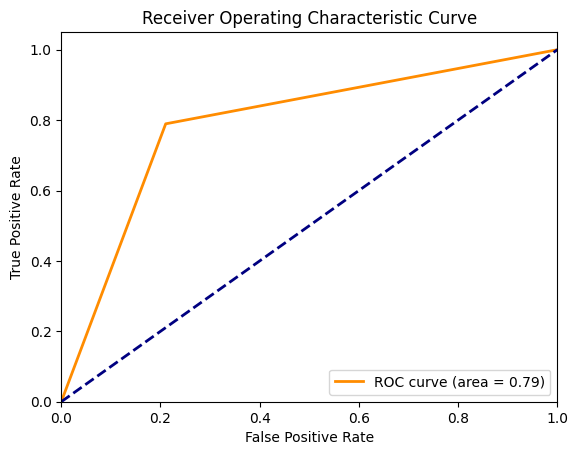

In [83]:
for i in range(5):
    # MODELING
    x = layers.Input(shape=(target_height, target_width, 1)) #input_shape = (height, width, channel)
    y = layers.DepthwiseConv2D(3, strides=(1,1), padding='valid', depth_multiplier=1)(x)

    y = layers.Conv2D(8, (3,3), padding='same')(x)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = layers.Conv2D(16, (3,3), padding='same')(y)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = layers.Conv2D(32, (3,3), padding='same')(y)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block(y, 32)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = layers.Flatten()(y)
    y = layers.Dense(50, activation='relu')(y)
    y = layers.Dense(1, activation='sigmoid')(y)

    model_2_CD = tf.keras.Model(x,y)
    model_2_CD._name = 'Model_2_CD'
    
    if i == 0:
        model_2_CD.summary()

    # COMPILING
    model_2_CD.compile(optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
                    loss = 'binary_crossentropy',
                    metrics = 'accuracy')
    
    # SCHEDULER
    lr_scheduler = LearningRateScheduler(tf.keras.optimizers.schedules.CosineDecay(
        initial_learning_rate = 0.001,
        decay_steps = 30,
        alpha=0.0,
        name='CosineDecay',
        warmup_target=None,
        warmup_steps=5
        ))
    
    # TRAINING
    epochs = 30
    history = model_2_CD.fit(x = X_train, y = y_train,
                          batch_size=5,
                          epochs = epochs,
                          validation_data = (X_val, y_val),
                          callbacks=[lr_scheduler])

    # SHOWING RESULTS
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

    # PREDICTING
    pred_prob = model_2_CD.predict(X_test)
    y_pred = np.where(pred_prob > 0.5, 1, 0)

    # Compute overall accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Overall Accuracy:", accuracy)

    # Compute precision
    precision = precision_score(y_test, y_pred)
    print("Precision:", precision)

    # Compute recall
    recall = recall_score(y_test, y_pred)
    print("Recall:", recall)

    # Compute F1-score
    f1 = f1_score(y_test, y_pred)
    print("F1-Score:", f1)

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()
    #del model_2_CD
    #del history


Model: "Model_2_RLR"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 400, 400, 1)]        0         []                            
                                                                                                  
 conv2d_5 (Conv2D)           (None, 400, 400, 8)          80        ['input_2[0][0]']             
                                                                                                  
 max_pooling2d_4 (MaxPoolin  (None, 200, 200, 8)          0         ['conv2d_5[0][0]']            
 g2D)                                                                                             
                                                                                                  
 conv2d_6 (Conv2D)           (None, 200, 200, 16)         1168      ['max_pooling2d_4[0]

2024-04-16 11:15:06.132014: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 72.2110 - accuracy: 0.6158

2024-04-16 11:15:07.327911: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 2s 33ms/step - loss: 72.2110 - accuracy: 0.6158 - val_loss: 6.9989 - val_accuracy: 0.6053 - lr: 0.0010
Epoch 2/30
36/36 [==============================] - 1s 19ms/step - loss: 1.6977 - accuracy: 0.7797 - val_loss: 2.0315 - val_accuracy: 0.7632 - lr: 0.0010
Epoch 3/30
36/36 [==============================] - 1s 19ms/step - loss: 0.3135 - accuracy: 0.8814 - val_loss: 2.6922 - val_accuracy: 0.7368 - lr: 0.0010
Epoch 4/30
36/36 [==============================] - 1s 19ms/step - loss: 0.4425 - accuracy: 0.8927 - val_loss: 2.1646 - val_accuracy: 0.8158 - lr: 0.0010
Epoch 5/30
36/36 [==============================] - 1s 18ms/step - loss: 0.5316 - accuracy: 0.8588 - val_loss: 1.4036 - val_accuracy: 0.8684 - lr: 0.0010
Epoch 6/30
36/36 [==============================] - 1s 18ms/step - loss: 0.2164 - accuracy: 0.9209 - val_loss: 1.2317 - val_accuracy: 0.8947 - lr: 0.0010
Epoch 7/30
36/36 [==============================] - 1s 19ms/step - loss: 0.1023 - accu

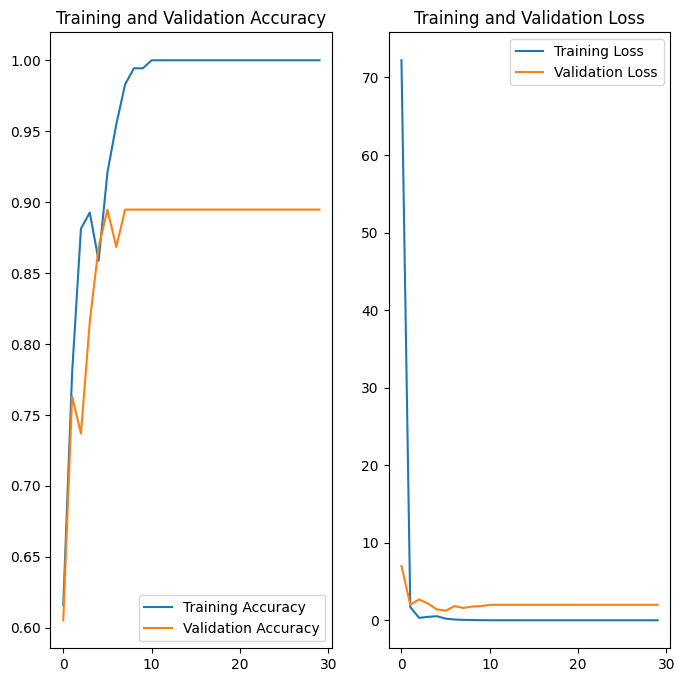

2/2 [==============================] - 0s 38ms/step
Overall Accuracy: 0.8157894736842105
Precision: 0.9
Recall: 0.782608695652174
F1-Score: 0.8372093023255814


2024-04-16 11:15:27.033715: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


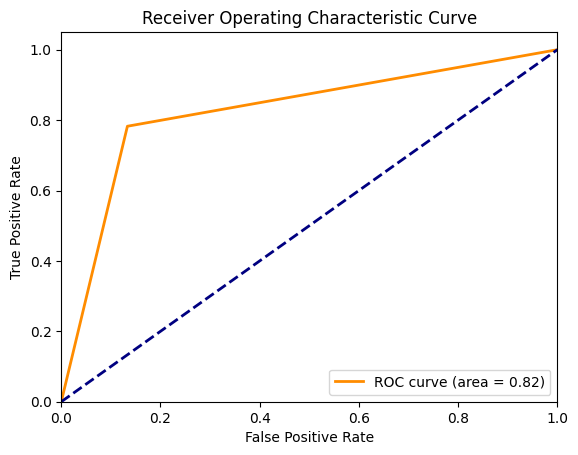

Epoch 1/30


2024-04-16 11:15:27.487273: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 1s 29ms/step - loss: 101.8997 - accuracy: 0.6780 - val_loss: 4.5623 - val_accuracy: 0.8684 - lr: 0.0010
Epoch 2/30


2024-04-16 11:15:28.548295: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 1s 19ms/step - loss: 5.1105 - accuracy: 0.7345 - val_loss: 4.9000 - val_accuracy: 0.7368 - lr: 0.0010
Epoch 3/30
36/36 [==============================] - 1s 18ms/step - loss: 2.6056 - accuracy: 0.7910 - val_loss: 2.6137 - val_accuracy: 0.8158 - lr: 0.0010
Epoch 4/30
36/36 [==============================] - 1s 19ms/step - loss: 0.7302 - accuracy: 0.8757 - val_loss: 2.8541 - val_accuracy: 0.7368 - lr: 0.0010
Epoch 5/30
36/36 [==============================] - 1s 18ms/step - loss: 0.1700 - accuracy: 0.9492 - val_loss: 2.6322 - val_accuracy: 0.8947 - lr: 0.0010
Epoch 6/30
36/36 [==============================] - 1s 18ms/step - loss: 0.1686 - accuracy: 0.9605 - val_loss: 3.1552 - val_accuracy: 0.7895 - lr: 0.0010
Epoch 7/30
36/36 [==============================] - 1s 18ms/step - loss: 0.0793 - accuracy: 0.9718 - val_loss: 2.7642 - val_accuracy: 0.8947 - lr: 0.0010
Epoch 8/30
36/36 [==============================] - 1s 18ms/step - loss: 0.1807 - accur

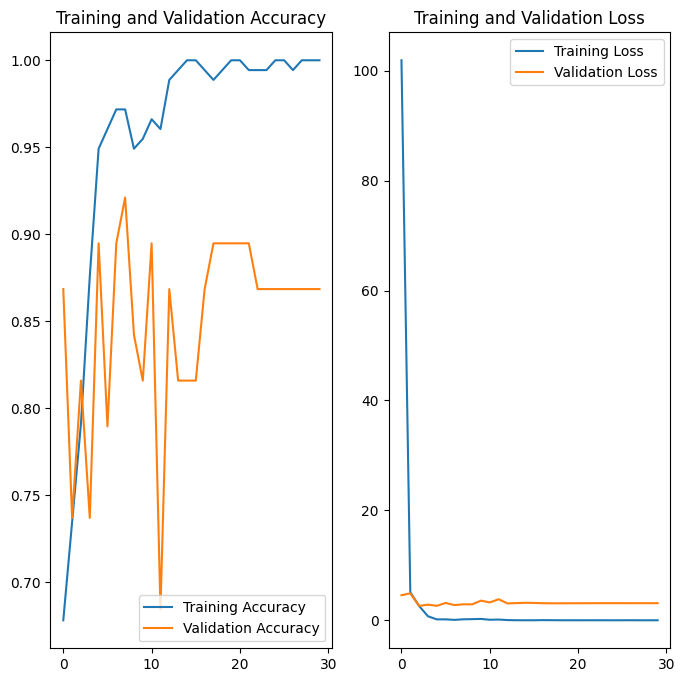

2/2 [==============================] - 0s 30ms/step
Overall Accuracy: 0.8157894736842105
Precision: 0.9
Recall: 0.782608695652174
F1-Score: 0.8372093023255814


2024-04-16 11:15:47.920028: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


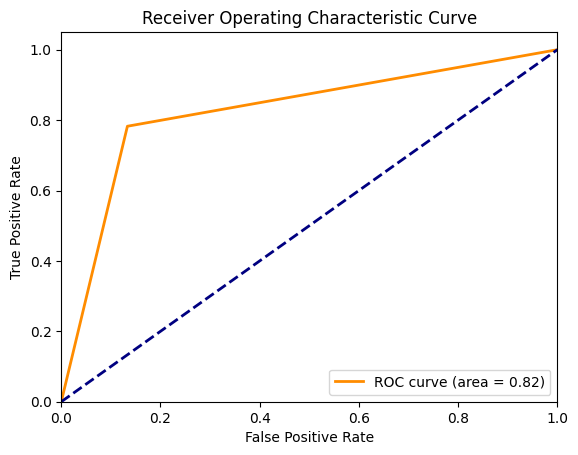

Epoch 1/30


2024-04-16 11:15:48.343749: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 119.3171 - accuracy: 0.5141

2024-04-16 11:15:49.463655: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 2s 30ms/step - loss: 119.3171 - accuracy: 0.5141 - val_loss: 3.0745 - val_accuracy: 0.7105 - lr: 0.0010
Epoch 2/30
36/36 [==============================] - 1s 20ms/step - loss: 1.8088 - accuracy: 0.6893 - val_loss: 1.0564 - val_accuracy: 0.7632 - lr: 0.0010
Epoch 3/30
36/36 [==============================] - 1s 19ms/step - loss: 1.0334 - accuracy: 0.7627 - val_loss: 2.3269 - val_accuracy: 0.6579 - lr: 0.0010
Epoch 4/30
36/36 [==============================] - 1s 19ms/step - loss: 1.6764 - accuracy: 0.7740 - val_loss: 3.0854 - val_accuracy: 0.6579 - lr: 0.0010
Epoch 5/30
36/36 [==============================] - 1s 19ms/step - loss: 1.0758 - accuracy: 0.8305 - val_loss: 8.2044 - val_accuracy: 0.5526 - lr: 0.0010
Epoch 6/30
36/36 [==============================] - 1s 20ms/step - loss: 4.5833 - accuracy: 0.6949 - val_loss: 2.8320 - val_accuracy: 0.7368 - lr: 0.0010
Epoch 7/30
36/36 [==============================] - 1s 19ms/step - loss: 1.7246 - acc

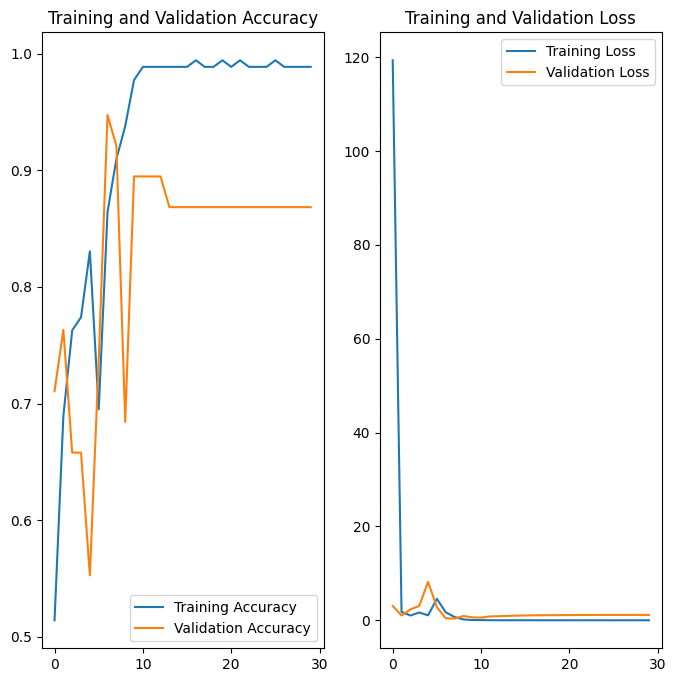

2/2 [==============================] - 0s 34ms/step
Overall Accuracy: 0.868421052631579
Precision: 0.875
Recall: 0.9130434782608695
F1-Score: 0.8936170212765957


2024-04-16 11:16:09.705855: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


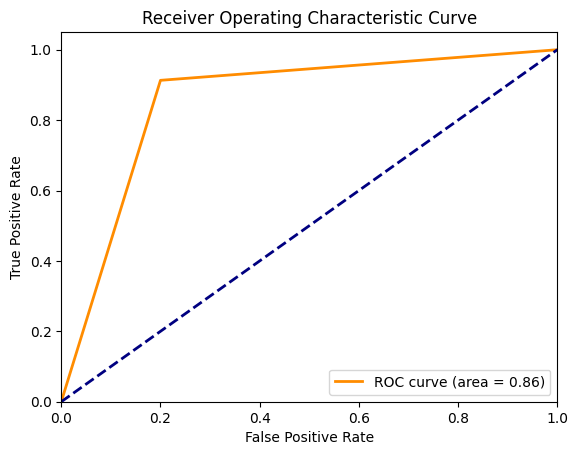

Epoch 1/30


2024-04-16 11:16:10.140798: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 133.5343 - accuracy: 0.6497

2024-04-16 11:16:11.316678: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 2s 32ms/step - loss: 133.5343 - accuracy: 0.6497 - val_loss: 4.1657 - val_accuracy: 0.8421 - lr: 0.0010
Epoch 2/30
36/36 [==============================] - 1s 19ms/step - loss: 5.0151 - accuracy: 0.7062 - val_loss: 4.6496 - val_accuracy: 0.7368 - lr: 0.0010
Epoch 3/30
36/36 [==============================] - 1s 19ms/step - loss: 23.5702 - accuracy: 0.6780 - val_loss: 8.7568 - val_accuracy: 0.8421 - lr: 0.0010
Epoch 4/30
36/36 [==============================] - 1s 19ms/step - loss: 5.3305 - accuracy: 0.7853 - val_loss: 15.5759 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 5/30
36/36 [==============================] - 1s 19ms/step - loss: 2.5025 - accuracy: 0.8418 - val_loss: 2.0682 - val_accuracy: 0.8158 - lr: 0.0010
Epoch 6/30
36/36 [==============================] - 1s 18ms/step - loss: 0.7974 - accuracy: 0.8870 - val_loss: 1.3950 - val_accuracy: 0.8947 - lr: 0.0010
Epoch 7/30
36/36 [==============================] - 1s 20ms/step - loss: 0.9521 - a

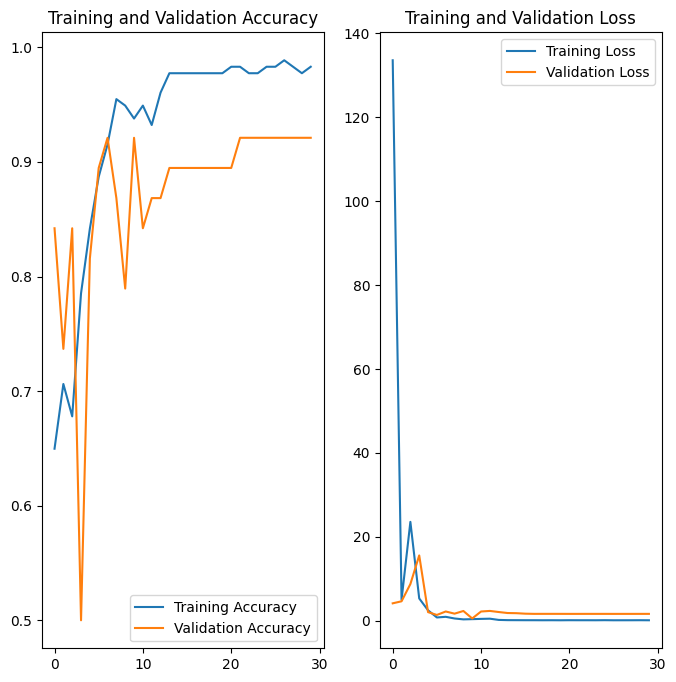

2/2 [==============================] - 0s 28ms/step
Overall Accuracy: 0.7894736842105263
Precision: 0.8571428571428571
Recall: 0.782608695652174
F1-Score: 0.8181818181818182


2024-04-16 11:16:30.855262: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


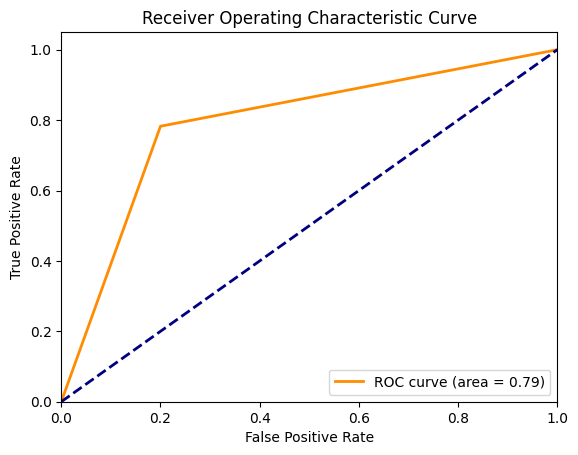

Epoch 1/30


2024-04-16 11:16:31.280615: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 99.9074 - accuracy: 0.5480 

2024-04-16 11:16:32.435570: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 2s 31ms/step - loss: 99.9074 - accuracy: 0.5480 - val_loss: 26.4442 - val_accuracy: 0.3684 - lr: 0.0010
Epoch 2/30
36/36 [==============================] - 1s 19ms/step - loss: 15.7544 - accuracy: 0.5932 - val_loss: 1.6317 - val_accuracy: 0.8158 - lr: 0.0010
Epoch 3/30
36/36 [==============================] - 1s 18ms/step - loss: 4.8334 - accuracy: 0.7288 - val_loss: 3.1021 - val_accuracy: 0.7105 - lr: 0.0010
Epoch 4/30
36/36 [==============================] - 1s 20ms/step - loss: 4.8631 - accuracy: 0.6949 - val_loss: 1.2330 - val_accuracy: 0.8421 - lr: 0.0010
Epoch 5/30
36/36 [==============================] - 1s 19ms/step - loss: 6.3083 - accuracy: 0.6893 - val_loss: 1.9118 - val_accuracy: 0.7105 - lr: 0.0010
Epoch 6/30
36/36 [==============================] - 1s 18ms/step - loss: 3.7181 - accuracy: 0.7006 - val_loss: 1.7296 - val_accuracy: 0.8158 - lr: 0.0010
Epoch 7/30
36/36 [==============================] - 1s 18ms/step - loss: 0.7134 - ac

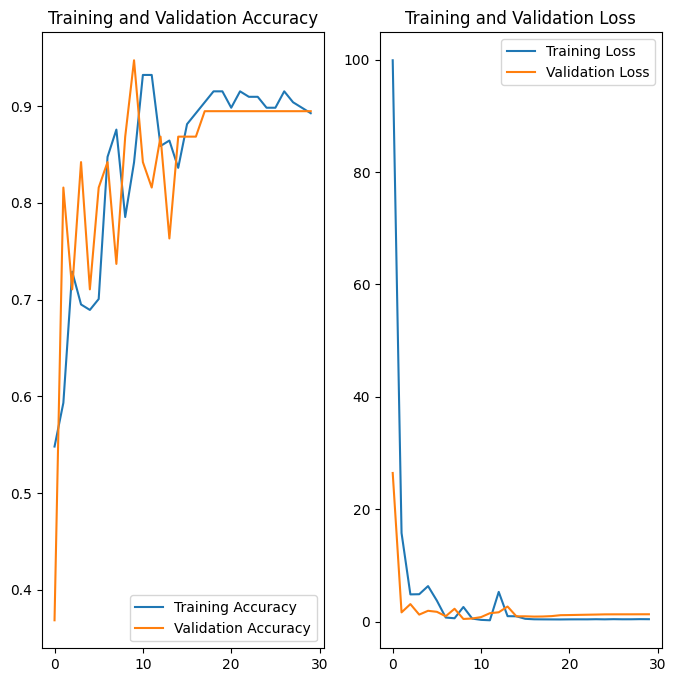

2/2 [==============================] - 0s 53ms/step
Overall Accuracy: 0.8157894736842105
Precision: 0.8076923076923077
Recall: 0.9130434782608695
F1-Score: 0.8571428571428572


2024-04-16 11:16:51.949838: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


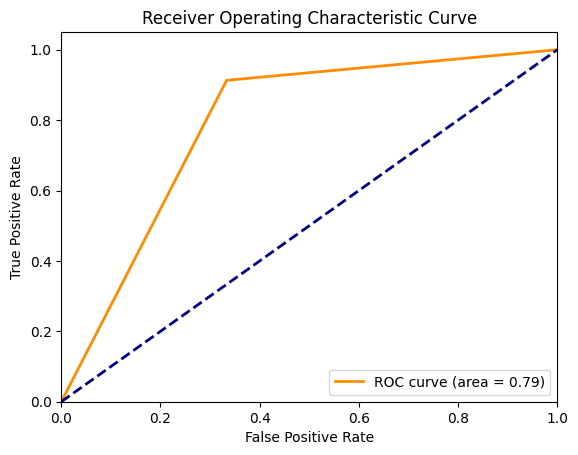

In [17]:
for i in range(5):
    # MODELING
    x = layers.Input(shape=(target_height, target_width, 1)) #input_shape = (height, width, channel)
    y = layers.DepthwiseConv2D(3, strides=(1,1), padding='valid', depth_multiplier=1)(x)

    y = layers.Conv2D(8, (3,3), padding='same')(x)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = layers.Conv2D(16, (3,3), padding='same')(y)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = layers.Conv2D(32, (3,3), padding='same')(y)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block(y, 32)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = layers.Flatten()(y)
    y = layers.Dense(50, activation='relu')(y)
    y = layers.Dense(1, activation='sigmoid')(y)

    model_2_RLR = tf.keras.Model(x,y)
    model_2_RLR._name = 'Model_2_RLR'
    
    if i == 0:
        model_2_RLR.summary()

    # COMPILING
    model_2_RLR.compile(optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
                    loss = 'binary_crossentropy',
                    metrics = 'accuracy')
    
    # SCHEDULER
    lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_accuracy',
        factor=0.1,
        patience=5,
        verbose=0,
        mode='auto',
        min_delta=0.0001,
        cooldown=0,
        min_lr=0.0,
        
    )
    
    # TRAINING
    epochs = 30
    history = model_2_RLR.fit(x = X_train, y = y_train,
                          batch_size=5,
                          epochs = epochs,
                          validation_data = (X_val, y_val),
                          callbacks=[lr_scheduler])

    # SHOWING RESULTS
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

    # PREDICTING
    pred_prob = model_2_RLR.predict(X_test)
    y_pred = np.where(pred_prob > 0.5, 1, 0)

    # Compute overall accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Overall Accuracy:", accuracy)

    # Compute precision
    precision = precision_score(y_test, y_pred)
    print("Precision:", precision)

    # Compute recall
    recall = recall_score(y_test, y_pred)
    print("Recall:", recall)

    # Compute F1-score
    f1 = f1_score(y_test, y_pred)
    print("F1-Score:", f1)

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()
    #del model_2_RLR
    #del history


Model: "Model_2_RLR_v2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_13 (InputLayer)       [(None, 400, 400, 1)]        0         []                            
                                                                                                  
 conv2d_60 (Conv2D)          (None, 400, 400, 8)          80        ['input_13[0][0]']            
                                                                                                  
 max_pooling2d_48 (MaxPooli  (None, 200, 200, 8)          0         ['conv2d_60[0][0]']           
 ng2D)                                                                                            
                                                                                                  
 conv2d_61 (Conv2D)          (None, 200, 200, 16)         1168      ['max_pooling2d_4

2024-04-16 11:28:10.162574: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 70.2641 - accuracy: 0.6780

2024-04-16 11:28:11.963429: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 2s 51ms/step - loss: 70.2641 - accuracy: 0.6780 - val_loss: 5.9132 - val_accuracy: 0.8421 - lr: 0.0010
Epoch 2/30
36/36 [==============================] - 1s 21ms/step - loss: 2.8167 - accuracy: 0.7740 - val_loss: 2.2418 - val_accuracy: 0.8684 - lr: 0.0010
Epoch 3/30
36/36 [==============================] - 1s 21ms/step - loss: 1.7776 - accuracy: 0.7910 - val_loss: 2.7508 - val_accuracy: 0.8947 - lr: 0.0010
Epoch 4/30
36/36 [==============================] - 1s 19ms/step - loss: 1.6877 - accuracy: 0.8136 - val_loss: 2.7704 - val_accuracy: 0.8947 - lr: 0.0010
Epoch 5/30
36/36 [==============================] - 1s 19ms/step - loss: 0.5294 - accuracy: 0.9435 - val_loss: 4.2406 - val_accuracy: 0.7632 - lr: 0.0010
Epoch 6/30
36/36 [==============================] - 1s 19ms/step - loss: 0.3044 - accuracy: 0.9435 - val_loss: 3.0823 - val_accuracy: 0.8684 - lr: 0.0010
Epoch 7/30
36/36 [==============================] - 1s 20ms/step - loss: 0.0119 - accu

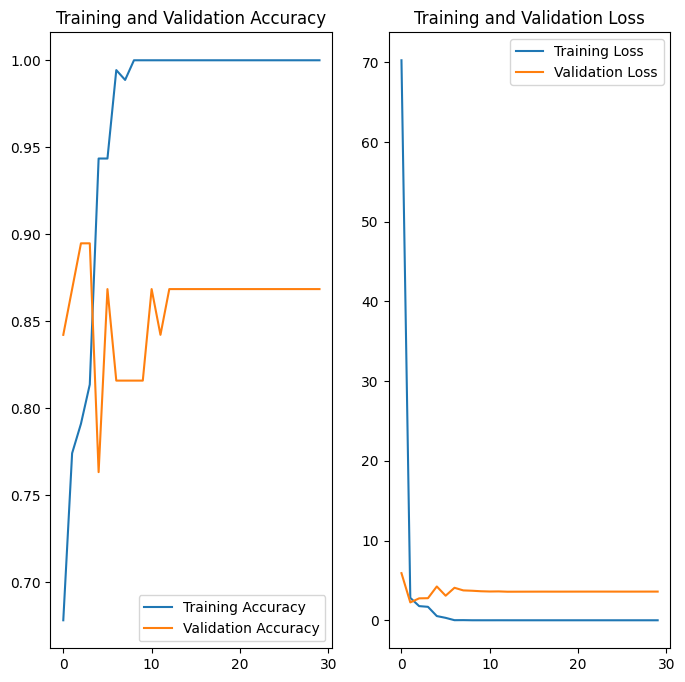

2/2 [==============================] - 0s 36ms/step
Overall Accuracy: 0.7631578947368421
Precision: 0.8888888888888888
Recall: 0.6956521739130435
F1-Score: 0.7804878048780488


2024-04-16 11:28:32.427269: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


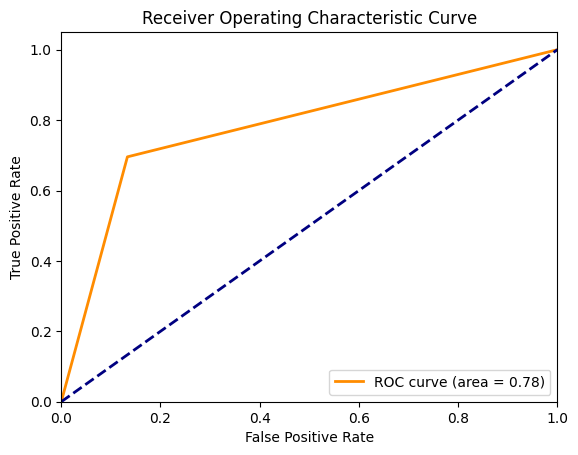

Epoch 1/30


2024-04-16 11:28:32.877677: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 106.4702 - accuracy: 0.5650

2024-04-16 11:28:34.318408: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 2s 36ms/step - loss: 106.4702 - accuracy: 0.5650 - val_loss: 18.5341 - val_accuracy: 0.7895 - lr: 0.0010
Epoch 2/30
36/36 [==============================] - 1s 21ms/step - loss: 28.6209 - accuracy: 0.6554 - val_loss: 10.0072 - val_accuracy: 0.7632 - lr: 0.0010
Epoch 3/30
36/36 [==============================] - 1s 20ms/step - loss: 8.6037 - accuracy: 0.7119 - val_loss: 5.9859 - val_accuracy: 0.8158 - lr: 0.0010
Epoch 4/30
36/36 [==============================] - 1s 20ms/step - loss: 5.1642 - accuracy: 0.7740 - val_loss: 6.7769 - val_accuracy: 0.8684 - lr: 0.0010
Epoch 5/30
36/36 [==============================] - 1s 19ms/step - loss: 2.5410 - accuracy: 0.8475 - val_loss: 5.4669 - val_accuracy: 0.9211 - lr: 0.0010
Epoch 6/30
36/36 [==============================] - 1s 19ms/step - loss: 1.6067 - accuracy: 0.8814 - val_loss: 8.2603 - val_accuracy: 0.6579 - lr: 0.0010
Epoch 7/30
36/36 [==============================] - 1s 20ms/step - loss: 3.1791 - 

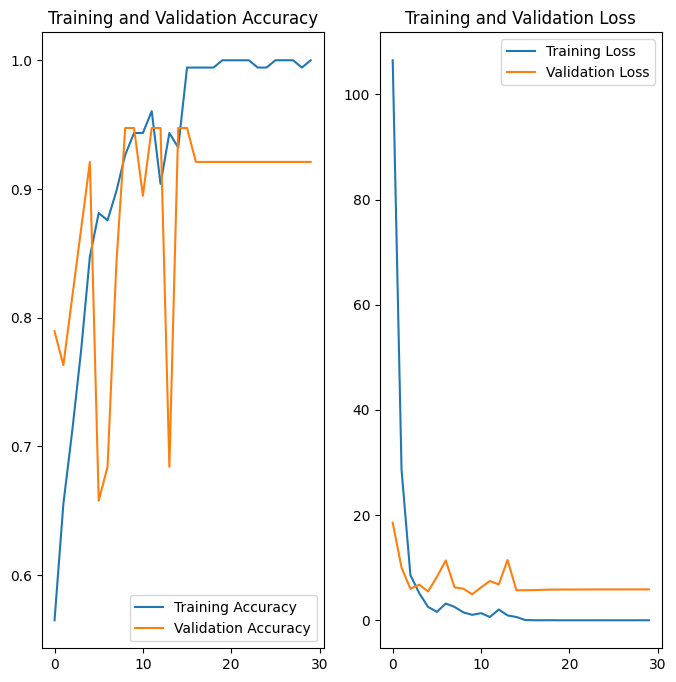

2/2 [==============================] - 0s 47ms/step
Overall Accuracy: 0.7894736842105263
Precision: 0.8947368421052632
Recall: 0.7391304347826086
F1-Score: 0.8095238095238095


2024-04-16 11:28:54.594083: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


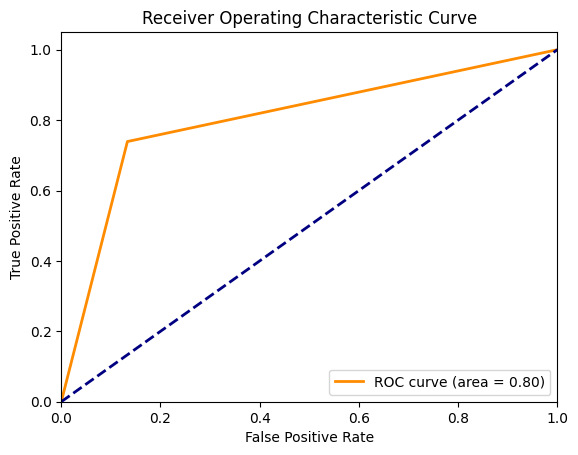

Epoch 1/30


2024-04-16 11:28:55.071746: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 57.6330 - accuracy: 0.5876

2024-04-16 11:28:56.557586: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 2s 40ms/step - loss: 57.6330 - accuracy: 0.5876 - val_loss: 2.7531 - val_accuracy: 0.7632 - lr: 0.0010
Epoch 2/30
36/36 [==============================] - 1s 21ms/step - loss: 2.0164 - accuracy: 0.7514 - val_loss: 1.0174 - val_accuracy: 0.7895 - lr: 0.0010
Epoch 3/30
36/36 [==============================] - 1s 20ms/step - loss: 0.5860 - accuracy: 0.8475 - val_loss: 1.2328 - val_accuracy: 0.6842 - lr: 0.0010
Epoch 4/30
36/36 [==============================] - 1s 20ms/step - loss: 0.3492 - accuracy: 0.8927 - val_loss: 1.3297 - val_accuracy: 0.7632 - lr: 0.0010
Epoch 5/30
36/36 [==============================] - 1s 20ms/step - loss: 0.1945 - accuracy: 0.9209 - val_loss: 0.9819 - val_accuracy: 0.8421 - lr: 0.0010
Epoch 6/30
36/36 [==============================] - 1s 20ms/step - loss: 0.0720 - accuracy: 0.9661 - val_loss: 1.0809 - val_accuracy: 0.8158 - lr: 0.0010
Epoch 7/30
36/36 [==============================] - 1s 20ms/step - loss: 1.1162 - accu

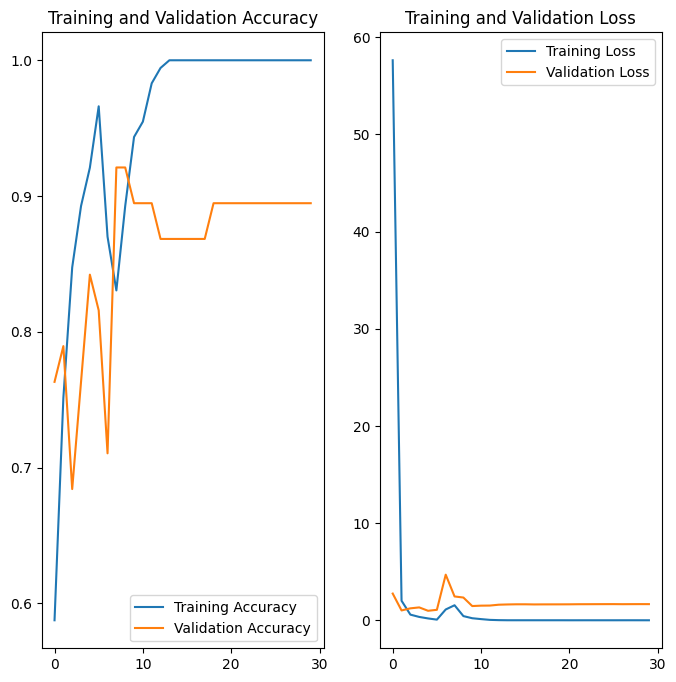

2/2 [==============================] - 0s 38ms/step
Overall Accuracy: 0.7631578947368421
Precision: 0.7916666666666666
Recall: 0.8260869565217391
F1-Score: 0.8085106382978724


2024-04-16 11:29:16.867201: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


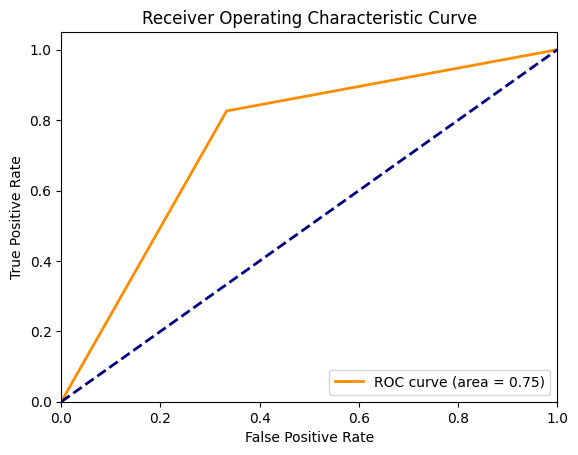

Epoch 1/30


2024-04-16 11:29:17.321747: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 119.2973 - accuracy: 0.5763

2024-04-16 11:29:18.887819: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 2s 42ms/step - loss: 119.2973 - accuracy: 0.5763 - val_loss: 3.3054 - val_accuracy: 0.8947 - lr: 0.0010
Epoch 2/30
36/36 [==============================] - 1s 22ms/step - loss: 3.2735 - accuracy: 0.7232 - val_loss: 1.6634 - val_accuracy: 0.8947 - lr: 0.0010
Epoch 3/30
36/36 [==============================] - 1s 19ms/step - loss: 0.6441 - accuracy: 0.7966 - val_loss: 1.3716 - val_accuracy: 0.9474 - lr: 0.0010
Epoch 4/30
36/36 [==============================] - 1s 19ms/step - loss: 0.2931 - accuracy: 0.8870 - val_loss: 1.3856 - val_accuracy: 0.9211 - lr: 0.0010
Epoch 5/30
36/36 [==============================] - 1s 20ms/step - loss: 0.1169 - accuracy: 0.9661 - val_loss: 1.5840 - val_accuracy: 0.9474 - lr: 0.0010
Epoch 6/30
36/36 [==============================] - 1s 19ms/step - loss: 0.0907 - accuracy: 0.9661 - val_loss: 1.7503 - val_accuracy: 0.9211 - lr: 0.0010
Epoch 7/30
36/36 [==============================] - 1s 18ms/step - loss: 0.0585 - acc

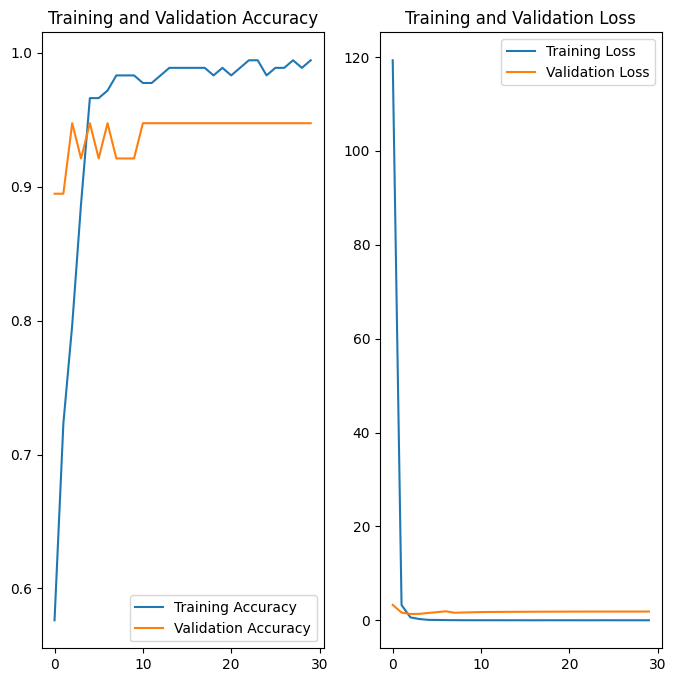

2/2 [==============================] - 0s 51ms/step
Overall Accuracy: 0.7368421052631579
Precision: 0.782608695652174
Recall: 0.782608695652174
F1-Score: 0.782608695652174


2024-04-16 11:29:39.287441: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


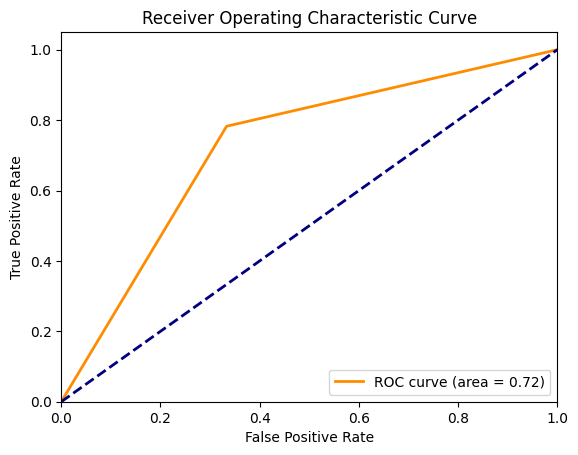

Epoch 1/30


2024-04-16 11:29:39.758191: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 109.8260 - accuracy: 0.5480

2024-04-16 11:29:41.292077: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 2s 41ms/step - loss: 109.8260 - accuracy: 0.5480 - val_loss: 2.6794 - val_accuracy: 0.8421 - lr: 0.0010
Epoch 2/30
36/36 [==============================] - 1s 20ms/step - loss: 7.8655 - accuracy: 0.7232 - val_loss: 1.9828 - val_accuracy: 0.8421 - lr: 0.0010
Epoch 3/30
36/36 [==============================] - 1s 20ms/step - loss: 3.7941 - accuracy: 0.8136 - val_loss: 1.8319 - val_accuracy: 0.8421 - lr: 0.0010
Epoch 4/30
36/36 [==============================] - 1s 21ms/step - loss: 1.6402 - accuracy: 0.8701 - val_loss: 1.9792 - val_accuracy: 0.8684 - lr: 0.0010
Epoch 5/30
36/36 [==============================] - 1s 21ms/step - loss: 1.7124 - accuracy: 0.8701 - val_loss: 5.8179 - val_accuracy: 0.7368 - lr: 0.0010
Epoch 6/30
36/36 [==============================] - 1s 19ms/step - loss: 1.3627 - accuracy: 0.9096 - val_loss: 2.5802 - val_accuracy: 0.8947 - lr: 0.0010
Epoch 7/30
36/36 [==============================] - 1s 22ms/step - loss: 0.7467 - acc

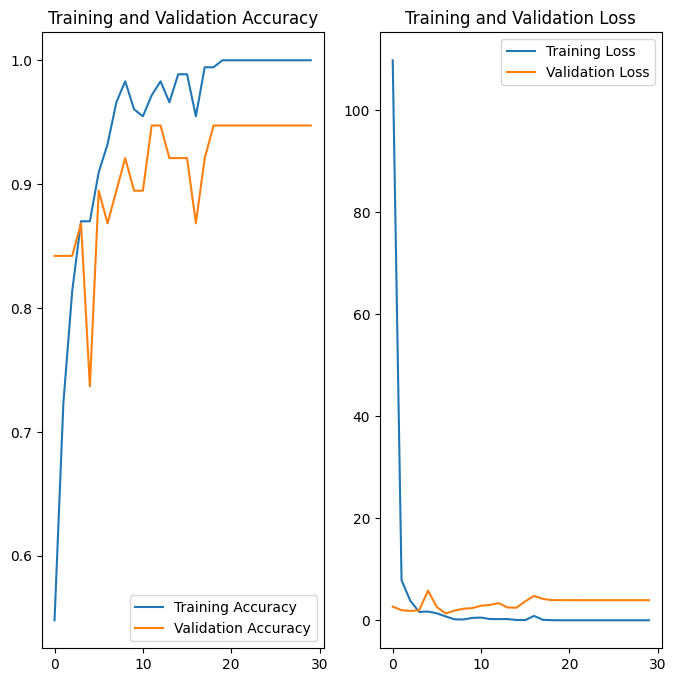

2/2 [==============================] - 0s 53ms/step
Overall Accuracy: 0.8157894736842105
Precision: 0.8636363636363636
Recall: 0.8260869565217391
F1-Score: 0.8444444444444444


2024-04-16 11:30:01.857292: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


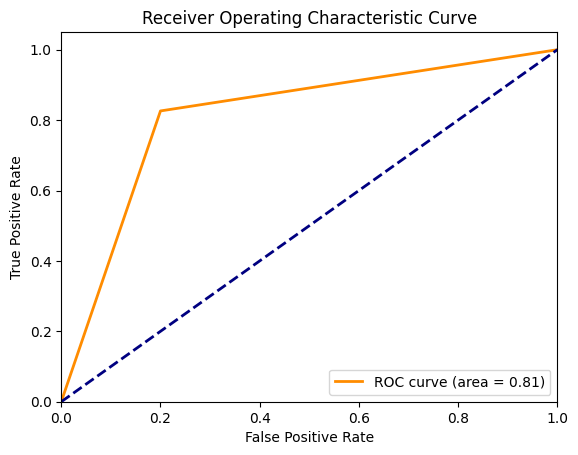

In [21]:
for i in range(5):
    # MODELING
    x = layers.Input(shape=(target_height, target_width, 1)) #input_shape = (height, width, channel)
    y = layers.DepthwiseConv2D(3, strides=(1,1), padding='valid', depth_multiplier=1)(x)

    y = layers.Conv2D(8, (3,3), padding='same')(x)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = layers.Conv2D(16, (3,3), padding='same')(y)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = layers.Conv2D(32, (3,3), padding='same')(y)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block(y, 32)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = layers.Flatten()(y)
    y = layers.Dense(50, activation='relu')(y)
    y = layers.Dense(1, activation='sigmoid')(y)

    model_2_RLR_v2 = tf.keras.Model(x,y)
    model_2_RLR_v2._name = 'Model_2_RLR_v2'
    
    if i == 0:
        model_2_RLR_v2.summary()

    # COMPILING
    model_2_RLR_v2.compile(optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
                    loss = 'binary_crossentropy',
                    metrics = 'accuracy')
    
    # SCHEDULER
    lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_accuracy',
        factor=0.1,
        patience=5,
        verbose=1,
        mode='auto',
        min_delta=0.01,
        cooldown=0,
        min_lr=0.0,
        
    )
    
    # TRAINING
    epochs = 30
    history = model_2_RLR_v2.fit(x = X_train, y = y_train,
                          batch_size=5,
                          epochs = epochs,
                          validation_data = (X_val, y_val),
                          callbacks=[lr_scheduler])

    # SHOWING RESULTS
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

    # PREDICTING
    pred_prob = model_2_RLR_v2.predict(X_test)
    y_pred = np.where(pred_prob > 0.5, 1, 0)

    # Compute overall accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Overall Accuracy:", accuracy)

    # Compute precision
    precision = precision_score(y_test, y_pred)
    print("Precision:", precision)

    # Compute recall
    recall = recall_score(y_test, y_pred)
    print("Recall:", recall)

    # Compute F1-score
    f1 = f1_score(y_test, y_pred)
    print("F1-Score:", f1)

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()
    del model_2_RLR_v2
    #del history


Model: "Model_2_ES"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_24 (InputLayer)       [(None, 400, 400, 1)]        0         []                            
                                                                                                  
 conv2d_115 (Conv2D)         (None, 400, 400, 8)          80        ['input_24[0][0]']            
                                                                                                  
 max_pooling2d_92 (MaxPooli  (None, 200, 200, 8)          0         ['conv2d_115[0][0]']          
 ng2D)                                                                                            
                                                                                                  
 conv2d_116 (Conv2D)         (None, 200, 200, 16)         1168      ['max_pooling2d_92[0]

2024-04-16 11:40:39.100024: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 62.8212 - accuracy: 0.6045

2024-04-16 11:40:41.073854: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 3s 52ms/step - loss: 62.8212 - accuracy: 0.6045 - val_loss: 4.6673 - val_accuracy: 0.8684
Epoch 2/30
36/36 [==============================] - 1s 21ms/step - loss: 5.1492 - accuracy: 0.7401 - val_loss: 3.0230 - val_accuracy: 0.7368
Epoch 3/30
36/36 [==============================] - 1s 19ms/step - loss: 2.4894 - accuracy: 0.7966 - val_loss: 2.4546 - val_accuracy: 0.8421
Epoch 4/30
36/36 [==============================] - 1s 21ms/step - loss: 0.8709 - accuracy: 0.8983 - val_loss: 1.5073 - val_accuracy: 0.8947
Epoch 5/30
36/36 [==============================] - 1s 19ms/step - loss: 0.5076 - accuracy: 0.9096 - val_loss: 1.1979 - val_accuracy: 0.8684
Epoch 6/30
36/36 [==============================] - 1s 20ms/step - loss: 0.2918 - accuracy: 0.9492 - val_loss: 2.9054 - val_accuracy: 0.7895
Epoch 7/30
36/36 [==============================] - 1s 18ms/step - loss: 0.2562 - accuracy: 0.9605 - val_loss: 1.3354 - val_accuracy: 0.9211
Epoch 8/30
36/36 [=====

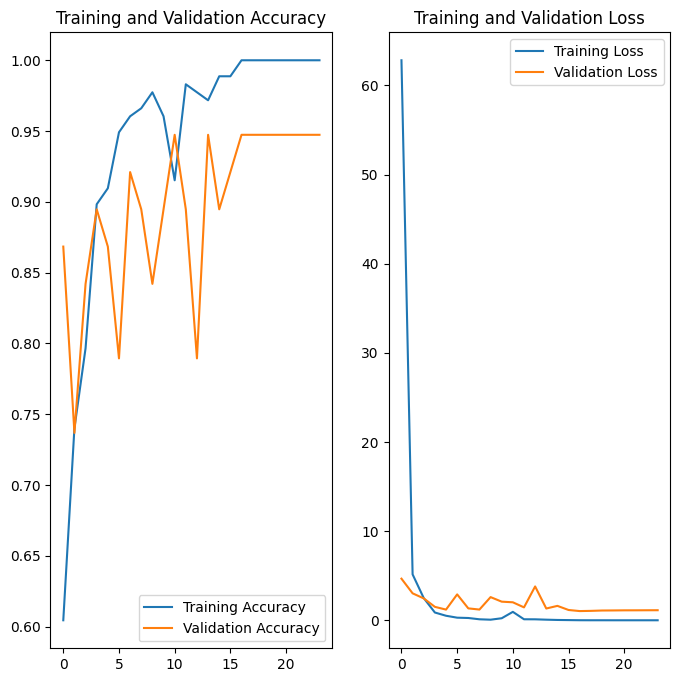

2/2 [==============================] - 0s 79ms/step


2024-04-16 11:40:57.501197: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Overall Accuracy: 0.868421052631579
Precision: 0.9090909090909091
Recall: 0.8695652173913043
F1-Score: 0.888888888888889


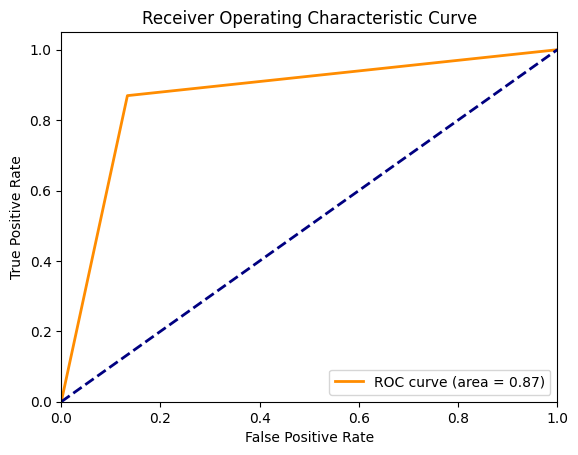

Epoch 1/30


2024-04-16 11:40:58.030793: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 88.5489 - accuracy: 0.5706

2024-04-16 11:41:00.060337: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 3s 53ms/step - loss: 88.5489 - accuracy: 0.5706 - val_loss: 22.7119 - val_accuracy: 0.3684
Epoch 2/30
36/36 [==============================] - 1s 23ms/step - loss: 21.3372 - accuracy: 0.6158 - val_loss: 35.9825 - val_accuracy: 0.3947
Epoch 3/30
36/36 [==============================] - 1s 21ms/step - loss: 20.1510 - accuracy: 0.6328 - val_loss: 24.1001 - val_accuracy: 0.5000
Epoch 4/30
36/36 [==============================] - 1s 21ms/step - loss: 11.8613 - accuracy: 0.6780 - val_loss: 13.2290 - val_accuracy: 0.5789
Epoch 5/30
36/36 [==============================] - 1s 20ms/step - loss: 3.6686 - accuracy: 0.7797 - val_loss: 6.9031 - val_accuracy: 0.7368
Epoch 6/30
36/36 [==============================] - 1s 19ms/step - loss: 3.1373 - accuracy: 0.7571 - val_loss: 4.6838 - val_accuracy: 0.7368
Epoch 7/30
36/36 [==============================] - 1s 30ms/step - loss: 1.6497 - accuracy: 0.8531 - val_loss: 4.2674 - val_accuracy: 0.7895
Epoch 8/30
36/36

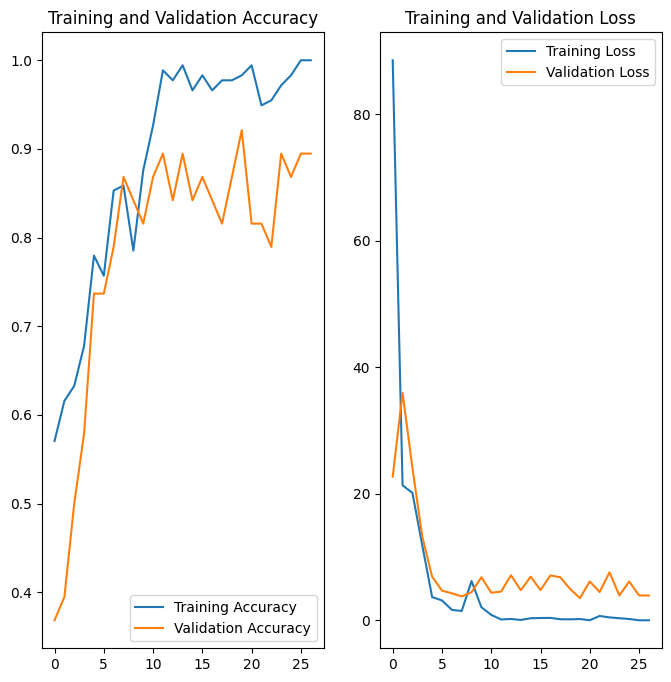

1/2 [==============>...............] - ETA: 0s

2024-04-16 11:41:19.408729: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 104ms/step
Overall Accuracy: 0.8157894736842105
Precision: 0.8636363636363636
Recall: 0.8260869565217391
F1-Score: 0.8444444444444444


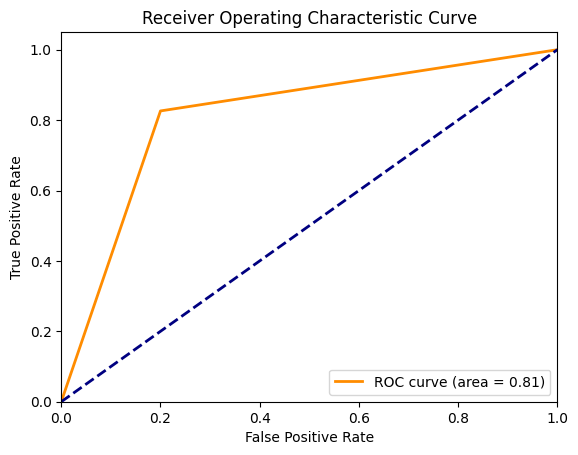

Epoch 1/30


2024-04-16 11:41:19.967267: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 141.8698 - accuracy: 0.6215

2024-04-16 11:41:21.866257: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 3s 50ms/step - loss: 141.8698 - accuracy: 0.6215 - val_loss: 18.2760 - val_accuracy: 0.7368
Epoch 2/30
36/36 [==============================] - 1s 24ms/step - loss: 47.9548 - accuracy: 0.6271 - val_loss: 24.4927 - val_accuracy: 0.8421
Epoch 3/30
36/36 [==============================] - 1s 21ms/step - loss: 48.3581 - accuracy: 0.6158 - val_loss: 24.4987 - val_accuracy: 0.8421
Epoch 4/30
36/36 [==============================] - 1s 20ms/step - loss: 24.0404 - accuracy: 0.6836 - val_loss: 19.6940 - val_accuracy: 0.8421
Epoch 5/30
36/36 [==============================] - 1s 20ms/step - loss: 15.8995 - accuracy: 0.7966 - val_loss: 21.1922 - val_accuracy: 0.8947
Epoch 6/30
36/36 [==============================] - 1s 20ms/step - loss: 9.1456 - accuracy: 0.8927 - val_loss: 14.0814 - val_accuracy: 0.8947
Epoch 7/30
36/36 [==============================] - 1s 19ms/step - loss: 5.1635 - accuracy: 0.9209 - val_loss: 20.5276 - val_accuracy: 0.8684
Epoch 8/30


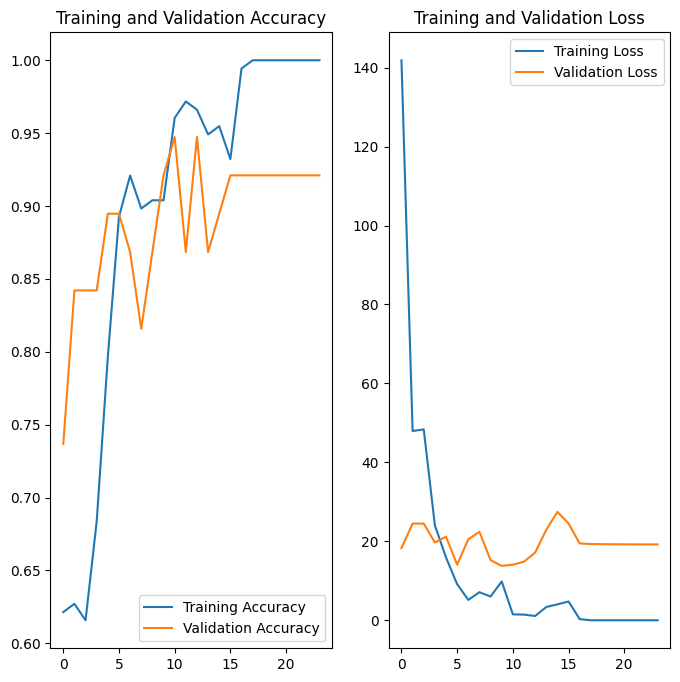

2/2 [==============================] - 0s 89ms/step


2024-04-16 11:41:38.554165: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Overall Accuracy: 0.8421052631578947
Precision: 0.9047619047619048
Recall: 0.8260869565217391
F1-Score: 0.8636363636363636


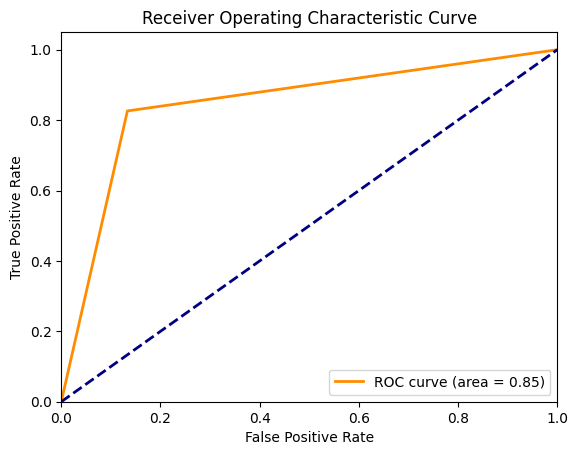

Epoch 1/30


2024-04-16 11:41:39.087165: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 139.5911 - accuracy: 0.6441

2024-04-16 11:41:41.111867: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 3s 54ms/step - loss: 139.5911 - accuracy: 0.6441 - val_loss: 7.8883 - val_accuracy: 0.7632
Epoch 2/30
36/36 [==============================] - 1s 23ms/step - loss: 11.4115 - accuracy: 0.7288 - val_loss: 2.6923 - val_accuracy: 0.8684
Epoch 3/30
36/36 [==============================] - 1s 20ms/step - loss: 1.0842 - accuracy: 0.8588 - val_loss: 1.1232 - val_accuracy: 0.8684
Epoch 4/30
36/36 [==============================] - 1s 20ms/step - loss: 0.4615 - accuracy: 0.8757 - val_loss: 1.0939 - val_accuracy: 0.8947
Epoch 5/30
36/36 [==============================] - 1s 20ms/step - loss: 0.1344 - accuracy: 0.9435 - val_loss: 1.0331 - val_accuracy: 0.8947
Epoch 6/30
36/36 [==============================] - 1s 19ms/step - loss: 0.0540 - accuracy: 0.9774 - val_loss: 1.2496 - val_accuracy: 0.8684
Epoch 7/30
36/36 [==============================] - 1s 19ms/step - loss: 0.0111 - accuracy: 0.9944 - val_loss: 1.4055 - val_accuracy: 0.8421
Epoch 8/30
36/36 [===

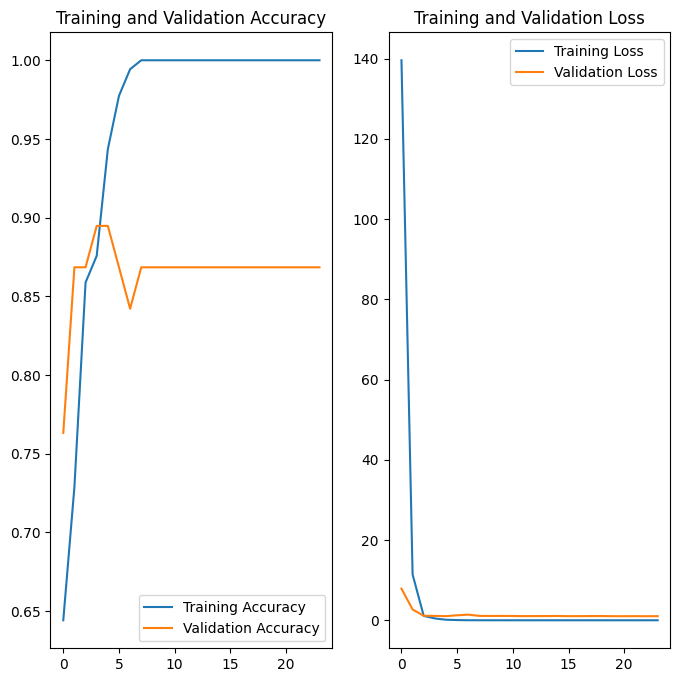

2/2 [==============================] - 0s 74ms/step


2024-04-16 11:41:57.572861: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Overall Accuracy: 0.8157894736842105
Precision: 0.9
Recall: 0.782608695652174
F1-Score: 0.8372093023255814


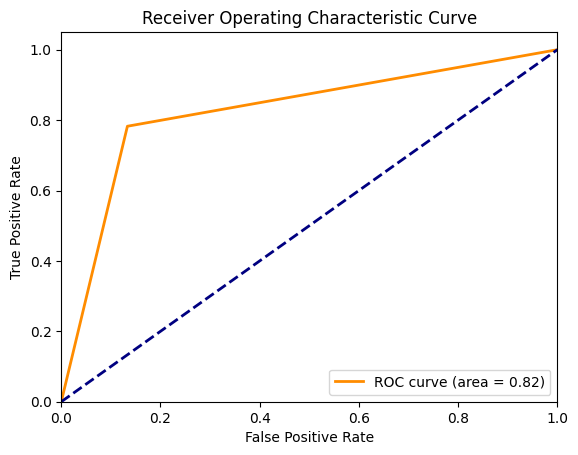

Epoch 1/30


2024-04-16 11:41:58.105270: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 34.5327 - accuracy: 0.6158

2024-04-16 11:42:00.060718: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 3s 49ms/step - loss: 34.5327 - accuracy: 0.6158 - val_loss: 3.1962 - val_accuracy: 0.6316
Epoch 2/30
36/36 [==============================] - 1s 24ms/step - loss: 1.0748 - accuracy: 0.7571 - val_loss: 1.0815 - val_accuracy: 0.8684
Epoch 3/30
36/36 [==============================] - 1s 20ms/step - loss: 0.3098 - accuracy: 0.9096 - val_loss: 0.8407 - val_accuracy: 0.9211
Epoch 4/30
36/36 [==============================] - 1s 20ms/step - loss: 0.1027 - accuracy: 0.9605 - val_loss: 0.8336 - val_accuracy: 0.9211
Epoch 5/30
36/36 [==============================] - 1s 20ms/step - loss: 0.1235 - accuracy: 0.9548 - val_loss: 0.8263 - val_accuracy: 0.9211
Epoch 6/30
36/36 [==============================] - 1s 21ms/step - loss: 0.1477 - accuracy: 0.9435 - val_loss: 0.9567 - val_accuracy: 0.8684
Epoch 7/30
36/36 [==============================] - 1s 21ms/step - loss: 0.1201 - accuracy: 0.9718 - val_loss: 1.3926 - val_accuracy: 0.8684
Epoch 8/30
36/36 [=====

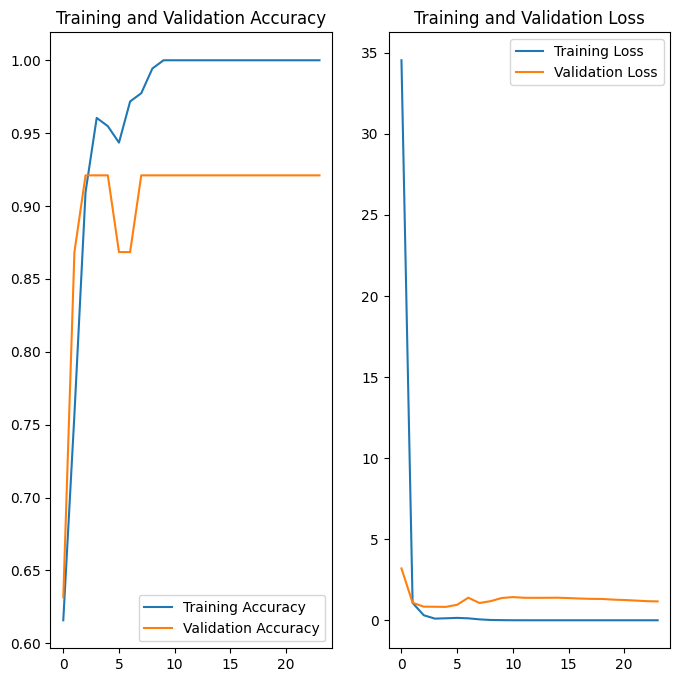

2/2 [==============================] - 0s 73ms/step


2024-04-16 11:42:16.893706: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Overall Accuracy: 0.8157894736842105
Precision: 0.8636363636363636
Recall: 0.8260869565217391
F1-Score: 0.8444444444444444


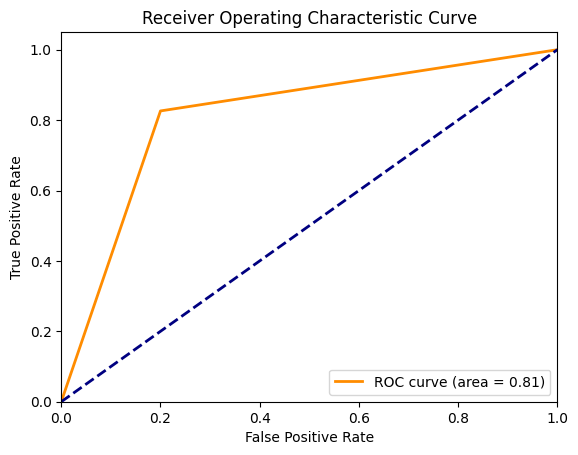

In [28]:
for i in range(5):
    # MODELING
    x = layers.Input(shape=(target_height, target_width, 1)) #input_shape = (height, width, channel)
    y = layers.DepthwiseConv2D(3, strides=(1,1), padding='valid', depth_multiplier=1)(x)

    y = layers.Conv2D(8, (3,3), padding='same')(x)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = layers.Conv2D(16, (3,3), padding='same')(y)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = layers.Conv2D(32, (3,3), padding='same')(y)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block(y, 32)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = layers.Flatten()(y)
    y = layers.Dense(50, activation='relu')(y)
    y = layers.Dense(1, activation='sigmoid')(y)

    model_2_ES = tf.keras.Model(x,y)
    model_2_ES._name = 'Model_2_ES'
    
    if i == 0:
        model_2_ES.summary()

    # COMPILING
    model_2_ES.compile(optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
                    loss = 'binary_crossentropy',
                    metrics = 'accuracy')
    
    # SCHEDULER
    lr_scheduler = tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        min_delta=0.001,
        patience=3,
        verbose=1,
        mode='auto',
        baseline=None,
        restore_best_weights=False,
        start_from_epoch=20
)
    
    # TRAINING
    epochs = 30
    history = model_2_ES.fit(x = X_train, y = y_train,
                          batch_size=5,
                          epochs = epochs,
                          validation_data = (X_val, y_val),
                          callbacks=[lr_scheduler])

    # SHOWING RESULTS
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(range(len(acc)), acc, label='Training Accuracy')
    plt.plot(range(len(val_acc)), val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(range(len(loss)), loss, label='Training Loss')
    plt.plot(range(len(val_loss)), val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

    # PREDICTING
    pred_prob = model_2_ES.predict(X_test)
    y_pred = np.where(pred_prob > 0.5, 1, 0)

    # Compute overall accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Overall Accuracy:", accuracy)

    # Compute precision
    precision = precision_score(y_test, y_pred)
    print("Precision:", precision)

    # Compute recall
    recall = recall_score(y_test, y_pred)
    print("Recall:", recall)

    # Compute F1-score
    f1 = f1_score(y_test, y_pred)
    print("F1-Score:", f1)

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()
    del model_2_ES
    #del history


Model: "Model_2_ES_L2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_40 (InputLayer)       [(None, 400, 400, 1)]        0         []                            
                                                                                                  
 conv2d_195 (Conv2D)         (None, 400, 400, 8)          80        ['input_40[0][0]']            
                                                                                                  
 max_pooling2d_156 (MaxPool  (None, 200, 200, 8)          0         ['conv2d_195[0][0]']          
 ing2D)                                                                                           
                                                                                                  
 conv2d_196 (Conv2D)         (None, 200, 200, 16)         1168      ['max_pooling2d_15

2024-04-16 12:13:34.908138: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 42.5431 - accuracy: 0.5763

2024-04-16 12:13:38.151072: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 4s 91ms/step - loss: 42.5431 - accuracy: 0.5763 - val_loss: 3.3114 - val_accuracy: 0.6316
Epoch 2/30
36/36 [==============================] - 2s 51ms/step - loss: 2.2747 - accuracy: 0.7966 - val_loss: 3.4554 - val_accuracy: 0.6053
Epoch 3/30
36/36 [==============================] - 2s 51ms/step - loss: 1.1134 - accuracy: 0.8701 - val_loss: 0.6995 - val_accuracy: 0.7895
Epoch 4/30
36/36 [==============================] - 2s 43ms/step - loss: 0.1264 - accuracy: 0.9548 - val_loss: 0.4348 - val_accuracy: 0.8947
Epoch 5/30
36/36 [==============================] - 2s 47ms/step - loss: 0.0344 - accuracy: 0.9887 - val_loss: 0.5262 - val_accuracy: 0.8684
Epoch 6/30
36/36 [==============================] - 2s 50ms/step - loss: 0.0175 - accuracy: 1.0000 - val_loss: 0.5314 - val_accuracy: 0.8947
Epoch 7/30
36/36 [==============================] - 2s 53ms/step - loss: 0.0153 - accuracy: 1.0000 - val_loss: 0.5250 - val_accuracy: 0.9211
Epoch 8/30
36/36 [=====

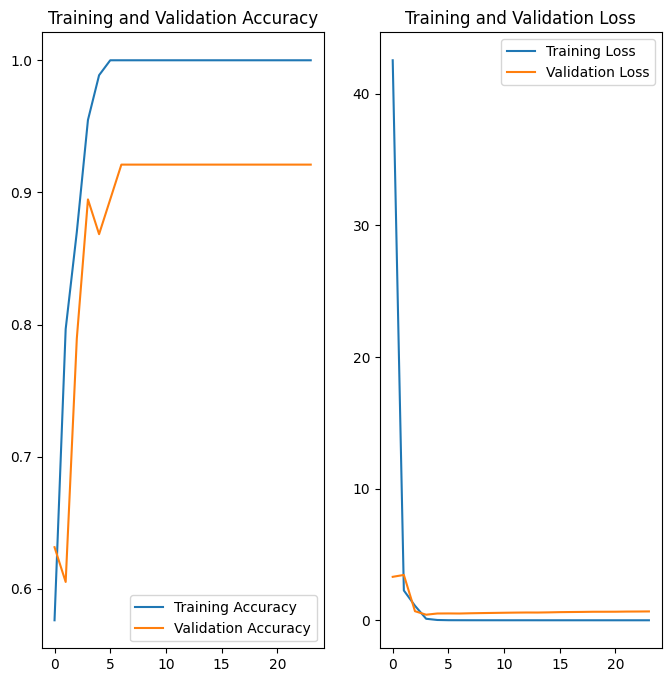

2/2 [==============================] - 0s 68ms/step


2024-04-16 12:14:18.073024: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Overall Accuracy: 0.8421052631578947
Precision: 0.8695652173913043
Recall: 0.8695652173913043
F1-Score: 0.8695652173913043


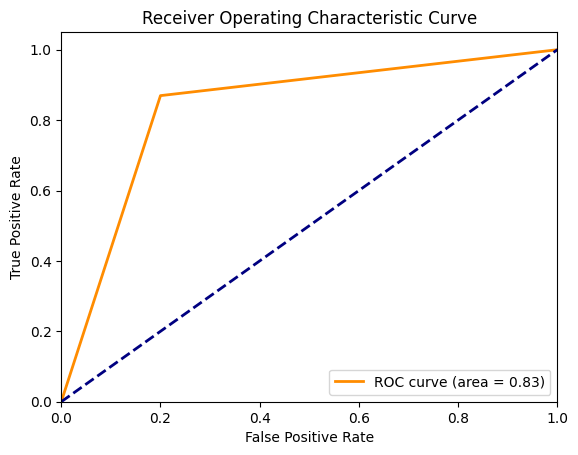

Epoch 1/30


2024-04-16 12:14:18.617293: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 37.0471 - accuracy: 0.6158

2024-04-16 12:14:21.835687: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 4s 102ms/step - loss: 37.0471 - accuracy: 0.6158 - val_loss: 1.7282 - val_accuracy: 0.8947
Epoch 2/30
36/36 [==============================] - 2s 59ms/step - loss: 1.6686 - accuracy: 0.7401 - val_loss: 1.8843 - val_accuracy: 0.7368
Epoch 3/30
36/36 [==============================] - 2s 47ms/step - loss: 0.5212 - accuracy: 0.8475 - val_loss: 1.3692 - val_accuracy: 0.7368
Epoch 4/30
36/36 [==============================] - 2s 56ms/step - loss: 0.2363 - accuracy: 0.9209 - val_loss: 0.9865 - val_accuracy: 0.8947
Epoch 5/30
36/36 [==============================] - 2s 56ms/step - loss: 0.5723 - accuracy: 0.8870 - val_loss: 2.3409 - val_accuracy: 0.6316
Epoch 6/30
36/36 [==============================] - 2s 54ms/step - loss: 0.5479 - accuracy: 0.8927 - val_loss: 0.9986 - val_accuracy: 0.9211
Epoch 7/30
36/36 [==============================] - 2s 55ms/step - loss: 0.3742 - accuracy: 0.9153 - val_loss: 0.8597 - val_accuracy: 0.8947
Epoch 8/30
36/36 [====

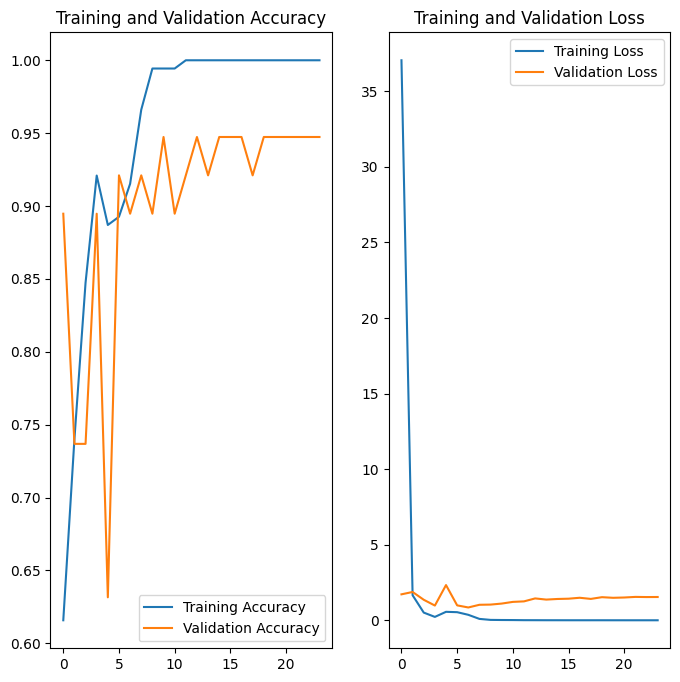

1/2 [==============>...............] - ETA: 0s

2024-04-16 12:15:07.969930: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 154ms/step
Overall Accuracy: 0.8421052631578947
Precision: 0.9047619047619048
Recall: 0.8260869565217391
F1-Score: 0.8636363636363636


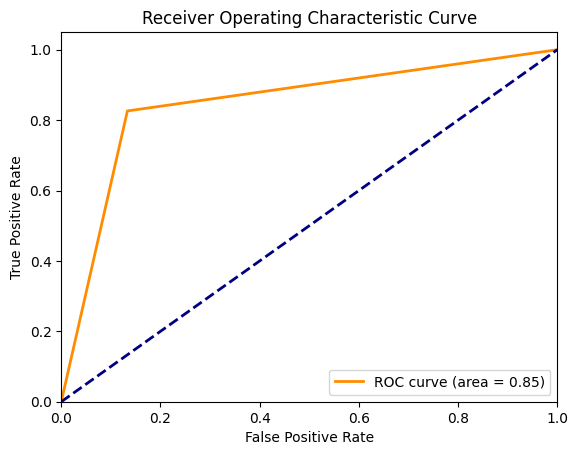

Epoch 1/30


2024-04-16 12:15:08.647726: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 105.3641 - accuracy: 0.6497

2024-04-16 12:15:12.745053: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 5s 112ms/step - loss: 105.3641 - accuracy: 0.6497 - val_loss: 8.8321 - val_accuracy: 0.7105
Epoch 2/30
36/36 [==============================] - 2s 65ms/step - loss: 9.6007 - accuracy: 0.6780 - val_loss: 6.3861 - val_accuracy: 0.7368
Epoch 3/30
36/36 [==============================] - 2s 56ms/step - loss: 3.2463 - accuracy: 0.6780 - val_loss: 1.3088 - val_accuracy: 0.8158
Epoch 4/30
36/36 [==============================] - 2s 54ms/step - loss: 2.2474 - accuracy: 0.7232 - val_loss: 1.3267 - val_accuracy: 0.8158
Epoch 5/30
36/36 [==============================] - 2s 57ms/step - loss: 1.5066 - accuracy: 0.7627 - val_loss: 4.4267 - val_accuracy: 0.5263
Epoch 6/30
36/36 [==============================] - 2s 53ms/step - loss: 1.7380 - accuracy: 0.7571 - val_loss: 0.9538 - val_accuracy: 0.8684
Epoch 7/30
36/36 [==============================] - 2s 53ms/step - loss: 0.7045 - accuracy: 0.8418 - val_loss: 1.1377 - val_accuracy: 0.7895
Epoch 8/30
36/36 [===

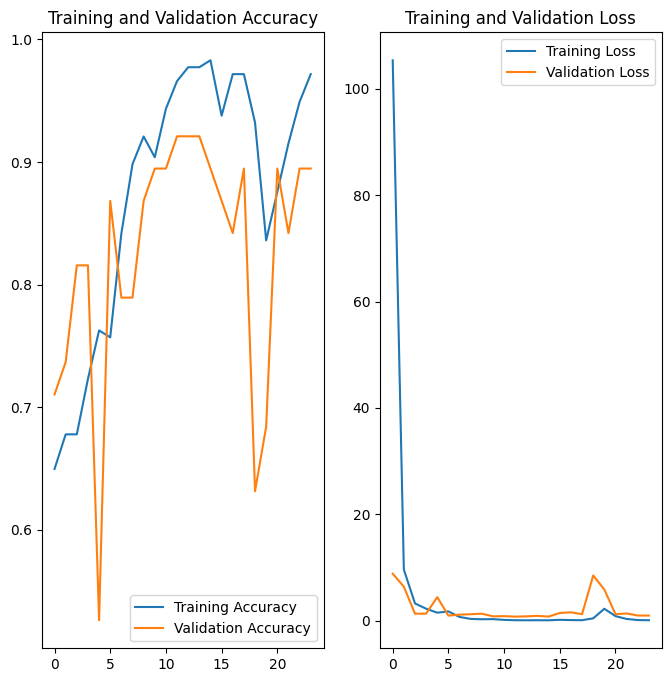

2/2 [==============================] - 0s 90ms/step


2024-04-16 12:15:57.443624: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Overall Accuracy: 0.868421052631579
Precision: 0.875
Recall: 0.9130434782608695
F1-Score: 0.8936170212765957


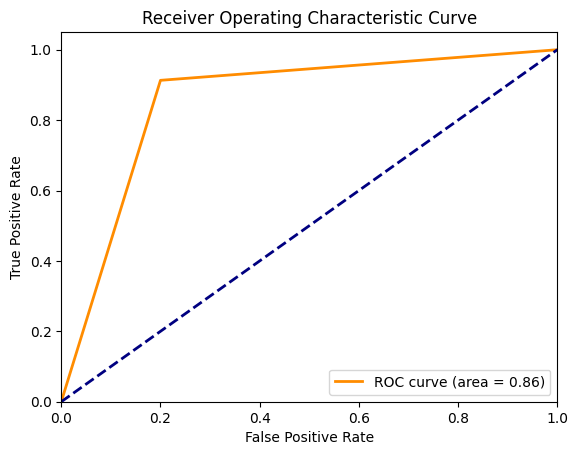

Epoch 1/30


2024-04-16 12:15:57.972810: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 75.8646 - accuracy: 0.6667

2024-04-16 12:16:01.545310: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 5s 106ms/step - loss: 75.8646 - accuracy: 0.6667 - val_loss: 139.2946 - val_accuracy: 0.3421
Epoch 2/30
36/36 [==============================] - 2s 56ms/step - loss: 87.9956 - accuracy: 0.5876 - val_loss: 26.0928 - val_accuracy: 0.6053
Epoch 3/30
36/36 [==============================] - 2s 50ms/step - loss: 11.8839 - accuracy: 0.7401 - val_loss: 25.6724 - val_accuracy: 0.4737
Epoch 4/30
36/36 [==============================] - 2s 53ms/step - loss: 7.9755 - accuracy: 0.7740 - val_loss: 9.0090 - val_accuracy: 0.7895
Epoch 5/30
36/36 [==============================] - 2s 51ms/step - loss: 4.1548 - accuracy: 0.8023 - val_loss: 5.7388 - val_accuracy: 0.9211
Epoch 6/30
36/36 [==============================] - 2s 54ms/step - loss: 2.6374 - accuracy: 0.8362 - val_loss: 5.2578 - val_accuracy: 0.9211
Epoch 7/30
36/36 [==============================] - 2s 59ms/step - loss: 1.3486 - accuracy: 0.9153 - val_loss: 5.1945 - val_accuracy: 0.8947
Epoch 8/30
36/36

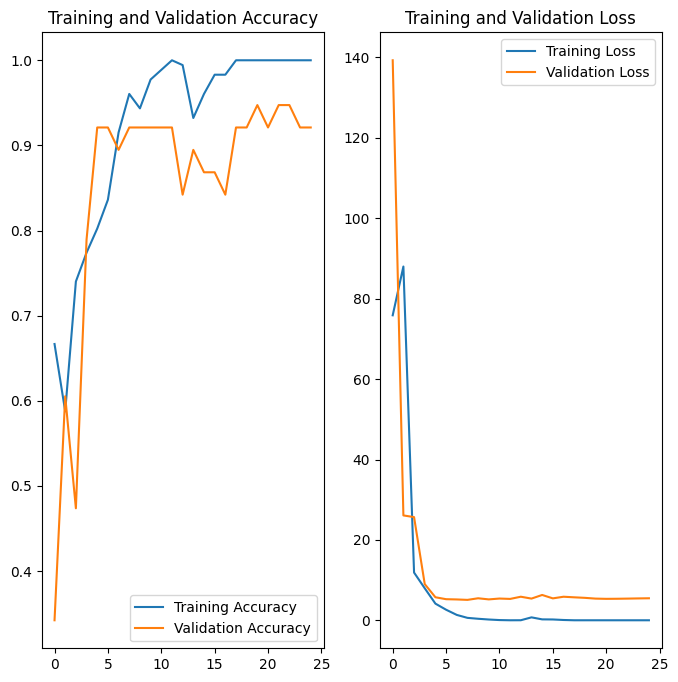

2/2 [==============================] - 0s 69ms/step


2024-04-16 12:16:49.962044: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Overall Accuracy: 0.7894736842105263
Precision: 0.8260869565217391
Recall: 0.8260869565217391
F1-Score: 0.8260869565217391


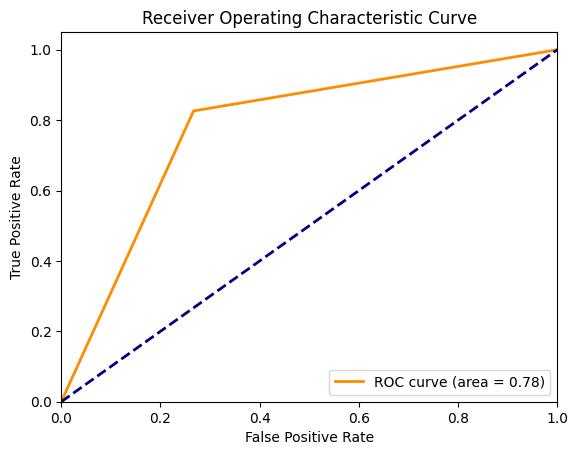

Epoch 1/30


2024-04-16 12:16:51.389180: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 89.5082 - accuracy: 0.5593

2024-04-16 12:16:55.040901: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 6s 105ms/step - loss: 89.5082 - accuracy: 0.5593 - val_loss: 24.9783 - val_accuracy: 0.5263
Epoch 2/30
36/36 [==============================] - 2s 55ms/step - loss: 13.1189 - accuracy: 0.7006 - val_loss: 2.5540 - val_accuracy: 0.8684
Epoch 3/30
36/36 [==============================] - 2s 55ms/step - loss: 3.4546 - accuracy: 0.7684 - val_loss: 3.6232 - val_accuracy: 0.7632
Epoch 4/30
36/36 [==============================] - 2s 55ms/step - loss: 2.2586 - accuracy: 0.8249 - val_loss: 2.9011 - val_accuracy: 0.8421
Epoch 5/30
36/36 [==============================] - 2s 52ms/step - loss: 1.2639 - accuracy: 0.8701 - val_loss: 5.2400 - val_accuracy: 0.6053
Epoch 6/30
36/36 [==============================] - 2s 55ms/step - loss: 1.0799 - accuracy: 0.8927 - val_loss: 2.8379 - val_accuracy: 0.8684
Epoch 7/30
36/36 [==============================] - 2s 55ms/step - loss: 0.8988 - accuracy: 0.8644 - val_loss: 2.1013 - val_accuracy: 0.9211
Epoch 8/30
36/36 [==

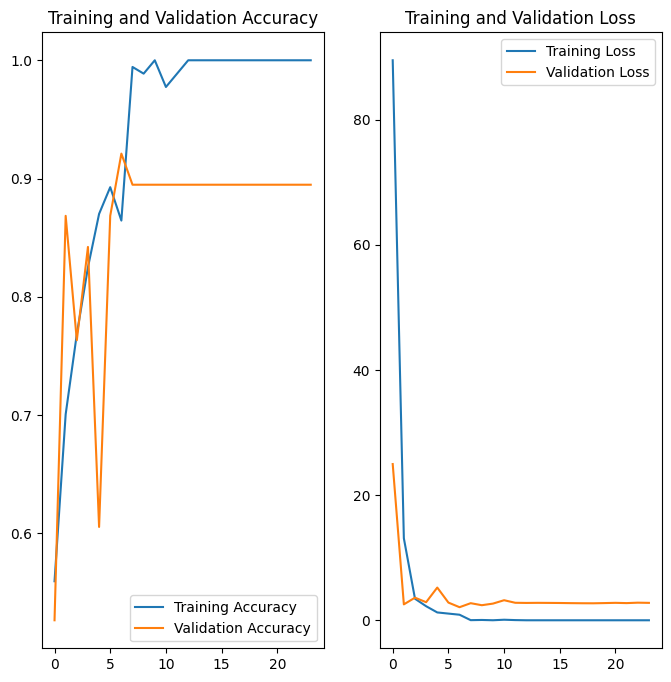

1/2 [==============>...............] - ETA: 0s

2024-04-16 12:17:39.782746: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 111ms/step
Overall Accuracy: 0.7894736842105263
Precision: 0.8947368421052632
Recall: 0.7391304347826086
F1-Score: 0.8095238095238095


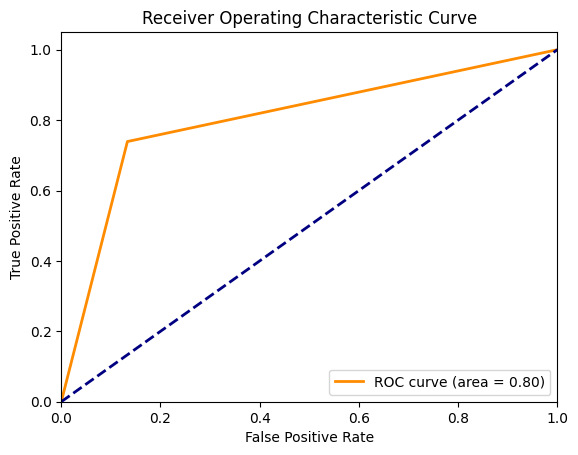

In [35]:
from keras import regularizers

for i in range(5):
    # MODELING
    x = layers.Input(shape=(target_height, target_width, 1)) #input_shape = (height, width, channel)
    y = layers.DepthwiseConv2D(3, strides=(1,1), padding='valid', depth_multiplier=1)(x)

    y = layers.Conv2D(8, (3,3), padding='same', kernel_regularizer=regularizers.L2(0.0001))(x)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = layers.Conv2D(16, (3,3), padding='same', kernel_regularizer=regularizers.L2(0.0001))(y)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = layers.Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.L2(0.0001))(y)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block(y, 32)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = layers.Flatten()(y)
    y = layers.Dense(50, activation='relu', kernel_regularizer=regularizers.L2(0.0001))(y)
    y = layers.Dense(1, activation='sigmoid')(y)

    model_2_ES_L2 = tf.keras.Model(x,y)
    model_2_ES_L2._name = 'Model_2_ES_L2'
    
    if i == 0:
        model_2_ES_L2.summary()

    # COMPILING
    model_2_ES_L2.compile(optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
                    loss = 'binary_crossentropy',
                    metrics = 'accuracy')
    
    # SCHEDULER
    lr_scheduler = tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        min_delta=0.001,
        patience=3,
        verbose=1,
        mode='auto',
        baseline=None,
        restore_best_weights=False,
        start_from_epoch=20
)
    
    # TRAINING
    epochs = 30
    history = model_2_ES_L2.fit(x = X_train, y = y_train,
                          batch_size=5,
                          epochs = epochs,
                          validation_data = (X_val, y_val),
                          callbacks=[lr_scheduler])

    # SHOWING RESULTS
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(range(len(acc)), acc, label='Training Accuracy')
    plt.plot(range(len(val_acc)), val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(range(len(loss)), loss, label='Training Loss')
    plt.plot(range(len(val_loss)), val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

    # PREDICTING
    pred_prob = model_2_ES_L2.predict(X_test)
    y_pred = np.where(pred_prob > 0.5, 1, 0)

    # Compute overall accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Overall Accuracy:", accuracy)

    # Compute precision
    precision = precision_score(y_test, y_pred)
    print("Precision:", precision)

    # Compute recall
    recall = recall_score(y_test, y_pred)
    print("Recall:", recall)

    # Compute F1-score
    f1 = f1_score(y_test, y_pred)
    print("F1-Score:", f1)

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()
    del model_2_ES_L2
    #del history


Model: "Model_2_ES_L2_DO"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_51 (InputLayer)       [(None, 400, 400, 1)]        0         []                            
                                                                                                  
 conv2d_247 (Conv2D)         (None, 400, 400, 8)          80        ['input_51[0][0]']            
                                                                                                  
 max_pooling2d_198 (MaxPool  (None, 200, 200, 8)          0         ['conv2d_247[0][0]']          
 ing2D)                                                                                           
                                                                                                  
 conv2d_248 (Conv2D)         (None, 200, 200, 16)         1168      ['max_pooling2d

2024-04-16 18:14:23.339912: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 44.0118 - accuracy: 0.5424

2024-04-16 18:14:28.559745: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 7s 141ms/step - loss: 44.0118 - accuracy: 0.5424 - val_loss: 2.0394 - val_accuracy: 0.6842
Epoch 2/30
36/36 [==============================] - 2s 63ms/step - loss: 2.8512 - accuracy: 0.5819 - val_loss: 1.1479 - val_accuracy: 0.7105
Epoch 3/30
36/36 [==============================] - 2s 63ms/step - loss: 1.0201 - accuracy: 0.7345 - val_loss: 1.3001 - val_accuracy: 0.7368
Epoch 4/30
36/36 [==============================] - 2s 66ms/step - loss: 0.4569 - accuracy: 0.8418 - val_loss: 2.4001 - val_accuracy: 0.6842
Epoch 5/30
36/36 [==============================] - 2s 60ms/step - loss: 0.7278 - accuracy: 0.8418 - val_loss: 1.1140 - val_accuracy: 0.8158
Epoch 6/30
36/36 [==============================] - 2s 62ms/step - loss: 0.5254 - accuracy: 0.8418 - val_loss: 1.1883 - val_accuracy: 0.7632
Epoch 7/30
36/36 [==============================] - 2s 60ms/step - loss: 0.4071 - accuracy: 0.8588 - val_loss: 1.2291 - val_accuracy: 0.7895
Epoch 8/30
36/36 [====

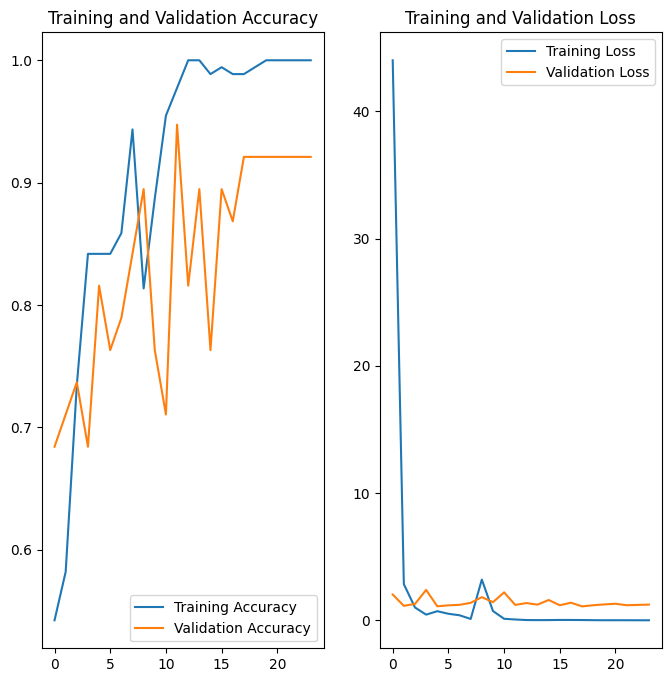

1/2 [==============>...............] - ETA: 0s

2024-04-16 18:15:19.248492: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 153ms/step
Overall Accuracy: 0.8421052631578947
Precision: 0.9047619047619048
Recall: 0.8260869565217391
F1-Score: 0.8636363636363636


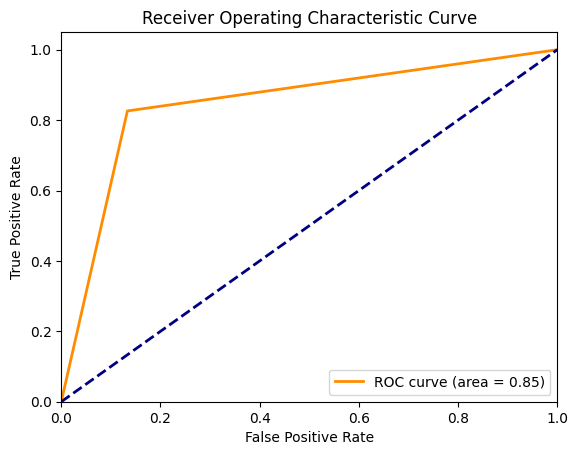

Epoch 1/30


2024-04-16 18:15:19.968341: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 189.2283 - accuracy: 0.5932

2024-04-16 18:15:25.107745: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 7s 138ms/step - loss: 189.2283 - accuracy: 0.5932 - val_loss: 85.2954 - val_accuracy: 0.6053
Epoch 2/30
36/36 [==============================] - 3s 74ms/step - loss: 67.8358 - accuracy: 0.6949 - val_loss: 50.0876 - val_accuracy: 0.6579
Epoch 3/30
36/36 [==============================] - 2s 64ms/step - loss: 37.9780 - accuracy: 0.6949 - val_loss: 22.1447 - val_accuracy: 0.7632
Epoch 4/30
36/36 [==============================] - 2s 61ms/step - loss: 31.5296 - accuracy: 0.7458 - val_loss: 9.1267 - val_accuracy: 0.9211
Epoch 5/30
36/36 [==============================] - 2s 69ms/step - loss: 25.3727 - accuracy: 0.7288 - val_loss: 11.4939 - val_accuracy: 0.9211
Epoch 6/30
36/36 [==============================] - 2s 64ms/step - loss: 9.5927 - accuracy: 0.8531 - val_loss: 8.1905 - val_accuracy: 0.8684
Epoch 7/30
36/36 [==============================] - 2s 68ms/step - loss: 14.2639 - accuracy: 0.8079 - val_loss: 15.3667 - val_accuracy: 0.8684
Epoch 8/30


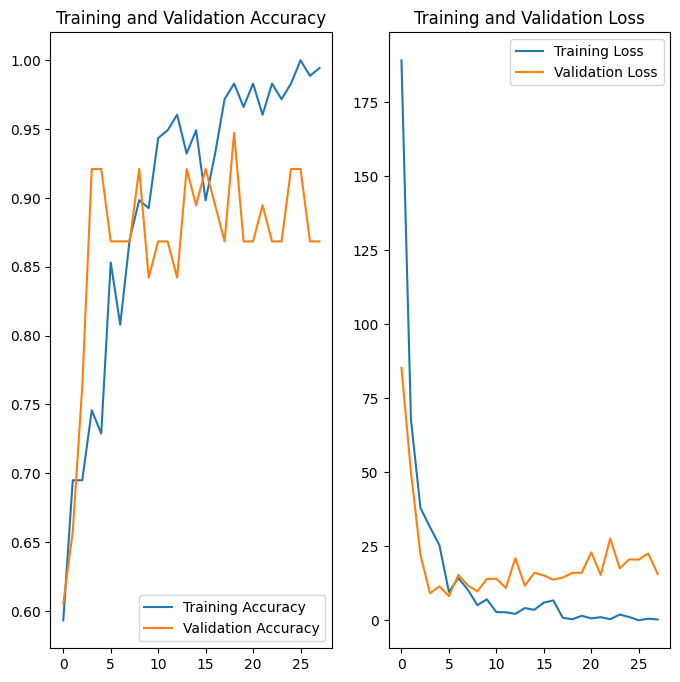

1/2 [==============>...............] - ETA: 0s

2024-04-16 18:16:27.753262: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 120ms/step
Overall Accuracy: 0.8421052631578947
Precision: 0.84
Recall: 0.9130434782608695
F1-Score: 0.8749999999999999


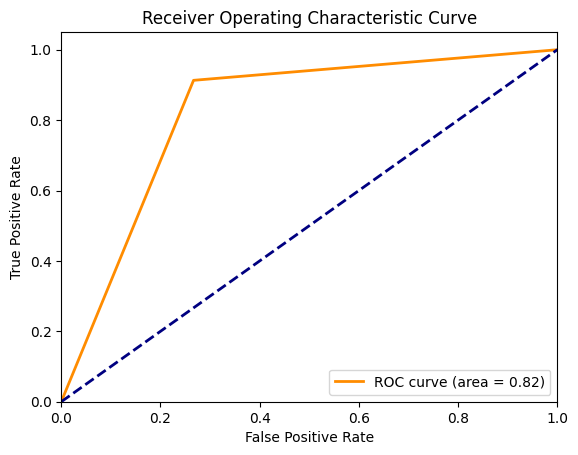

Epoch 1/30


2024-04-16 18:16:28.435991: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 130.6394 - accuracy: 0.6441

2024-04-16 18:16:33.165517: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 6s 126ms/step - loss: 130.6394 - accuracy: 0.6441 - val_loss: 1.8195 - val_accuracy: 0.7368
Epoch 2/30
36/36 [==============================] - 2s 65ms/step - loss: 6.0220 - accuracy: 0.6780 - val_loss: 3.6264 - val_accuracy: 0.4737
Epoch 3/30
36/36 [==============================] - 2s 70ms/step - loss: 2.7643 - accuracy: 0.6836 - val_loss: 0.6471 - val_accuracy: 0.7632
Epoch 4/30
36/36 [==============================] - 2s 66ms/step - loss: 1.3594 - accuracy: 0.7288 - val_loss: 0.7250 - val_accuracy: 0.9211
Epoch 5/30
36/36 [==============================] - 2s 68ms/step - loss: 1.1388 - accuracy: 0.8023 - val_loss: 0.5757 - val_accuracy: 0.9474
Epoch 6/30
36/36 [==============================] - 3s 70ms/step - loss: 1.0709 - accuracy: 0.8475 - val_loss: 0.7367 - val_accuracy: 0.9474
Epoch 7/30
36/36 [==============================] - 2s 66ms/step - loss: 0.4817 - accuracy: 0.9096 - val_loss: 0.9223 - val_accuracy: 0.9211
Epoch 8/30
36/36 [===

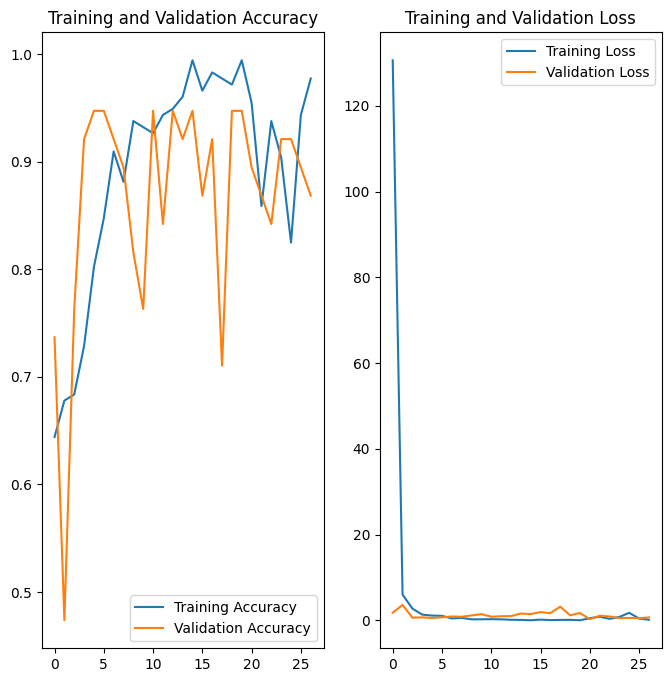

1/2 [==============>...............] - ETA: 0s

2024-04-16 18:17:34.715031: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 144ms/step
Overall Accuracy: 0.868421052631579
Precision: 0.875
Recall: 0.9130434782608695
F1-Score: 0.8936170212765957


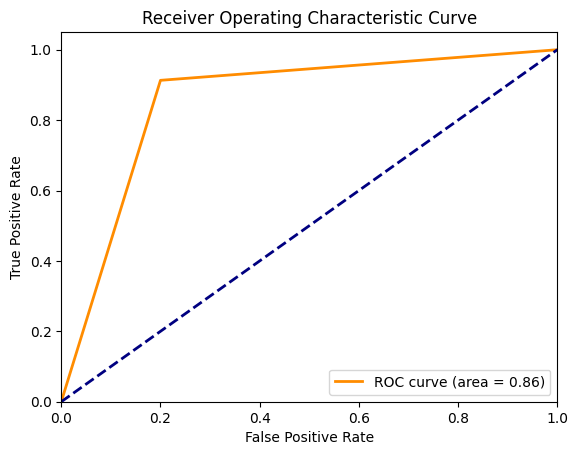

Epoch 1/30


2024-04-16 18:17:36.780164: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 51.8078 - accuracy: 0.5819

2024-04-16 18:17:41.804956: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 8s 137ms/step - loss: 51.8078 - accuracy: 0.5819 - val_loss: 3.7311 - val_accuracy: 0.9211
Epoch 2/30
36/36 [==============================] - 2s 68ms/step - loss: 4.3952 - accuracy: 0.7175 - val_loss: 1.3098 - val_accuracy: 0.8947
Epoch 3/30
36/36 [==============================] - 2s 69ms/step - loss: 1.2367 - accuracy: 0.7910 - val_loss: 1.3275 - val_accuracy: 0.8158
Epoch 4/30
36/36 [==============================] - 2s 70ms/step - loss: 0.8410 - accuracy: 0.8588 - val_loss: 1.2016 - val_accuracy: 0.8421
Epoch 5/30
36/36 [==============================] - 2s 70ms/step - loss: 0.7626 - accuracy: 0.8757 - val_loss: 1.5879 - val_accuracy: 0.9211
Epoch 6/30
36/36 [==============================] - 2s 63ms/step - loss: 0.2090 - accuracy: 0.9492 - val_loss: 1.7191 - val_accuracy: 0.8684
Epoch 7/30
36/36 [==============================] - 3s 74ms/step - loss: 0.6892 - accuracy: 0.9266 - val_loss: 1.5754 - val_accuracy: 0.9474
Epoch 8/30
36/36 [====

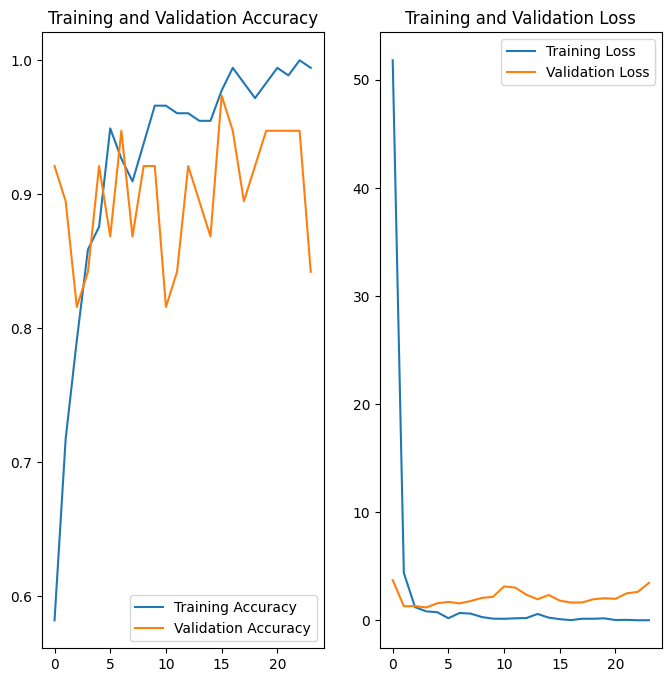

1/2 [==============>...............] - ETA: 0s

2024-04-16 18:18:36.836362: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 130ms/step
Overall Accuracy: 0.7894736842105263
Precision: 0.8571428571428571
Recall: 0.782608695652174
F1-Score: 0.8181818181818182


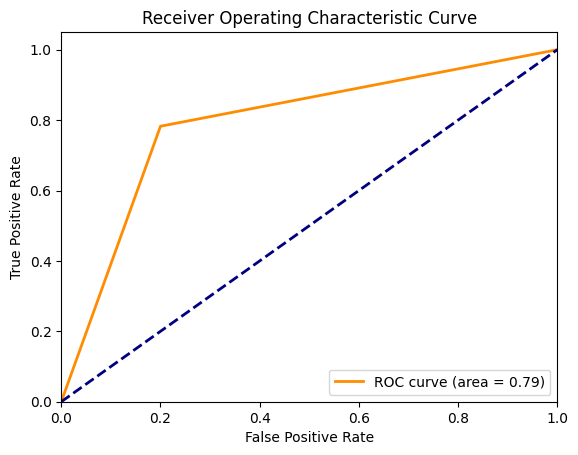

Epoch 1/30


2024-04-16 18:18:37.557212: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 135.0440 - accuracy: 0.5819

2024-04-16 18:18:41.906803: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 6s 121ms/step - loss: 135.0440 - accuracy: 0.5819 - val_loss: 2.7797 - val_accuracy: 0.8684
Epoch 2/30
36/36 [==============================] - 2s 66ms/step - loss: 4.8555 - accuracy: 0.6893 - val_loss: 3.1953 - val_accuracy: 0.7632
Epoch 3/30
36/36 [==============================] - 2s 70ms/step - loss: 2.0148 - accuracy: 0.7740 - val_loss: 1.4317 - val_accuracy: 0.8947
Epoch 4/30
36/36 [==============================] - 2s 62ms/step - loss: 1.8639 - accuracy: 0.8023 - val_loss: 5.1701 - val_accuracy: 0.7895
Epoch 5/30
36/36 [==============================] - 2s 64ms/step - loss: 1.7327 - accuracy: 0.8249 - val_loss: 1.3660 - val_accuracy: 0.8947
Epoch 6/30
36/36 [==============================] - 2s 66ms/step - loss: 0.5373 - accuracy: 0.9040 - val_loss: 1.4951 - val_accuracy: 0.8947
Epoch 7/30
36/36 [==============================] - 2s 63ms/step - loss: 0.0816 - accuracy: 0.9718 - val_loss: 1.3663 - val_accuracy: 0.9211
Epoch 8/30
36/36 [===

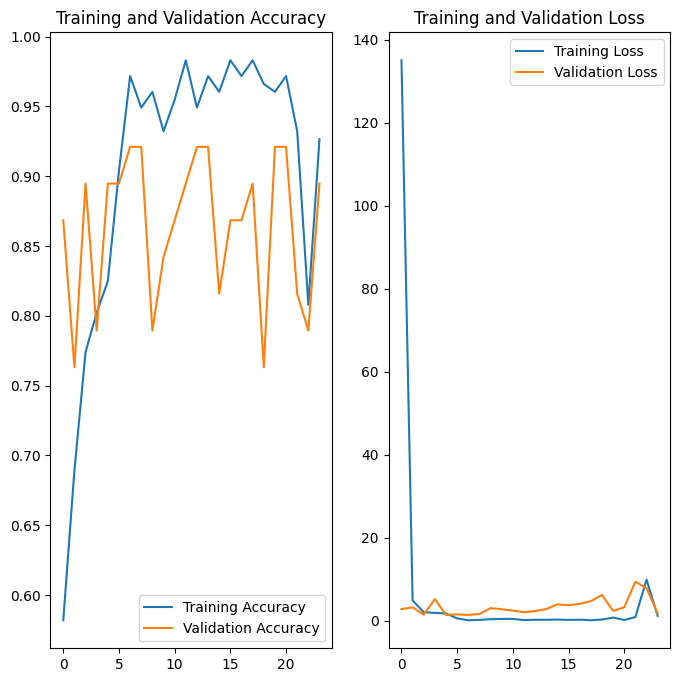

1/2 [==============>...............] - ETA: 0s

2024-04-16 18:19:35.993841: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 82ms/step
Overall Accuracy: 0.8157894736842105
Precision: 0.8636363636363636
Recall: 0.8260869565217391
F1-Score: 0.8444444444444444


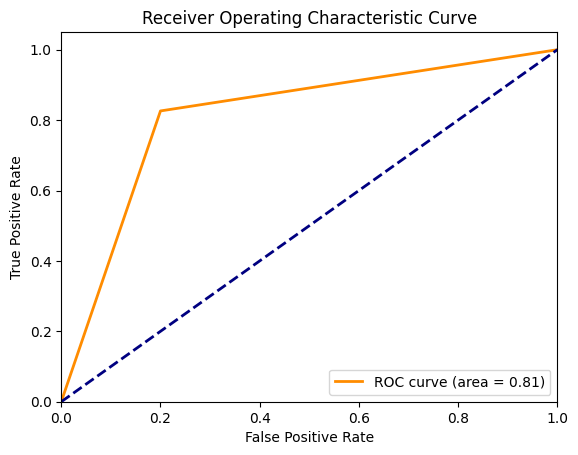

In [38]:
for i in range(5):
    # MODELING
    x = layers.Input(shape=(target_height, target_width, 1)) #input_shape = (height, width, channel)
    y = layers.DepthwiseConv2D(3, strides=(1,1), padding='valid', depth_multiplier=1)(x)

    y = layers.Conv2D(8, (3,3), padding='same', kernel_regularizer=regularizers.L2(0.0001))(x)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = layers.Conv2D(16, (3,3), padding='same', kernel_regularizer=regularizers.L2(0.0001))(y)
    y = layers.Dropout(0.01)(y)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = layers.Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.L2(0.0001))(y)
    y = layers.Dropout(0.01)(y)

    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block(y, 32)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = layers.Flatten()(y)
    y = layers.Dense(50, activation='relu', kernel_regularizer=regularizers.L2(0.0001))(y)
    y = layers.Dropout(0.01)(y)
    y = layers.Dense(1, activation='sigmoid')(y)

    model_2_ES_L2_DO = tf.keras.Model(x,y)
    model_2_ES_L2_DO._name = 'Model_2_ES_L2_DO'
    
    if i == 0:
        model_2_ES_L2_DO.summary()

    # COMPILING
    model_2_ES_L2_DO.compile(optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
                    loss = 'binary_crossentropy',
                    metrics = 'accuracy')
    
    # SCHEDULER
    lr_scheduler = tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        min_delta=0.001,
        patience=3,
        verbose=1,
        mode='auto',
        baseline=None,
        restore_best_weights=False,
        start_from_epoch=20
)
    
    # TRAINING
    epochs = 30
    history = model_2_ES_L2_DO.fit(x = X_train, y = y_train,
                          batch_size=5,
                          epochs = epochs,
                          validation_data = (X_val, y_val),
                          callbacks=[lr_scheduler])

    # SHOWING RESULTS
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(range(len(acc)), acc, label='Training Accuracy')
    plt.plot(range(len(val_acc)), val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(range(len(loss)), loss, label='Training Loss')
    plt.plot(range(len(val_loss)), val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

    # PREDICTING
    pred_prob = model_2_ES_L2_DO.predict(X_test)
    y_pred = np.where(pred_prob > 0.5, 1, 0)

    # Compute overall accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Overall Accuracy:", accuracy)

    # Compute precision
    precision = precision_score(y_test, y_pred)
    print("Precision:", precision)

    # Compute recall
    recall = recall_score(y_test, y_pred)
    print("Recall:", recall)

    # Compute F1-score
    f1 = f1_score(y_test, y_pred)
    print("F1-Score:", f1)

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()
    del model_2_ES_L2_DO
    #del history
